In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [3]:
from ngsim import *
from sensing import *
from measures import *

/home/lemma/anaconda2/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
data_folder = os.path.join('..', 'data')
ng = ngsim_data('i-80')
ng.load(os.path.join(data_folder, 'processed'))

In [5]:
TIME_MIN = list(filter(lambda x: x > 1113433300000 + 3000000, ng.snap_ordered_list))[0]
TIME_MAX = ng.snap_ordered_list[-1]
Y_MIN = 100
Y_MAX = 1600
SPATIAL_NUM = 40
TEMPORAL_NUM = 60

In [6]:
for veh_ID, v in ng.veh_dict.items():
    print (veh_ID, v)
    v.build_trajectory()

1 Vehicle: veh_ID: 1, number of unixtimes: 884
2 Vehicle: veh_ID: 2, number of unixtimes: 415
3 Vehicle: veh_ID: 3, number of unixtimes: 1153
4 Vehicle: veh_ID: 4, number of unixtimes: 1936
5 Vehicle: veh_ID: 5, number of unixtimes: 2424
6 Vehicle: veh_ID: 6, number of unixtimes: 1131
7 Vehicle: veh_ID: 7, number of unixtimes: 1122
8 Vehicle: veh_ID: 8, number of unixtimes: 1171
9 Vehicle: veh_ID: 9, number of unixtimes: 1174
10 Vehicle: veh_ID: 10, number of unixtimes: 1477
11 Vehicle: veh_ID: 11, number of unixtimes: 2000
12 Vehicle: veh_ID: 12, number of unixtimes: 1735
13 Vehicle: veh_ID: 13, number of unixtimes: 1358
15 Vehicle: veh_ID: 15, number of unixtimes: 888
17 Vehicle: veh_ID: 17, number of unixtimes: 413
19 Vehicle: veh_ID: 19, number of unixtimes: 412
21 Vehicle: veh_ID: 21, number of unixtimes: 2390
22 Vehicle: veh_ID: 22, number of unixtimes: 1528
23 Vehicle: veh_ID: 23, number of unixtimes: 1208
24 Vehicle: veh_ID: 24, number of unixtimes: 1674
25 Vehicle: veh_ID: 25,

198 Vehicle: veh_ID: 198, number of unixtimes: 1751
199 Vehicle: veh_ID: 199, number of unixtimes: 973
200 Vehicle: veh_ID: 200, number of unixtimes: 1182
201 Vehicle: veh_ID: 201, number of unixtimes: 605
202 Vehicle: veh_ID: 202, number of unixtimes: 567
203 Vehicle: veh_ID: 203, number of unixtimes: 544
204 Vehicle: veh_ID: 204, number of unixtimes: 1507
205 Vehicle: veh_ID: 205, number of unixtimes: 1167
206 Vehicle: veh_ID: 206, number of unixtimes: 411
209 Vehicle: veh_ID: 209, number of unixtimes: 936
210 Vehicle: veh_ID: 210, number of unixtimes: 1532
211 Vehicle: veh_ID: 211, number of unixtimes: 574
212 Vehicle: veh_ID: 212, number of unixtimes: 1661
213 Vehicle: veh_ID: 213, number of unixtimes: 1283
214 Vehicle: veh_ID: 214, number of unixtimes: 1032
216 Vehicle: veh_ID: 216, number of unixtimes: 694
217 Vehicle: veh_ID: 217, number of unixtimes: 614
218 Vehicle: veh_ID: 218, number of unixtimes: 374
219 Vehicle: veh_ID: 219, number of unixtimes: 1572
222 Vehicle: veh_ID: 2

419 Vehicle: veh_ID: 419, number of unixtimes: 1652
420 Vehicle: veh_ID: 420, number of unixtimes: 1589
421 Vehicle: veh_ID: 421, number of unixtimes: 1529
422 Vehicle: veh_ID: 422, number of unixtimes: 800
423 Vehicle: veh_ID: 423, number of unixtimes: 1426
424 Vehicle: veh_ID: 424, number of unixtimes: 1328
425 Vehicle: veh_ID: 425, number of unixtimes: 437
426 Vehicle: veh_ID: 426, number of unixtimes: 456
427 Vehicle: veh_ID: 427, number of unixtimes: 1917
428 Vehicle: veh_ID: 428, number of unixtimes: 580
429 Vehicle: veh_ID: 429, number of unixtimes: 1036
430 Vehicle: veh_ID: 430, number of unixtimes: 1600
431 Vehicle: veh_ID: 431, number of unixtimes: 849
432 Vehicle: veh_ID: 432, number of unixtimes: 1373
433 Vehicle: veh_ID: 433, number of unixtimes: 584
434 Vehicle: veh_ID: 434, number of unixtimes: 909
435 Vehicle: veh_ID: 435, number of unixtimes: 1260
436 Vehicle: veh_ID: 436, number of unixtimes: 1089
437 Vehicle: veh_ID: 437, number of unixtimes: 774
438 Vehicle: veh_ID:

626 Vehicle: veh_ID: 626, number of unixtimes: 721
627 Vehicle: veh_ID: 627, number of unixtimes: 708
628 Vehicle: veh_ID: 628, number of unixtimes: 1341
629 Vehicle: veh_ID: 629, number of unixtimes: 1647
630 Vehicle: veh_ID: 630, number of unixtimes: 1506
631 Vehicle: veh_ID: 631, number of unixtimes: 1070
632 Vehicle: veh_ID: 632, number of unixtimes: 2426
633 Vehicle: veh_ID: 633, number of unixtimes: 1507
634 Vehicle: veh_ID: 634, number of unixtimes: 569
635 Vehicle: veh_ID: 635, number of unixtimes: 860
636 Vehicle: veh_ID: 636, number of unixtimes: 1298
637 Vehicle: veh_ID: 637, number of unixtimes: 1548
638 Vehicle: veh_ID: 638, number of unixtimes: 1281
639 Vehicle: veh_ID: 639, number of unixtimes: 994
640 Vehicle: veh_ID: 640, number of unixtimes: 2494
641 Vehicle: veh_ID: 641, number of unixtimes: 1754
642 Vehicle: veh_ID: 642, number of unixtimes: 1791
643 Vehicle: veh_ID: 643, number of unixtimes: 494
644 Vehicle: veh_ID: 644, number of unixtimes: 942
645 Vehicle: veh_ID

798 Vehicle: veh_ID: 798, number of unixtimes: 2332
799 Vehicle: veh_ID: 799, number of unixtimes: 811
800 Vehicle: veh_ID: 800, number of unixtimes: 1710
801 Vehicle: veh_ID: 801, number of unixtimes: 1500
802 Vehicle: veh_ID: 802, number of unixtimes: 559
803 Vehicle: veh_ID: 803, number of unixtimes: 992
804 Vehicle: veh_ID: 804, number of unixtimes: 1171
805 Vehicle: veh_ID: 805, number of unixtimes: 552
806 Vehicle: veh_ID: 806, number of unixtimes: 1693
807 Vehicle: veh_ID: 807, number of unixtimes: 1054
808 Vehicle: veh_ID: 808, number of unixtimes: 716
809 Vehicle: veh_ID: 809, number of unixtimes: 1143
810 Vehicle: veh_ID: 810, number of unixtimes: 978
811 Vehicle: veh_ID: 811, number of unixtimes: 1579
812 Vehicle: veh_ID: 812, number of unixtimes: 2024
813 Vehicle: veh_ID: 813, number of unixtimes: 667
814 Vehicle: veh_ID: 814, number of unixtimes: 834
815 Vehicle: veh_ID: 815, number of unixtimes: 1735
816 Vehicle: veh_ID: 816, number of unixtimes: 1030
817 Vehicle: veh_ID:

969 Vehicle: veh_ID: 969, number of unixtimes: 977
970 Vehicle: veh_ID: 970, number of unixtimes: 1907
972 Vehicle: veh_ID: 972, number of unixtimes: 1970
973 Vehicle: veh_ID: 973, number of unixtimes: 1890
974 Vehicle: veh_ID: 974, number of unixtimes: 1495
975 Vehicle: veh_ID: 975, number of unixtimes: 1663
976 Vehicle: veh_ID: 976, number of unixtimes: 715
977 Vehicle: veh_ID: 977, number of unixtimes: 1283
978 Vehicle: veh_ID: 978, number of unixtimes: 1592
979 Vehicle: veh_ID: 979, number of unixtimes: 786
980 Vehicle: veh_ID: 980, number of unixtimes: 833
981 Vehicle: veh_ID: 981, number of unixtimes: 2382
982 Vehicle: veh_ID: 982, number of unixtimes: 2069
983 Vehicle: veh_ID: 983, number of unixtimes: 2145
984 Vehicle: veh_ID: 984, number of unixtimes: 1013
985 Vehicle: veh_ID: 985, number of unixtimes: 1294
986 Vehicle: veh_ID: 986, number of unixtimes: 1561
987 Vehicle: veh_ID: 987, number of unixtimes: 2604
988 Vehicle: veh_ID: 988, number of unixtimes: 1212
989 Vehicle: veh

1164 Vehicle: veh_ID: 1164, number of unixtimes: 1120
1165 Vehicle: veh_ID: 1165, number of unixtimes: 608
1166 Vehicle: veh_ID: 1166, number of unixtimes: 719
1167 Vehicle: veh_ID: 1167, number of unixtimes: 1093
1168 Vehicle: veh_ID: 1168, number of unixtimes: 837
1169 Vehicle: veh_ID: 1169, number of unixtimes: 1351
1170 Vehicle: veh_ID: 1170, number of unixtimes: 1360
1171 Vehicle: veh_ID: 1171, number of unixtimes: 1722
1172 Vehicle: veh_ID: 1172, number of unixtimes: 1463
1173 Vehicle: veh_ID: 1173, number of unixtimes: 2081
1174 Vehicle: veh_ID: 1174, number of unixtimes: 1694
1175 Vehicle: veh_ID: 1175, number of unixtimes: 1937
1176 Vehicle: veh_ID: 1176, number of unixtimes: 540
1177 Vehicle: veh_ID: 1177, number of unixtimes: 749
1178 Vehicle: veh_ID: 1178, number of unixtimes: 1917
1179 Vehicle: veh_ID: 1179, number of unixtimes: 1700
1180 Vehicle: veh_ID: 1180, number of unixtimes: 1476
1181 Vehicle: veh_ID: 1181, number of unixtimes: 2028
1182 Vehicle: veh_ID: 1182, numbe

1354 Vehicle: veh_ID: 1354, number of unixtimes: 1791
1355 Vehicle: veh_ID: 1355, number of unixtimes: 1922
1356 Vehicle: veh_ID: 1356, number of unixtimes: 1627
1357 Vehicle: veh_ID: 1357, number of unixtimes: 1540
1358 Vehicle: veh_ID: 1358, number of unixtimes: 2595
1359 Vehicle: veh_ID: 1359, number of unixtimes: 672
1360 Vehicle: veh_ID: 1360, number of unixtimes: 893
1361 Vehicle: veh_ID: 1361, number of unixtimes: 2398
1362 Vehicle: veh_ID: 1362, number of unixtimes: 1795
1363 Vehicle: veh_ID: 1363, number of unixtimes: 2394
1364 Vehicle: veh_ID: 1364, number of unixtimes: 910
1365 Vehicle: veh_ID: 1365, number of unixtimes: 1755
1366 Vehicle: veh_ID: 1366, number of unixtimes: 1747
1367 Vehicle: veh_ID: 1367, number of unixtimes: 2309
1368 Vehicle: veh_ID: 1368, number of unixtimes: 2004
1369 Vehicle: veh_ID: 1369, number of unixtimes: 1286
1370 Vehicle: veh_ID: 1370, number of unixtimes: 588
1371 Vehicle: veh_ID: 1371, number of unixtimes: 715
1372 Vehicle: veh_ID: 1372, numbe

1518 Vehicle: veh_ID: 1518, number of unixtimes: 2244
1519 Vehicle: veh_ID: 1519, number of unixtimes: 2942
1520 Vehicle: veh_ID: 1520, number of unixtimes: 2113
1521 Vehicle: veh_ID: 1521, number of unixtimes: 2587
1522 Vehicle: veh_ID: 1522, number of unixtimes: 2248
1523 Vehicle: veh_ID: 1523, number of unixtimes: 1186
1524 Vehicle: veh_ID: 1524, number of unixtimes: 3007
1525 Vehicle: veh_ID: 1525, number of unixtimes: 1451
1526 Vehicle: veh_ID: 1526, number of unixtimes: 1955
1527 Vehicle: veh_ID: 1527, number of unixtimes: 1283
1528 Vehicle: veh_ID: 1528, number of unixtimes: 1101
1529 Vehicle: veh_ID: 1529, number of unixtimes: 1508
1530 Vehicle: veh_ID: 1530, number of unixtimes: 895
1531 Vehicle: veh_ID: 1531, number of unixtimes: 845
1532 Vehicle: veh_ID: 1532, number of unixtimes: 920
1533 Vehicle: veh_ID: 1533, number of unixtimes: 1430
1534 Vehicle: veh_ID: 1534, number of unixtimes: 2931
1535 Vehicle: veh_ID: 1535, number of unixtimes: 2018
1536 Vehicle: veh_ID: 1536, num

1676 Vehicle: veh_ID: 1676, number of unixtimes: 3060
1677 Vehicle: veh_ID: 1677, number of unixtimes: 2329
1678 Vehicle: veh_ID: 1678, number of unixtimes: 2189
1679 Vehicle: veh_ID: 1679, number of unixtimes: 2734
1680 Vehicle: veh_ID: 1680, number of unixtimes: 2315
1681 Vehicle: veh_ID: 1681, number of unixtimes: 2208
1682 Vehicle: veh_ID: 1682, number of unixtimes: 1692
1683 Vehicle: veh_ID: 1683, number of unixtimes: 2197
1684 Vehicle: veh_ID: 1684, number of unixtimes: 2039
1685 Vehicle: veh_ID: 1685, number of unixtimes: 2750
1686 Vehicle: veh_ID: 1686, number of unixtimes: 1404
1687 Vehicle: veh_ID: 1687, number of unixtimes: 3351
1688 Vehicle: veh_ID: 1688, number of unixtimes: 2366
1689 Vehicle: veh_ID: 1689, number of unixtimes: 1817
1690 Vehicle: veh_ID: 1690, number of unixtimes: 2766
1691 Vehicle: veh_ID: 1691, number of unixtimes: 2434
1692 Vehicle: veh_ID: 1692, number of unixtimes: 1672
1693 Vehicle: veh_ID: 1693, number of unixtimes: 310
1694 Vehicle: veh_ID: 1694, n

1852 Vehicle: veh_ID: 1852, number of unixtimes: 1829
1853 Vehicle: veh_ID: 1853, number of unixtimes: 2618
1854 Vehicle: veh_ID: 1854, number of unixtimes: 2972
1856 Vehicle: veh_ID: 1856, number of unixtimes: 2503
1857 Vehicle: veh_ID: 1857, number of unixtimes: 1165
1858 Vehicle: veh_ID: 1858, number of unixtimes: 2867
1859 Vehicle: veh_ID: 1859, number of unixtimes: 3621
1860 Vehicle: veh_ID: 1860, number of unixtimes: 3036
1861 Vehicle: veh_ID: 1861, number of unixtimes: 2400
1862 Vehicle: veh_ID: 1862, number of unixtimes: 2343
1863 Vehicle: veh_ID: 1863, number of unixtimes: 1564
1864 Vehicle: veh_ID: 1864, number of unixtimes: 1280
1865 Vehicle: veh_ID: 1865, number of unixtimes: 351
1866 Vehicle: veh_ID: 1866, number of unixtimes: 1665
1867 Vehicle: veh_ID: 1867, number of unixtimes: 2115
1868 Vehicle: veh_ID: 1868, number of unixtimes: 2892
1869 Vehicle: veh_ID: 1869, number of unixtimes: 3036
1871 Vehicle: veh_ID: 1871, number of unixtimes: 1997
1872 Vehicle: veh_ID: 1872, n

2023 Vehicle: veh_ID: 2023, number of unixtimes: 2181
2024 Vehicle: veh_ID: 2024, number of unixtimes: 4441
2025 Vehicle: veh_ID: 2025, number of unixtimes: 909
2026 Vehicle: veh_ID: 2026, number of unixtimes: 691
2027 Vehicle: veh_ID: 2027, number of unixtimes: 2802
2028 Vehicle: veh_ID: 2028, number of unixtimes: 1830
2029 Vehicle: veh_ID: 2029, number of unixtimes: 3361
2030 Vehicle: veh_ID: 2030, number of unixtimes: 323
2031 Vehicle: veh_ID: 2031, number of unixtimes: 4216
2032 Vehicle: veh_ID: 2032, number of unixtimes: 2971
2033 Vehicle: veh_ID: 2033, number of unixtimes: 4087
2034 Vehicle: veh_ID: 2034, number of unixtimes: 2746
2035 Vehicle: veh_ID: 2035, number of unixtimes: 1084
2036 Vehicle: veh_ID: 2036, number of unixtimes: 3175
2037 Vehicle: veh_ID: 2037, number of unixtimes: 1059
2039 Vehicle: veh_ID: 2039, number of unixtimes: 2452
2040 Vehicle: veh_ID: 2040, number of unixtimes: 3642
2041 Vehicle: veh_ID: 2041, number of unixtimes: 2193
2042 Vehicle: veh_ID: 2042, num

2203 Vehicle: veh_ID: 2203, number of unixtimes: 405
2205 Vehicle: veh_ID: 2205, number of unixtimes: 3984
2206 Vehicle: veh_ID: 2206, number of unixtimes: 1849
2207 Vehicle: veh_ID: 2207, number of unixtimes: 416
2208 Vehicle: veh_ID: 2208, number of unixtimes: 3861
2209 Vehicle: veh_ID: 2209, number of unixtimes: 2020
2210 Vehicle: veh_ID: 2210, number of unixtimes: 409
2211 Vehicle: veh_ID: 2211, number of unixtimes: 3162
2212 Vehicle: veh_ID: 2212, number of unixtimes: 1828
2213 Vehicle: veh_ID: 2213, number of unixtimes: 3012
2215 Vehicle: veh_ID: 2215, number of unixtimes: 401
2216 Vehicle: veh_ID: 2216, number of unixtimes: 1790
2217 Vehicle: veh_ID: 2217, number of unixtimes: 1388
2218 Vehicle: veh_ID: 2218, number of unixtimes: 1395
2219 Vehicle: veh_ID: 2219, number of unixtimes: 1042
2220 Vehicle: veh_ID: 2220, number of unixtimes: 2030
2221 Vehicle: veh_ID: 2221, number of unixtimes: 1584
2222 Vehicle: veh_ID: 2222, number of unixtimes: 397
2224 Vehicle: veh_ID: 2224, numbe

2377 Vehicle: veh_ID: 2377, number of unixtimes: 1744
2378 Vehicle: veh_ID: 2378, number of unixtimes: 1211
2379 Vehicle: veh_ID: 2379, number of unixtimes: 3049
2380 Vehicle: veh_ID: 2380, number of unixtimes: 776
2381 Vehicle: veh_ID: 2381, number of unixtimes: 1855
2382 Vehicle: veh_ID: 2382, number of unixtimes: 681
2383 Vehicle: veh_ID: 2383, number of unixtimes: 2243
2384 Vehicle: veh_ID: 2384, number of unixtimes: 2773
2385 Vehicle: veh_ID: 2385, number of unixtimes: 2796
2387 Vehicle: veh_ID: 2387, number of unixtimes: 2903
2388 Vehicle: veh_ID: 2388, number of unixtimes: 1318
2389 Vehicle: veh_ID: 2389, number of unixtimes: 1380
2390 Vehicle: veh_ID: 2390, number of unixtimes: 1494
2391 Vehicle: veh_ID: 2391, number of unixtimes: 4127
2392 Vehicle: veh_ID: 2392, number of unixtimes: 2532
2393 Vehicle: veh_ID: 2393, number of unixtimes: 1511
2394 Vehicle: veh_ID: 2394, number of unixtimes: 3027
2395 Vehicle: veh_ID: 2395, number of unixtimes: 4302
2396 Vehicle: veh_ID: 2396, nu

2618 Vehicle: veh_ID: 2618, number of unixtimes: 1637
2622 Vehicle: veh_ID: 2622, number of unixtimes: 367
2624 Vehicle: veh_ID: 2624, number of unixtimes: 362
2630 Vehicle: veh_ID: 2630, number of unixtimes: 759
2633 Vehicle: veh_ID: 2633, number of unixtimes: 362
2634 Vehicle: veh_ID: 2634, number of unixtimes: 1334
2635 Vehicle: veh_ID: 2635, number of unixtimes: 1358
2636 Vehicle: veh_ID: 2636, number of unixtimes: 365
2638 Vehicle: veh_ID: 2638, number of unixtimes: 997
2639 Vehicle: veh_ID: 2639, number of unixtimes: 1468
2640 Vehicle: veh_ID: 2640, number of unixtimes: 1330
2641 Vehicle: veh_ID: 2641, number of unixtimes: 2086
2642 Vehicle: veh_ID: 2642, number of unixtimes: 2100
2646 Vehicle: veh_ID: 2646, number of unixtimes: 1464
2652 Vehicle: veh_ID: 2652, number of unixtimes: 1392
2654 Vehicle: veh_ID: 2654, number of unixtimes: 1411
2656 Vehicle: veh_ID: 2656, number of unixtimes: 390
2657 Vehicle: veh_ID: 2657, number of unixtimes: 1322
2661 Vehicle: veh_ID: 2661, number 

2939 Vehicle: veh_ID: 2939, number of unixtimes: 975
2940 Vehicle: veh_ID: 2940, number of unixtimes: 761
2941 Vehicle: veh_ID: 2941, number of unixtimes: 1096
2942 Vehicle: veh_ID: 2942, number of unixtimes: 675
2943 Vehicle: veh_ID: 2943, number of unixtimes: 823
2944 Vehicle: veh_ID: 2944, number of unixtimes: 350
2945 Vehicle: veh_ID: 2945, number of unixtimes: 365
2946 Vehicle: veh_ID: 2946, number of unixtimes: 348
2947 Vehicle: veh_ID: 2947, number of unixtimes: 845
2948 Vehicle: veh_ID: 2948, number of unixtimes: 1002
2949 Vehicle: veh_ID: 2949, number of unixtimes: 721
2952 Vehicle: veh_ID: 2952, number of unixtimes: 787
2953 Vehicle: veh_ID: 2953, number of unixtimes: 976
2955 Vehicle: veh_ID: 2955, number of unixtimes: 344
2956 Vehicle: veh_ID: 2956, number of unixtimes: 684
2957 Vehicle: veh_ID: 2957, number of unixtimes: 1091
2958 Vehicle: veh_ID: 2958, number of unixtimes: 756
2962 Vehicle: veh_ID: 2962, number of unixtimes: 747
2963 Vehicle: veh_ID: 2963, number of unixt

3168 Vehicle: veh_ID: 3168, number of unixtimes: 754
3169 Vehicle: veh_ID: 3169, number of unixtimes: 690
3170 Vehicle: veh_ID: 3170, number of unixtimes: 356
3171 Vehicle: veh_ID: 3171, number of unixtimes: 565
3172 Vehicle: veh_ID: 3172, number of unixtimes: 683
3173 Vehicle: veh_ID: 3173, number of unixtimes: 351
3174 Vehicle: veh_ID: 3174, number of unixtimes: 616
3175 Vehicle: veh_ID: 3175, number of unixtimes: 777
3176 Vehicle: veh_ID: 3176, number of unixtimes: 525
3178 Vehicle: veh_ID: 3178, number of unixtimes: 275
3179 Vehicle: veh_ID: 3179, number of unixtimes: 577
3180 Vehicle: veh_ID: 3180, number of unixtimes: 351
3181 Vehicle: veh_ID: 3181, number of unixtimes: 810
3183 Vehicle: veh_ID: 3183, number of unixtimes: 701
3186 Vehicle: veh_ID: 3186, number of unixtimes: 576
3187 Vehicle: veh_ID: 3187, number of unixtimes: 344
3188 Vehicle: veh_ID: 3188, number of unixtimes: 565
3191 Vehicle: veh_ID: 3191, number of unixtimes: 701
3193 Vehicle: veh_ID: 3193, number of unixtime

In [7]:
m = mesh(num_spatial_cells = SPATIAL_NUM, num_temporal_cells = TEMPORAL_NUM, num_lane = 6)
m.init_mesh(Y_MIN, Y_MAX, TIME_MIN, TIME_MAX)
for veh_ID, v in ng.veh_dict.items():
    print (veh_ID, v)
    m.update_vehilce(v)
m.update_qkv()

1 Vehicle: veh_ID: 1, number of unixtimes: 884
2 Vehicle: veh_ID: 2, number of unixtimes: 415
3 Vehicle: veh_ID: 3, number of unixtimes: 1153
4 Vehicle: veh_ID: 4, number of unixtimes: 1936
5 Vehicle: veh_ID: 5, number of unixtimes: 2424
6 Vehicle: veh_ID: 6, number of unixtimes: 1131
7 Vehicle: veh_ID: 7, number of unixtimes: 1122
8 Vehicle: veh_ID: 8, number of unixtimes: 1171
9 Vehicle: veh_ID: 9, number of unixtimes: 1174
10 Vehicle: veh_ID: 10, number of unixtimes: 1477
11 Vehicle: veh_ID: 11, number of unixtimes: 2000
12 Vehicle: veh_ID: 12, number of unixtimes: 1735
13 Vehicle: veh_ID: 13, number of unixtimes: 1358
15 Vehicle: veh_ID: 15, number of unixtimes: 888
17 Vehicle: veh_ID: 17, number of unixtimes: 413
19 Vehicle: veh_ID: 19, number of unixtimes: 412
21 Vehicle: veh_ID: 21, number of unixtimes: 2390
22 Vehicle: veh_ID: 22, number of unixtimes: 1528
23 Vehicle: veh_ID: 23, number of unixtimes: 1208
24 Vehicle: veh_ID: 24, number of unixtimes: 1674
25 Vehicle: veh_ID: 25,

193 Vehicle: veh_ID: 193, number of unixtimes: 1625
194 Vehicle: veh_ID: 194, number of unixtimes: 1283
195 Vehicle: veh_ID: 195, number of unixtimes: 1109
197 Vehicle: veh_ID: 197, number of unixtimes: 762
198 Vehicle: veh_ID: 198, number of unixtimes: 1751
199 Vehicle: veh_ID: 199, number of unixtimes: 973
200 Vehicle: veh_ID: 200, number of unixtimes: 1182
201 Vehicle: veh_ID: 201, number of unixtimes: 605
202 Vehicle: veh_ID: 202, number of unixtimes: 567
203 Vehicle: veh_ID: 203, number of unixtimes: 544
204 Vehicle: veh_ID: 204, number of unixtimes: 1507
205 Vehicle: veh_ID: 205, number of unixtimes: 1167
206 Vehicle: veh_ID: 206, number of unixtimes: 411
209 Vehicle: veh_ID: 209, number of unixtimes: 936
210 Vehicle: veh_ID: 210, number of unixtimes: 1532
211 Vehicle: veh_ID: 211, number of unixtimes: 574
212 Vehicle: veh_ID: 212, number of unixtimes: 1661
213 Vehicle: veh_ID: 213, number of unixtimes: 1283
214 Vehicle: veh_ID: 214, number of unixtimes: 1032
216 Vehicle: veh_ID:

366 Vehicle: veh_ID: 366, number of unixtimes: 1032
367 Vehicle: veh_ID: 367, number of unixtimes: 729
368 Vehicle: veh_ID: 368, number of unixtimes: 1713
369 Vehicle: veh_ID: 369, number of unixtimes: 503
370 Vehicle: veh_ID: 370, number of unixtimes: 1240
371 Vehicle: veh_ID: 371, number of unixtimes: 994
372 Vehicle: veh_ID: 372, number of unixtimes: 1400
373 Vehicle: veh_ID: 373, number of unixtimes: 1468
374 Vehicle: veh_ID: 374, number of unixtimes: 612
375 Vehicle: veh_ID: 375, number of unixtimes: 1892
376 Vehicle: veh_ID: 376, number of unixtimes: 1529
377 Vehicle: veh_ID: 377, number of unixtimes: 1118
378 Vehicle: veh_ID: 378, number of unixtimes: 1509
379 Vehicle: veh_ID: 379, number of unixtimes: 534
380 Vehicle: veh_ID: 380, number of unixtimes: 1008
381 Vehicle: veh_ID: 381, number of unixtimes: 1292
382 Vehicle: veh_ID: 382, number of unixtimes: 1324
383 Vehicle: veh_ID: 383, number of unixtimes: 1537
384 Vehicle: veh_ID: 384, number of unixtimes: 982
385 Vehicle: veh_I

530 Vehicle: veh_ID: 530, number of unixtimes: 1243
532 Vehicle: veh_ID: 532, number of unixtimes: 379
533 Vehicle: veh_ID: 533, number of unixtimes: 1280
534 Vehicle: veh_ID: 534, number of unixtimes: 1469
535 Vehicle: veh_ID: 535, number of unixtimes: 1549
536 Vehicle: veh_ID: 536, number of unixtimes: 2056
537 Vehicle: veh_ID: 537, number of unixtimes: 2043
538 Vehicle: veh_ID: 538, number of unixtimes: 2204
539 Vehicle: veh_ID: 539, number of unixtimes: 1622
540 Vehicle: veh_ID: 540, number of unixtimes: 444
541 Vehicle: veh_ID: 541, number of unixtimes: 654
542 Vehicle: veh_ID: 542, number of unixtimes: 1766
544 Vehicle: veh_ID: 544, number of unixtimes: 1229
545 Vehicle: veh_ID: 545, number of unixtimes: 2043
546 Vehicle: veh_ID: 546, number of unixtimes: 1311
547 Vehicle: veh_ID: 547, number of unixtimes: 1738
548 Vehicle: veh_ID: 548, number of unixtimes: 541
549 Vehicle: veh_ID: 549, number of unixtimes: 994
550 Vehicle: veh_ID: 550, number of unixtimes: 1398
552 Vehicle: veh_

698 Vehicle: veh_ID: 698, number of unixtimes: 1453
699 Vehicle: veh_ID: 699, number of unixtimes: 2339
700 Vehicle: veh_ID: 700, number of unixtimes: 1202
701 Vehicle: veh_ID: 701, number of unixtimes: 662
702 Vehicle: veh_ID: 702, number of unixtimes: 2288
703 Vehicle: veh_ID: 703, number of unixtimes: 1553
704 Vehicle: veh_ID: 704, number of unixtimes: 473
705 Vehicle: veh_ID: 705, number of unixtimes: 1653
706 Vehicle: veh_ID: 706, number of unixtimes: 2343
707 Vehicle: veh_ID: 707, number of unixtimes: 1493
708 Vehicle: veh_ID: 708, number of unixtimes: 1746
709 Vehicle: veh_ID: 709, number of unixtimes: 1325
710 Vehicle: veh_ID: 710, number of unixtimes: 1238
711 Vehicle: veh_ID: 711, number of unixtimes: 1596
712 Vehicle: veh_ID: 712, number of unixtimes: 1050
713 Vehicle: veh_ID: 713, number of unixtimes: 2166
714 Vehicle: veh_ID: 714, number of unixtimes: 2254
715 Vehicle: veh_ID: 715, number of unixtimes: 1756
716 Vehicle: veh_ID: 716, number of unixtimes: 1258
717 Vehicle: v

858 Vehicle: veh_ID: 858, number of unixtimes: 1677
859 Vehicle: veh_ID: 859, number of unixtimes: 1342
860 Vehicle: veh_ID: 860, number of unixtimes: 2140
861 Vehicle: veh_ID: 861, number of unixtimes: 1529
862 Vehicle: veh_ID: 862, number of unixtimes: 1947
863 Vehicle: veh_ID: 863, number of unixtimes: 834
864 Vehicle: veh_ID: 864, number of unixtimes: 653
865 Vehicle: veh_ID: 865, number of unixtimes: 1570
866 Vehicle: veh_ID: 866, number of unixtimes: 1486
867 Vehicle: veh_ID: 867, number of unixtimes: 754
868 Vehicle: veh_ID: 868, number of unixtimes: 1635
869 Vehicle: veh_ID: 869, number of unixtimes: 1578
870 Vehicle: veh_ID: 870, number of unixtimes: 2255
871 Vehicle: veh_ID: 871, number of unixtimes: 1633
872 Vehicle: veh_ID: 872, number of unixtimes: 471
873 Vehicle: veh_ID: 873, number of unixtimes: 897
874 Vehicle: veh_ID: 874, number of unixtimes: 1650
875 Vehicle: veh_ID: 875, number of unixtimes: 2033
876 Vehicle: veh_ID: 876, number of unixtimes: 2443
877 Vehicle: veh_

1017 Vehicle: veh_ID: 1017, number of unixtimes: 1409
1018 Vehicle: veh_ID: 1018, number of unixtimes: 712
1019 Vehicle: veh_ID: 1019, number of unixtimes: 980
1020 Vehicle: veh_ID: 1020, number of unixtimes: 1006
1021 Vehicle: veh_ID: 1021, number of unixtimes: 632
1022 Vehicle: veh_ID: 1022, number of unixtimes: 873
1023 Vehicle: veh_ID: 1023, number of unixtimes: 2470
1024 Vehicle: veh_ID: 1024, number of unixtimes: 2022
1025 Vehicle: veh_ID: 1025, number of unixtimes: 2235
1026 Vehicle: veh_ID: 1026, number of unixtimes: 1911
1027 Vehicle: veh_ID: 1027, number of unixtimes: 727
1028 Vehicle: veh_ID: 1028, number of unixtimes: 1034
1029 Vehicle: veh_ID: 1029, number of unixtimes: 1979
1030 Vehicle: veh_ID: 1030, number of unixtimes: 1652
1031 Vehicle: veh_ID: 1031, number of unixtimes: 1925
1032 Vehicle: veh_ID: 1032, number of unixtimes: 1236
1033 Vehicle: veh_ID: 1033, number of unixtimes: 1008
1034 Vehicle: veh_ID: 1034, number of unixtimes: 1495
1035 Vehicle: veh_ID: 1035, numbe

1171 Vehicle: veh_ID: 1171, number of unixtimes: 1722
1172 Vehicle: veh_ID: 1172, number of unixtimes: 1463
1173 Vehicle: veh_ID: 1173, number of unixtimes: 2081
1174 Vehicle: veh_ID: 1174, number of unixtimes: 1694
1175 Vehicle: veh_ID: 1175, number of unixtimes: 1937
1176 Vehicle: veh_ID: 1176, number of unixtimes: 540
1177 Vehicle: veh_ID: 1177, number of unixtimes: 749
1178 Vehicle: veh_ID: 1178, number of unixtimes: 1917
1179 Vehicle: veh_ID: 1179, number of unixtimes: 1700
1180 Vehicle: veh_ID: 1180, number of unixtimes: 1476
1181 Vehicle: veh_ID: 1181, number of unixtimes: 2028
1182 Vehicle: veh_ID: 1182, number of unixtimes: 1858
1183 Vehicle: veh_ID: 1183, number of unixtimes: 1210
1184 Vehicle: veh_ID: 1184, number of unixtimes: 1294
1185 Vehicle: veh_ID: 1185, number of unixtimes: 902
1188 Vehicle: veh_ID: 1188, number of unixtimes: 1134
1189 Vehicle: veh_ID: 1189, number of unixtimes: 1165
1190 Vehicle: veh_ID: 1190, number of unixtimes: 1312
1191 Vehicle: veh_ID: 1191, num

1327 Vehicle: veh_ID: 1327, number of unixtimes: 324
1328 Vehicle: veh_ID: 1328, number of unixtimes: 1439
1329 Vehicle: veh_ID: 1329, number of unixtimes: 1599
1330 Vehicle: veh_ID: 1330, number of unixtimes: 1939
1331 Vehicle: veh_ID: 1331, number of unixtimes: 2010
1332 Vehicle: veh_ID: 1332, number of unixtimes: 1969
1333 Vehicle: veh_ID: 1333, number of unixtimes: 2513
1334 Vehicle: veh_ID: 1334, number of unixtimes: 1444
1335 Vehicle: veh_ID: 1335, number of unixtimes: 634
1336 Vehicle: veh_ID: 1336, number of unixtimes: 763
1337 Vehicle: veh_ID: 1337, number of unixtimes: 2195
1338 Vehicle: veh_ID: 1338, number of unixtimes: 2187
1339 Vehicle: veh_ID: 1339, number of unixtimes: 1131
1340 Vehicle: veh_ID: 1340, number of unixtimes: 1453
1341 Vehicle: veh_ID: 1341, number of unixtimes: 2701
1342 Vehicle: veh_ID: 1342, number of unixtimes: 1527
1343 Vehicle: veh_ID: 1343, number of unixtimes: 2239
1344 Vehicle: veh_ID: 1344, number of unixtimes: 1800
1345 Vehicle: veh_ID: 1345, num

1480 Vehicle: veh_ID: 1480, number of unixtimes: 2066
1481 Vehicle: veh_ID: 1481, number of unixtimes: 2876
1482 Vehicle: veh_ID: 1482, number of unixtimes: 3417
1483 Vehicle: veh_ID: 1483, number of unixtimes: 1675
1484 Vehicle: veh_ID: 1484, number of unixtimes: 1547
1485 Vehicle: veh_ID: 1485, number of unixtimes: 3058
1486 Vehicle: veh_ID: 1486, number of unixtimes: 3188
1487 Vehicle: veh_ID: 1487, number of unixtimes: 2760
1488 Vehicle: veh_ID: 1488, number of unixtimes: 2118
1489 Vehicle: veh_ID: 1489, number of unixtimes: 1801
1490 Vehicle: veh_ID: 1490, number of unixtimes: 1765
1491 Vehicle: veh_ID: 1491, number of unixtimes: 3094
1492 Vehicle: veh_ID: 1492, number of unixtimes: 1683
1493 Vehicle: veh_ID: 1493, number of unixtimes: 250
1494 Vehicle: veh_ID: 1494, number of unixtimes: 1540
1495 Vehicle: veh_ID: 1495, number of unixtimes: 1433
1496 Vehicle: veh_ID: 1496, number of unixtimes: 1711
1497 Vehicle: veh_ID: 1497, number of unixtimes: 1555
1498 Vehicle: veh_ID: 1498, n

1633 Vehicle: veh_ID: 1633, number of unixtimes: 3311
1634 Vehicle: veh_ID: 1634, number of unixtimes: 1770
1635 Vehicle: veh_ID: 1635, number of unixtimes: 1697
1636 Vehicle: veh_ID: 1636, number of unixtimes: 669
1637 Vehicle: veh_ID: 1637, number of unixtimes: 452
1638 Vehicle: veh_ID: 1638, number of unixtimes: 670
1639 Vehicle: veh_ID: 1639, number of unixtimes: 2106
1640 Vehicle: veh_ID: 1640, number of unixtimes: 512
1641 Vehicle: veh_ID: 1641, number of unixtimes: 1134
1642 Vehicle: veh_ID: 1642, number of unixtimes: 3105
1643 Vehicle: veh_ID: 1643, number of unixtimes: 2128
1644 Vehicle: veh_ID: 1644, number of unixtimes: 1560
1645 Vehicle: veh_ID: 1645, number of unixtimes: 1581
1646 Vehicle: veh_ID: 1646, number of unixtimes: 1164
1647 Vehicle: veh_ID: 1647, number of unixtimes: 2816
1648 Vehicle: veh_ID: 1648, number of unixtimes: 2346
1649 Vehicle: veh_ID: 1649, number of unixtimes: 681
1650 Vehicle: veh_ID: 1650, number of unixtimes: 1123
1651 Vehicle: veh_ID: 1651, numbe

1788 Vehicle: veh_ID: 1788, number of unixtimes: 3447
1789 Vehicle: veh_ID: 1789, number of unixtimes: 1134
1790 Vehicle: veh_ID: 1790, number of unixtimes: 1602
1791 Vehicle: veh_ID: 1791, number of unixtimes: 358
1792 Vehicle: veh_ID: 1792, number of unixtimes: 1649
1793 Vehicle: veh_ID: 1793, number of unixtimes: 2743
1794 Vehicle: veh_ID: 1794, number of unixtimes: 1442
1795 Vehicle: veh_ID: 1795, number of unixtimes: 3402
1796 Vehicle: veh_ID: 1796, number of unixtimes: 2834
1797 Vehicle: veh_ID: 1797, number of unixtimes: 1234
1798 Vehicle: veh_ID: 1798, number of unixtimes: 2586
1799 Vehicle: veh_ID: 1799, number of unixtimes: 3014
1800 Vehicle: veh_ID: 1800, number of unixtimes: 3293
1801 Vehicle: veh_ID: 1801, number of unixtimes: 3859
1802 Vehicle: veh_ID: 1802, number of unixtimes: 1284
1803 Vehicle: veh_ID: 1803, number of unixtimes: 2286
1804 Vehicle: veh_ID: 1804, number of unixtimes: 1932
1805 Vehicle: veh_ID: 1805, number of unixtimes: 2944
1806 Vehicle: veh_ID: 1806, n

1947 Vehicle: veh_ID: 1947, number of unixtimes: 873
1948 Vehicle: veh_ID: 1948, number of unixtimes: 2045
1949 Vehicle: veh_ID: 1949, number of unixtimes: 390
1950 Vehicle: veh_ID: 1950, number of unixtimes: 1807
1951 Vehicle: veh_ID: 1951, number of unixtimes: 2880
1952 Vehicle: veh_ID: 1952, number of unixtimes: 1079
1953 Vehicle: veh_ID: 1953, number of unixtimes: 3683
1954 Vehicle: veh_ID: 1954, number of unixtimes: 945
1955 Vehicle: veh_ID: 1955, number of unixtimes: 648
1956 Vehicle: veh_ID: 1956, number of unixtimes: 3605
1957 Vehicle: veh_ID: 1957, number of unixtimes: 2876
1958 Vehicle: veh_ID: 1958, number of unixtimes: 2095
1959 Vehicle: veh_ID: 1959, number of unixtimes: 1104
1960 Vehicle: veh_ID: 1960, number of unixtimes: 1664
1961 Vehicle: veh_ID: 1961, number of unixtimes: 2658
1962 Vehicle: veh_ID: 1962, number of unixtimes: 1744
1963 Vehicle: veh_ID: 1963, number of unixtimes: 1869
1964 Vehicle: veh_ID: 1964, number of unixtimes: 2775
1965 Vehicle: veh_ID: 1965, numb

2106 Vehicle: veh_ID: 2106, number of unixtimes: 2326
2107 Vehicle: veh_ID: 2107, number of unixtimes: 2615
2108 Vehicle: veh_ID: 2108, number of unixtimes: 1110
2109 Vehicle: veh_ID: 2109, number of unixtimes: 2218
2110 Vehicle: veh_ID: 2110, number of unixtimes: 853
2111 Vehicle: veh_ID: 2111, number of unixtimes: 2782
2112 Vehicle: veh_ID: 2112, number of unixtimes: 1522
2113 Vehicle: veh_ID: 2113, number of unixtimes: 1835
2114 Vehicle: veh_ID: 2114, number of unixtimes: 754
2115 Vehicle: veh_ID: 2115, number of unixtimes: 3762
2116 Vehicle: veh_ID: 2116, number of unixtimes: 4748
2117 Vehicle: veh_ID: 2117, number of unixtimes: 2837
2118 Vehicle: veh_ID: 2118, number of unixtimes: 2603
2119 Vehicle: veh_ID: 2119, number of unixtimes: 1946
2120 Vehicle: veh_ID: 2120, number of unixtimes: 1271
2121 Vehicle: veh_ID: 2121, number of unixtimes: 2504
2122 Vehicle: veh_ID: 2122, number of unixtimes: 4041
2123 Vehicle: veh_ID: 2123, number of unixtimes: 3054
2124 Vehicle: veh_ID: 2124, nu

2271 Vehicle: veh_ID: 2271, number of unixtimes: 267
2272 Vehicle: veh_ID: 2272, number of unixtimes: 2025
2273 Vehicle: veh_ID: 2273, number of unixtimes: 2120
2274 Vehicle: veh_ID: 2274, number of unixtimes: 2543
2275 Vehicle: veh_ID: 2275, number of unixtimes: 1219
2276 Vehicle: veh_ID: 2276, number of unixtimes: 1230
2277 Vehicle: veh_ID: 2277, number of unixtimes: 443
2278 Vehicle: veh_ID: 2278, number of unixtimes: 2868
2280 Vehicle: veh_ID: 2280, number of unixtimes: 2872
2281 Vehicle: veh_ID: 2281, number of unixtimes: 1977
2282 Vehicle: veh_ID: 2282, number of unixtimes: 1893
2283 Vehicle: veh_ID: 2283, number of unixtimes: 2087
2285 Vehicle: veh_ID: 2285, number of unixtimes: 2880
2286 Vehicle: veh_ID: 2286, number of unixtimes: 2840
2287 Vehicle: veh_ID: 2287, number of unixtimes: 1747
2288 Vehicle: veh_ID: 2288, number of unixtimes: 1168
2289 Vehicle: veh_ID: 2289, number of unixtimes: 2835
2290 Vehicle: veh_ID: 2290, number of unixtimes: 2533
2292 Vehicle: veh_ID: 2292, nu

2431 Vehicle: veh_ID: 2431, number of unixtimes: 1737
2432 Vehicle: veh_ID: 2432, number of unixtimes: 1587
2433 Vehicle: veh_ID: 2433, number of unixtimes: 3403
2434 Vehicle: veh_ID: 2434, number of unixtimes: 2026
2435 Vehicle: veh_ID: 2435, number of unixtimes: 3758
2436 Vehicle: veh_ID: 2436, number of unixtimes: 685
2437 Vehicle: veh_ID: 2437, number of unixtimes: 2524
2438 Vehicle: veh_ID: 2438, number of unixtimes: 2791
2439 Vehicle: veh_ID: 2439, number of unixtimes: 2832
2440 Vehicle: veh_ID: 2440, number of unixtimes: 1924
2441 Vehicle: veh_ID: 2441, number of unixtimes: 2635
2442 Vehicle: veh_ID: 2442, number of unixtimes: 1594
2443 Vehicle: veh_ID: 2443, number of unixtimes: 3908
2444 Vehicle: veh_ID: 2444, number of unixtimes: 3672
2445 Vehicle: veh_ID: 2445, number of unixtimes: 3255
2446 Vehicle: veh_ID: 2446, number of unixtimes: 1162
2447 Vehicle: veh_ID: 2447, number of unixtimes: 2709
2448 Vehicle: veh_ID: 2448, number of unixtimes: 2694
2449 Vehicle: veh_ID: 2449, n

2642 Vehicle: veh_ID: 2642, number of unixtimes: 2100
2646 Vehicle: veh_ID: 2646, number of unixtimes: 1464
2652 Vehicle: veh_ID: 2652, number of unixtimes: 1392
2654 Vehicle: veh_ID: 2654, number of unixtimes: 1411
2656 Vehicle: veh_ID: 2656, number of unixtimes: 390
2657 Vehicle: veh_ID: 2657, number of unixtimes: 1322
2661 Vehicle: veh_ID: 2661, number of unixtimes: 1330
2662 Vehicle: veh_ID: 2662, number of unixtimes: 2048
2667 Vehicle: veh_ID: 2667, number of unixtimes: 407
2668 Vehicle: veh_ID: 2668, number of unixtimes: 1886
2669 Vehicle: veh_ID: 2669, number of unixtimes: 849
2670 Vehicle: veh_ID: 2670, number of unixtimes: 2094
2674 Vehicle: veh_ID: 2674, number of unixtimes: 1922
2675 Vehicle: veh_ID: 2675, number of unixtimes: 1991
2678 Vehicle: veh_ID: 2678, number of unixtimes: 1448
2680 Vehicle: veh_ID: 2680, number of unixtimes: 1400
2681 Vehicle: veh_ID: 2681, number of unixtimes: 723
2683 Vehicle: veh_ID: 2683, number of unixtimes: 1312
2685 Vehicle: veh_ID: 2685, numb

2869 Vehicle: veh_ID: 2869, number of unixtimes: 1315
2870 Vehicle: veh_ID: 2870, number of unixtimes: 1155
2871 Vehicle: veh_ID: 2871, number of unixtimes: 295
2872 Vehicle: veh_ID: 2872, number of unixtimes: 1039
2873 Vehicle: veh_ID: 2873, number of unixtimes: 779
2874 Vehicle: veh_ID: 2874, number of unixtimes: 962
2875 Vehicle: veh_ID: 2875, number of unixtimes: 875
2877 Vehicle: veh_ID: 2877, number of unixtimes: 760
2879 Vehicle: veh_ID: 2879, number of unixtimes: 343
2880 Vehicle: veh_ID: 2880, number of unixtimes: 782
2881 Vehicle: veh_ID: 2881, number of unixtimes: 894
2883 Vehicle: veh_ID: 2883, number of unixtimes: 746
2885 Vehicle: veh_ID: 2885, number of unixtimes: 945
2886 Vehicle: veh_ID: 2886, number of unixtimes: 344
2888 Vehicle: veh_ID: 2888, number of unixtimes: 768
2889 Vehicle: veh_ID: 2889, number of unixtimes: 945
2890 Vehicle: veh_ID: 2890, number of unixtimes: 805
2893 Vehicle: veh_ID: 2893, number of unixtimes: 952
2894 Vehicle: veh_ID: 2894, number of unixt

3084 Vehicle: veh_ID: 3084, number of unixtimes: 642
3085 Vehicle: veh_ID: 3085, number of unixtimes: 753
3086 Vehicle: veh_ID: 3086, number of unixtimes: 724
3088 Vehicle: veh_ID: 3088, number of unixtimes: 728
3089 Vehicle: veh_ID: 3089, number of unixtimes: 494
3090 Vehicle: veh_ID: 3090, number of unixtimes: 584
3091 Vehicle: veh_ID: 3091, number of unixtimes: 364
3092 Vehicle: veh_ID: 3092, number of unixtimes: 362
3093 Vehicle: veh_ID: 3093, number of unixtimes: 627
3094 Vehicle: veh_ID: 3094, number of unixtimes: 650
3095 Vehicle: veh_ID: 3095, number of unixtimes: 716
3097 Vehicle: veh_ID: 3097, number of unixtimes: 955
3100 Vehicle: veh_ID: 3100, number of unixtimes: 927
3101 Vehicle: veh_ID: 3101, number of unixtimes: 638
3102 Vehicle: veh_ID: 3102, number of unixtimes: 617
3103 Vehicle: veh_ID: 3103, number of unixtimes: 379
3108 Vehicle: veh_ID: 3108, number of unixtimes: 629
3109 Vehicle: veh_ID: 3109, number of unixtimes: 728
3110 Vehicle: veh_ID: 3110, number of unixtime

3293 Vehicle: veh_ID: 3293, number of unixtimes: 614
3294 Vehicle: veh_ID: 3294, number of unixtimes: 336
3295 Vehicle: veh_ID: 3295, number of unixtimes: 712
3296 Vehicle: veh_ID: 3296, number of unixtimes: 736
3297 Vehicle: veh_ID: 3297, number of unixtimes: 550
3299 Vehicle: veh_ID: 3299, number of unixtimes: 599
3300 Vehicle: veh_ID: 3300, number of unixtimes: 337
3301 Vehicle: veh_ID: 3301, number of unixtimes: 568
3302 Vehicle: veh_ID: 3302, number of unixtimes: 702
3304 Vehicle: veh_ID: 3304, number of unixtimes: 601
3305 Vehicle: veh_ID: 3305, number of unixtimes: 605
3306 Vehicle: veh_ID: 3306, number of unixtimes: 561
3307 Vehicle: veh_ID: 3307, number of unixtimes: 698
3308 Vehicle: veh_ID: 3308, number of unixtimes: 847
3309 Vehicle: veh_ID: 3309, number of unixtimes: 851
3312 Vehicle: veh_ID: 3312, number of unixtimes: 316
3313 Vehicle: veh_ID: 3313, number of unixtimes: 606
3314 Vehicle: veh_ID: 3314, number of unixtimes: 616
3315 Vehicle: veh_ID: 3315, number of unixtime

In [8]:
pickle.dump(m, open("m4060.pickle", 'wb'))

In [9]:
m = pickle.load(open("m4060.pickle", 'rb'))

In [10]:
r_list = list()
lidar_veh_list = list()
for veh_ID, v in ng.veh_dict.items():
    if np.random.rand() < 0.01:
        r_list.append(3.28084 * 50)
        lidar_veh_list.append(v)
mc = monitor_center(Y_MIN, Y_MAX, TIME_MIN, TIME_MAX, method = 'Tracking')
mc.install_lidar(lidar_veh_list, r_list)
mc.detect_all_snap(ng.snap_dict)

1113436979200 Snapshot: unixtime: 1113436979200, number of vehs: 152
1113438421000 Snapshot: unixtime: 1113438421000, number of vehs: 213
1113437219500 Snapshot: unixtime: 1113437219500, number of vehs: 182
1113437503500 Snapshot: unixtime: 1113437503500, number of vehs: 241
1113438027800 Snapshot: unixtime: 1113438027800, number of vehs: 152
1113437110300 Snapshot: unixtime: 1113437110300, number of vehs: 175
1113438552100 Snapshot: unixtime: 1113438552100, number of vehs: 156
1113437634600 Snapshot: unixtime: 1113437634600, number of vehs: 206
1113436782600 Snapshot: unixtime: 1113436782600, number of vehs: 30
1113438158900 Snapshot: unixtime: 1113438158900, number of vehs: 198
1113438683200 Snapshot: unixtime: 1113438683200, number of vehs: 17
1113437765700 Snapshot: unixtime: 1113437765700, number of vehs: 180
1113438290000 Snapshot: unixtime: 1113438290000, number of vehs: 220
1113437372500 Snapshot: unixtime: 1113437372500, number of vehs: 174
1113437896800 Snapshot: unixtime: 11

1113437635500 Snapshot: unixtime: 1113437635500, number of vehs: 204
1113438159800 Snapshot: unixtime: 1113438159800, number of vehs: 199
1113438684100 Snapshot: unixtime: 1113438684100, number of vehs: 17
1113437766600 Snapshot: unixtime: 1113437766600, number of vehs: 181
1113436849100 Snapshot: unixtime: 1113436849100, number of vehs: 135
1113438290900 Snapshot: unixtime: 1113438290900, number of vehs: 217
1113437373400 Snapshot: unixtime: 1113437373400, number of vehs: 172
1113437044900 Snapshot: unixtime: 1113437044900, number of vehs: 148
1113437897700 Snapshot: unixtime: 1113437897700, number of vehs: 185
1113438422000 Snapshot: unixtime: 1113438422000, number of vehs: 213
1113437504500 Snapshot: unixtime: 1113437504500, number of vehs: 241
1113438028800 Snapshot: unixtime: 1113438028800, number of vehs: 157
1113437111300 Snapshot: unixtime: 1113437111300, number of vehs: 174
1113436848300 Snapshot: unixtime: 1113436848300, number of vehs: 138
1113438553100 Snapshot: unixtime: 1

1113436979500 Snapshot: unixtime: 1113436979500, number of vehs: 151
1113438422800 Snapshot: unixtime: 1113438422800, number of vehs: 212
1113437505300 Snapshot: unixtime: 1113437505300, number of vehs: 240
1113438029600 Snapshot: unixtime: 1113438029600, number of vehs: 153
1113438553900 Snapshot: unixtime: 1113438553900, number of vehs: 155
1113437636400 Snapshot: unixtime: 1113437636400, number of vehs: 202
1113436782900 Snapshot: unixtime: 1113436782900, number of vehs: 30
1113438160700 Snapshot: unixtime: 1113438160700, number of vehs: 197
1113437243200 Snapshot: unixtime: 1113437243200, number of vehs: 171
1113438685000 Snapshot: unixtime: 1113438685000, number of vehs: 16
1113437263500 Snapshot: unixtime: 1113437263500, number of vehs: 161
1113437767500 Snapshot: unixtime: 1113437767500, number of vehs: 181
1113436850000 Snapshot: unixtime: 1113436850000, number of vehs: 137
1113438291800 Snapshot: unixtime: 1113438291800, number of vehs: 217
1113437374300 Snapshot: unixtime: 11

1113438554600 Snapshot: unixtime: 1113438554600, number of vehs: 152
1113437637100 Snapshot: unixtime: 1113437637100, number of vehs: 202
1113438161400 Snapshot: unixtime: 1113438161400, number of vehs: 198
1113438685700 Snapshot: unixtime: 1113438685700, number of vehs: 15
1113437768200 Snapshot: unixtime: 1113437768200, number of vehs: 180
1113438292500 Snapshot: unixtime: 1113438292500, number of vehs: 218
1113437375000 Snapshot: unixtime: 1113437375000, number of vehs: 172
1113437899300 Snapshot: unixtime: 1113437899300, number of vehs: 186
1113436981800 Snapshot: unixtime: 1113436981800, number of vehs: 152
1113438423600 Snapshot: unixtime: 1113438423600, number of vehs: 212
1113437506100 Snapshot: unixtime: 1113437506100, number of vehs: 240
1113438030400 Snapshot: unixtime: 1113438030400, number of vehs: 154
1113437112900 Snapshot: unixtime: 1113437112900, number of vehs: 178
1113438554700 Snapshot: unixtime: 1113438554700, number of vehs: 152
1113437637200 Snapshot: unixtime: 1

1113437506800 Snapshot: unixtime: 1113437506800, number of vehs: 240
1113438031100 Snapshot: unixtime: 1113438031100, number of vehs: 153
1113437113600 Snapshot: unixtime: 1113437113600, number of vehs: 179
1113437001600 Snapshot: unixtime: 1113437001600, number of vehs: 142
1113438555400 Snapshot: unixtime: 1113438555400, number of vehs: 150
1113437241900 Snapshot: unixtime: 1113437241900, number of vehs: 168
1113437637900 Snapshot: unixtime: 1113437637900, number of vehs: 204
1113438162200 Snapshot: unixtime: 1113438162200, number of vehs: 198
1113437244700 Snapshot: unixtime: 1113437244700, number of vehs: 168
1113438686500 Snapshot: unixtime: 1113438686500, number of vehs: 15
1113437769000 Snapshot: unixtime: 1113437769000, number of vehs: 180
1113438293300 Snapshot: unixtime: 1113438293300, number of vehs: 217
1113437375800 Snapshot: unixtime: 1113437375800, number of vehs: 173
1113437045300 Snapshot: unixtime: 1113437045300, number of vehs: 148
1113437900100 Snapshot: unixtime: 1

1113438687200 Snapshot: unixtime: 1113438687200, number of vehs: 14
1113437769700 Snapshot: unixtime: 1113437769700, number of vehs: 179
1113438294000 Snapshot: unixtime: 1113438294000, number of vehs: 217
1113437376500 Snapshot: unixtime: 1113437376500, number of vehs: 173
1113437900800 Snapshot: unixtime: 1113437900800, number of vehs: 186
1113436983300 Snapshot: unixtime: 1113436983300, number of vehs: 151
1113438425100 Snapshot: unixtime: 1113438425100, number of vehs: 215
1113437507600 Snapshot: unixtime: 1113437507600, number of vehs: 241
1113438031900 Snapshot: unixtime: 1113438031900, number of vehs: 155
1113438556200 Snapshot: unixtime: 1113438556200, number of vehs: 150
1113437638700 Snapshot: unixtime: 1113437638700, number of vehs: 204
1113436936200 Snapshot: unixtime: 1113436936200, number of vehs: 156
1113438163000 Snapshot: unixtime: 1113438163000, number of vehs: 198
1113437176500 Snapshot: unixtime: 1113437176500, number of vehs: 180
1113437245500 Snapshot: unixtime: 1

1113438032700 Snapshot: unixtime: 1113438032700, number of vehs: 152
1113437115200 Snapshot: unixtime: 1113437115200, number of vehs: 179
1113438557000 Snapshot: unixtime: 1113438557000, number of vehs: 149
1113437639500 Snapshot: unixtime: 1113437639500, number of vehs: 203
1113438163800 Snapshot: unixtime: 1113438163800, number of vehs: 198
1113437246300 Snapshot: unixtime: 1113437246300, number of vehs: 167
1113436870800 Snapshot: unixtime: 1113436870800, number of vehs: 132
1113438688100 Snapshot: unixtime: 1113438688100, number of vehs: 14
1113437770600 Snapshot: unixtime: 1113437770600, number of vehs: 176
1113437111100 Snapshot: unixtime: 1113437111100, number of vehs: 172
1113436853100 Snapshot: unixtime: 1113436853100, number of vehs: 137
1113438294900 Snapshot: unixtime: 1113438294900, number of vehs: 217
1113437377400 Snapshot: unixtime: 1113437377400, number of vehs: 174
1113437901700 Snapshot: unixtime: 1113437901700, number of vehs: 191
1113438426000 Snapshot: unixtime: 1

1113436984900 Snapshot: unixtime: 1113436984900, number of vehs: 150
1113438426700 Snapshot: unixtime: 1113438426700, number of vehs: 212
1113437509200 Snapshot: unixtime: 1113437509200, number of vehs: 242
1113438033500 Snapshot: unixtime: 1113438033500, number of vehs: 152
1113438557800 Snapshot: unixtime: 1113438557800, number of vehs: 147
1113437242300 Snapshot: unixtime: 1113437242300, number of vehs: 171
1113437640300 Snapshot: unixtime: 1113437640300, number of vehs: 202
1113438164600 Snapshot: unixtime: 1113438164600, number of vehs: 197
1113437247100 Snapshot: unixtime: 1113437247100, number of vehs: 166
1113438688900 Snapshot: unixtime: 1113438688900, number of vehs: 14
1113437771400 Snapshot: unixtime: 1113437771400, number of vehs: 179
1113436853900 Snapshot: unixtime: 1113436853900, number of vehs: 135
1113436805400 Snapshot: unixtime: 1113436805400, number of vehs: 84
1113438295700 Snapshot: unixtime: 1113438295700, number of vehs: 216
1113437378200 Snapshot: unixtime: 11

1113438034300 Snapshot: unixtime: 1113438034300, number of vehs: 151
1113438558600 Snapshot: unixtime: 1113438558600, number of vehs: 146
1113437641100 Snapshot: unixtime: 1113437641100, number of vehs: 201
1113436936600 Snapshot: unixtime: 1113436936600, number of vehs: 156
1113438165400 Snapshot: unixtime: 1113438165400, number of vehs: 200
1113438689700 Snapshot: unixtime: 1113438689700, number of vehs: 14
1113437772200 Snapshot: unixtime: 1113437772200, number of vehs: 179
1113438296500 Snapshot: unixtime: 1113438296500, number of vehs: 214
1113437379000 Snapshot: unixtime: 1113437379000, number of vehs: 175
1113437903300 Snapshot: unixtime: 1113437903300, number of vehs: 191
1113436980300 Snapshot: unixtime: 1113436980300, number of vehs: 153
1113438427600 Snapshot: unixtime: 1113438427600, number of vehs: 213
1113437220600 Snapshot: unixtime: 1113437220600, number of vehs: 183
1113437510100 Snapshot: unixtime: 1113437510100, number of vehs: 241
1113438034400 Snapshot: unixtime: 1

1113438690500 Snapshot: unixtime: 1113438690500, number of vehs: 14
1113437773000 Snapshot: unixtime: 1113437773000, number of vehs: 176
1113436855500 Snapshot: unixtime: 1113436855500, number of vehs: 135
1113438297300 Snapshot: unixtime: 1113438297300, number of vehs: 214
1113437379800 Snapshot: unixtime: 1113437379800, number of vehs: 173
1113437904100 Snapshot: unixtime: 1113437904100, number of vehs: 191
1113436986600 Snapshot: unixtime: 1113436986600, number of vehs: 148
1113438428400 Snapshot: unixtime: 1113438428400, number of vehs: 213
1113437510900 Snapshot: unixtime: 1113437510900, number of vehs: 242
1113436914900 Snapshot: unixtime: 1113436914900, number of vehs: 147
1113438035200 Snapshot: unixtime: 1113438035200, number of vehs: 152
1113437155200 Snapshot: unixtime: 1113437155200, number of vehs: 165
1113438559500 Snapshot: unixtime: 1113438559500, number of vehs: 143
1113437642000 Snapshot: unixtime: 1113437642000, number of vehs: 200
1113438166300 Snapshot: unixtime: 1

1113436987400 Snapshot: unixtime: 1113436987400, number of vehs: 149
1113438429200 Snapshot: unixtime: 1113438429200, number of vehs: 213
1113437511700 Snapshot: unixtime: 1113437511700, number of vehs: 242
1113438036000 Snapshot: unixtime: 1113438036000, number of vehs: 151
1113437118500 Snapshot: unixtime: 1113437118500, number of vehs: 179
1113436849500 Snapshot: unixtime: 1113436849500, number of vehs: 136
1113438560300 Snapshot: unixtime: 1113438560300, number of vehs: 142
1113437642800 Snapshot: unixtime: 1113437642800, number of vehs: 201
1113438167100 Snapshot: unixtime: 1113438167100, number of vehs: 198
1113437249600 Snapshot: unixtime: 1113437249600, number of vehs: 161
1113438691400 Snapshot: unixtime: 1113438691400, number of vehs: 13
1113437773900 Snapshot: unixtime: 1113437773900, number of vehs: 176
1113438298200 Snapshot: unixtime: 1113438298200, number of vehs: 215
1113437380700 Snapshot: unixtime: 1113437380700, number of vehs: 175
1113437905000 Snapshot: unixtime: 1

1113437512600 Snapshot: unixtime: 1113437512600, number of vehs: 244
1113437308400 Snapshot: unixtime: 1113437308400, number of vehs: 147
1113438036900 Snapshot: unixtime: 1113438036900, number of vehs: 150
1113438561200 Snapshot: unixtime: 1113438561200, number of vehs: 143
1113437643700 Snapshot: unixtime: 1113437643700, number of vehs: 200
1113438168000 Snapshot: unixtime: 1113438168000, number of vehs: 200
1113437250500 Snapshot: unixtime: 1113437250500, number of vehs: 160
1113438692300 Snapshot: unixtime: 1113438692300, number of vehs: 13
1113437774800 Snapshot: unixtime: 1113437774800, number of vehs: 174
1113438299100 Snapshot: unixtime: 1113438299100, number of vehs: 215
1113437381600 Snapshot: unixtime: 1113437381600, number of vehs: 172
1113437905900 Snapshot: unixtime: 1113437905900, number of vehs: 190
1113436988400 Snapshot: unixtime: 1113436988400, number of vehs: 148
1113438430200 Snapshot: unixtime: 1113438430200, number of vehs: 211
1113437512700 Snapshot: unixtime: 1

1113438168800 Snapshot: unixtime: 1113438168800, number of vehs: 197
1113438693100 Snapshot: unixtime: 1113438693100, number of vehs: 12
1113437775600 Snapshot: unixtime: 1113437775600, number of vehs: 175
1113436858100 Snapshot: unixtime: 1113436858100, number of vehs: 135
1113438299900 Snapshot: unixtime: 1113438299900, number of vehs: 216
1113437382400 Snapshot: unixtime: 1113437382400, number of vehs: 174
1113437906700 Snapshot: unixtime: 1113437906700, number of vehs: 193
1113438431000 Snapshot: unixtime: 1113438431000, number of vehs: 214
1113437513500 Snapshot: unixtime: 1113437513500, number of vehs: 242
1113438037800 Snapshot: unixtime: 1113438037800, number of vehs: 151
1113437120300 Snapshot: unixtime: 1113437120300, number of vehs: 176
1113438562100 Snapshot: unixtime: 1113438562100, number of vehs: 141
1113437644600 Snapshot: unixtime: 1113437644600, number of vehs: 200
1113437330400 Snapshot: unixtime: 1113437330400, number of vehs: 159
1113438168900 Snapshot: unixtime: 1

1113436784400 Snapshot: unixtime: 1113436784400, number of vehs: 33
1113438169700 Snapshot: unixtime: 1113438169700, number of vehs: 200
1113437252200 Snapshot: unixtime: 1113437252200, number of vehs: 161
1113437024700 Snapshot: unixtime: 1113437024700, number of vehs: 135
1113438694000 Snapshot: unixtime: 1113438694000, number of vehs: 11
1113437265000 Snapshot: unixtime: 1113437265000, number of vehs: 163
1113437776500 Snapshot: unixtime: 1113437776500, number of vehs: 172
1113438300800 Snapshot: unixtime: 1113438300800, number of vehs: 213
1113437383300 Snapshot: unixtime: 1113437383300, number of vehs: 176
1113437907600 Snapshot: unixtime: 1113437907600, number of vehs: 196
1113438431900 Snapshot: unixtime: 1113438431900, number of vehs: 216
1113437514400 Snapshot: unixtime: 1113437514400, number of vehs: 244
1113438038700 Snapshot: unixtime: 1113438038700, number of vehs: 151
1113438563000 Snapshot: unixtime: 1113438563000, number of vehs: 138
1113437645500 Snapshot: unixtime: 11

1113437908500 Snapshot: unixtime: 1113437908500, number of vehs: 194
1113436991000 Snapshot: unixtime: 1113436991000, number of vehs: 146
1113438432800 Snapshot: unixtime: 1113438432800, number of vehs: 213
1113437515300 Snapshot: unixtime: 1113437515300, number of vehs: 245
1113438039600 Snapshot: unixtime: 1113438039600, number of vehs: 152
1113438563900 Snapshot: unixtime: 1113438563900, number of vehs: 138
1113437646400 Snapshot: unixtime: 1113437646400, number of vehs: 200
1113437090400 Snapshot: unixtime: 1113437090400, number of vehs: 171
1113437330700 Snapshot: unixtime: 1113437330700, number of vehs: 159
1113438170700 Snapshot: unixtime: 1113438170700, number of vehs: 202
1113437253200 Snapshot: unixtime: 1113437253200, number of vehs: 160
1113438695000 Snapshot: unixtime: 1113438695000, number of vehs: 11
1113437777500 Snapshot: unixtime: 1113437777500, number of vehs: 174
1113436860000 Snapshot: unixtime: 1113436860000, number of vehs: 134
1113438301800 Snapshot: unixtime: 1

1113437385100 Snapshot: unixtime: 1113437385100, number of vehs: 175
1113437909400 Snapshot: unixtime: 1113437909400, number of vehs: 194
1113438433700 Snapshot: unixtime: 1113438433700, number of vehs: 211
1113437516200 Snapshot: unixtime: 1113437516200, number of vehs: 246
1113438040500 Snapshot: unixtime: 1113438040500, number of vehs: 154
1113437123000 Snapshot: unixtime: 1113437123000, number of vehs: 174
1113438564800 Snapshot: unixtime: 1113438564800, number of vehs: 134
1113437647300 Snapshot: unixtime: 1113437647300, number of vehs: 201
1113438171600 Snapshot: unixtime: 1113438171600, number of vehs: 203
1113438695900 Snapshot: unixtime: 1113438695900, number of vehs: 10
1113437778400 Snapshot: unixtime: 1113437778400, number of vehs: 174
1113437112400 Snapshot: unixtime: 1113437112400, number of vehs: 177
1113438302700 Snapshot: unixtime: 1113438302700, number of vehs: 212
1113437385200 Snapshot: unixtime: 1113437385200, number of vehs: 175
1113437909500 Snapshot: unixtime: 1

1113438172400 Snapshot: unixtime: 1113438172400, number of vehs: 204
1113438696700 Snapshot: unixtime: 1113438696700, number of vehs: 10
1113437779200 Snapshot: unixtime: 1113437779200, number of vehs: 174
1113438303500 Snapshot: unixtime: 1113438303500, number of vehs: 211
1113437386000 Snapshot: unixtime: 1113437386000, number of vehs: 175
1113437047000 Snapshot: unixtime: 1113437047000, number of vehs: 150
1113437287300 Snapshot: unixtime: 1113437287300, number of vehs: 147
1113437910300 Snapshot: unixtime: 1113437910300, number of vehs: 195
1113438434600 Snapshot: unixtime: 1113438434600, number of vehs: 210
1113437517100 Snapshot: unixtime: 1113437517100, number of vehs: 245
1113438041400 Snapshot: unixtime: 1113438041400, number of vehs: 152
1113437123900 Snapshot: unixtime: 1113437123900, number of vehs: 172
1113436850400 Snapshot: unixtime: 1113436850400, number of vehs: 138
1113438565700 Snapshot: unixtime: 1113438565700, number of vehs: 135
1113437648200 Snapshot: unixtime: 1

1113437517900 Snapshot: unixtime: 1113437517900, number of vehs: 247
1113438042200 Snapshot: unixtime: 1113438042200, number of vehs: 154
1113438566500 Snapshot: unixtime: 1113438566500, number of vehs: 134
1113437649000 Snapshot: unixtime: 1113437649000, number of vehs: 200
1113436785000 Snapshot: unixtime: 1113436785000, number of vehs: 34
1113438173300 Snapshot: unixtime: 1113438173300, number of vehs: 205
1113437025300 Snapshot: unixtime: 1113437025300, number of vehs: 135
1113438697600 Snapshot: unixtime: 1113438697600, number of vehs: 10
1113437780100 Snapshot: unixtime: 1113437780100, number of vehs: 175
1113438304400 Snapshot: unixtime: 1113438304400, number of vehs: 211
1113437386900 Snapshot: unixtime: 1113437386900, number of vehs: 172
1113437911200 Snapshot: unixtime: 1113437911200, number of vehs: 194
1113438435500 Snapshot: unixtime: 1113438435500, number of vehs: 215
1113437518000 Snapshot: unixtime: 1113437518000, number of vehs: 247
1113437069000 Snapshot: unixtime: 11

1113436916200 Snapshot: unixtime: 1113436916200, number of vehs: 147
1113438043000 Snapshot: unixtime: 1113438043000, number of vehs: 152
1113437156500 Snapshot: unixtime: 1113437156500, number of vehs: 166
1113437125500 Snapshot: unixtime: 1113437125500, number of vehs: 172
1113438567300 Snapshot: unixtime: 1113438567300, number of vehs: 131
1113437649800 Snapshot: unixtime: 1113437649800, number of vehs: 202
1113438174100 Snapshot: unixtime: 1113438174100, number of vehs: 204
1113438698400 Snapshot: unixtime: 1113438698400, number of vehs: 10
1113437780900 Snapshot: unixtime: 1113437780900, number of vehs: 173
1113436863400 Snapshot: unixtime: 1113436863400, number of vehs: 128
1113436959900 Snapshot: unixtime: 1113436959900, number of vehs: 149
1113438305200 Snapshot: unixtime: 1113438305200, number of vehs: 208
1113437200200 Snapshot: unixtime: 1113437200200, number of vehs: 178
1113437387700 Snapshot: unixtime: 1113437387700, number of vehs: 173
1113437912000 Snapshot: unixtime: 1

1113437912800 Snapshot: unixtime: 1113437912800, number of vehs: 194
1113437134800 Snapshot: unixtime: 1113437134800, number of vehs: 167
1113436995300 Snapshot: unixtime: 1113436995300, number of vehs: 144
1113438437100 Snapshot: unixtime: 1113438437100, number of vehs: 214
1113437519600 Snapshot: unixtime: 1113437519600, number of vehs: 250
1113438043900 Snapshot: unixtime: 1113438043900, number of vehs: 151
1113438568200 Snapshot: unixtime: 1113438568200, number of vehs: 130
1113437650700 Snapshot: unixtime: 1113437650700, number of vehs: 205
1113436938200 Snapshot: unixtime: 1113436938200, number of vehs: 158
1113438175000 Snapshot: unixtime: 1113438175000, number of vehs: 207
1113437178500 Snapshot: unixtime: 1113437178500, number of vehs: 179
1113438699300 Snapshot: unixtime: 1113438699300, number of vehs: 9
1113437781800 Snapshot: unixtime: 1113437781800, number of vehs: 172
1113438306100 Snapshot: unixtime: 1113438306100, number of vehs: 209
1113437388600 Snapshot: unixtime: 11

1113437913700 Snapshot: unixtime: 1113437913700, number of vehs: 193
1113438438000 Snapshot: unixtime: 1113438438000, number of vehs: 211
1113437520500 Snapshot: unixtime: 1113437520500, number of vehs: 248
1113436916500 Snapshot: unixtime: 1113436916500, number of vehs: 147
1113438044800 Snapshot: unixtime: 1113438044800, number of vehs: 153
1113437127300 Snapshot: unixtime: 1113437127300, number of vehs: 170
1113438569100 Snapshot: unixtime: 1113438569100, number of vehs: 128
1113437651600 Snapshot: unixtime: 1113437651600, number of vehs: 202
1113438175900 Snapshot: unixtime: 1113438175900, number of vehs: 206
1113438700200 Snapshot: unixtime: 1113438700200, number of vehs: 8
1113437782700 Snapshot: unixtime: 1113437782700, number of vehs: 173
1113438307000 Snapshot: unixtime: 1113438307000, number of vehs: 206
1113437200500 Snapshot: unixtime: 1113437200500, number of vehs: 179
1113437389500 Snapshot: unixtime: 1113437389500, number of vehs: 177
1113437913800 Snapshot: unixtime: 11

1113438045600 Snapshot: unixtime: 1113438045600, number of vehs: 153
1113436851100 Snapshot: unixtime: 1113436851100, number of vehs: 138
1113438569900 Snapshot: unixtime: 1113438569900, number of vehs: 128
1113437652400 Snapshot: unixtime: 1113437652400, number of vehs: 199
1113437331700 Snapshot: unixtime: 1113437331700, number of vehs: 158
1113438176700 Snapshot: unixtime: 1113438176700, number of vehs: 209
1113437259200 Snapshot: unixtime: 1113437259200, number of vehs: 162
1113438701000 Snapshot: unixtime: 1113438701000, number of vehs: 8
1113437783500 Snapshot: unixtime: 1113437783500, number of vehs: 172
1113436866000 Snapshot: unixtime: 1113436866000, number of vehs: 132
1113438307800 Snapshot: unixtime: 1113438307800, number of vehs: 204
1113437390300 Snapshot: unixtime: 1113437390300, number of vehs: 177
1113436894800 Snapshot: unixtime: 1113436894800, number of vehs: 139
1113437914600 Snapshot: unixtime: 1113437914600, number of vehs: 195
1113438438900 Snapshot: unixtime: 11

1113437784300 Snapshot: unixtime: 1113437784300, number of vehs: 173
1113438308600 Snapshot: unixtime: 1113438308600, number of vehs: 205
1113437391100 Snapshot: unixtime: 1113437391100, number of vehs: 177
1113437915400 Snapshot: unixtime: 1113437915400, number of vehs: 195
1113436829400 Snapshot: unixtime: 1113436829400, number of vehs: 132
1113438439700 Snapshot: unixtime: 1113438439700, number of vehs: 210
1113437522200 Snapshot: unixtime: 1113437522200, number of vehs: 249
1113437310000 Snapshot: unixtime: 1113437310000, number of vehs: 147
1113438046500 Snapshot: unixtime: 1113438046500, number of vehs: 151
1113438570800 Snapshot: unixtime: 1113438570800, number of vehs: 128
1113437653300 Snapshot: unixtime: 1113437653300, number of vehs: 200
1113438177600 Snapshot: unixtime: 1113438177600, number of vehs: 209
1113437260100 Snapshot: unixtime: 1113437260100, number of vehs: 164
1113438701900 Snapshot: unixtime: 1113438701900, number of vehs: 8
1113437784400 Snapshot: unixtime: 11

1113438309500 Snapshot: unixtime: 1113438309500, number of vehs: 206
1113437392000 Snapshot: unixtime: 1113437392000, number of vehs: 178
1113437048000 Snapshot: unixtime: 1113437048000, number of vehs: 148
1113437288300 Snapshot: unixtime: 1113437288300, number of vehs: 146
1113437916300 Snapshot: unixtime: 1113437916300, number of vehs: 192
1113436998800 Snapshot: unixtime: 1113436998800, number of vehs: 144
1113438440600 Snapshot: unixtime: 1113438440600, number of vehs: 212
1113437523100 Snapshot: unixtime: 1113437523100, number of vehs: 251
1113438047400 Snapshot: unixtime: 1113438047400, number of vehs: 154
1113437129900 Snapshot: unixtime: 1113437129900, number of vehs: 167
1113438571700 Snapshot: unixtime: 1113438571700, number of vehs: 127
1113437654200 Snapshot: unixtime: 1113437654200, number of vehs: 202
1113437332000 Snapshot: unixtime: 1113437332000, number of vehs: 157
1113438178500 Snapshot: unixtime: 1113438178500, number of vehs: 210
1113438702800 Snapshot: unixtime: 

1113437392800 Snapshot: unixtime: 1113437392800, number of vehs: 178
1113437917100 Snapshot: unixtime: 1113437917100, number of vehs: 196
1113436999600 Snapshot: unixtime: 1113436999600, number of vehs: 141
1113436982600 Snapshot: unixtime: 1113436982600, number of vehs: 151
1113438441400 Snapshot: unixtime: 1113438441400, number of vehs: 211
1113437523900 Snapshot: unixtime: 1113437523900, number of vehs: 250
1113438048200 Snapshot: unixtime: 1113438048200, number of vehs: 154
1113438572500 Snapshot: unixtime: 1113438572500, number of vehs: 126
1113437655000 Snapshot: unixtime: 1113437655000, number of vehs: 201
1113436786000 Snapshot: unixtime: 1113436786000, number of vehs: 37
1113438179300 Snapshot: unixtime: 1113438179300, number of vehs: 214
1113437026300 Snapshot: unixtime: 1113437026300, number of vehs: 135
1113438703600 Snapshot: unixtime: 1113438703600, number of vehs: 6
1113437786100 Snapshot: unixtime: 1113437786100, number of vehs: 176
1113436868600 Snapshot: unixtime: 111

1113436917200 Snapshot: unixtime: 1113436917200, number of vehs: 148
1113438049000 Snapshot: unixtime: 1113438049000, number of vehs: 152
1113437131500 Snapshot: unixtime: 1113437131500, number of vehs: 167
1113438573300 Snapshot: unixtime: 1113438573300, number of vehs: 126
1113437655800 Snapshot: unixtime: 1113437655800, number of vehs: 201
1113438180100 Snapshot: unixtime: 1113438180100, number of vehs: 214
1113438704400 Snapshot: unixtime: 1113438704400, number of vehs: 6
1113437786900 Snapshot: unixtime: 1113437786900, number of vehs: 174
1113436960900 Snapshot: unixtime: 1113436960900, number of vehs: 150
1113438311200 Snapshot: unixtime: 1113438311200, number of vehs: 201
1113437393700 Snapshot: unixtime: 1113437393700, number of vehs: 178
1113437918000 Snapshot: unixtime: 1113437918000, number of vehs: 192
1113438442300 Snapshot: unixtime: 1113438442300, number of vehs: 212
1113437524800 Snapshot: unixtime: 1113437524800, number of vehs: 249
1113438049100 Snapshot: unixtime: 11

1113438312000 Snapshot: unixtime: 1113438312000, number of vehs: 203
1113437394500 Snapshot: unixtime: 1113437394500, number of vehs: 179
1113436895500 Snapshot: unixtime: 1113436895500, number of vehs: 138
1113437918800 Snapshot: unixtime: 1113437918800, number of vehs: 192
1113437135800 Snapshot: unixtime: 1113437135800, number of vehs: 169
1113437001300 Snapshot: unixtime: 1113437001300, number of vehs: 143
1113438443100 Snapshot: unixtime: 1113438443100, number of vehs: 214
1113437525600 Snapshot: unixtime: 1113437525600, number of vehs: 250
1113438049900 Snapshot: unixtime: 1113438049900, number of vehs: 152
1113438574200 Snapshot: unixtime: 1113438574200, number of vehs: 124
1113437656700 Snapshot: unixtime: 1113437656700, number of vehs: 204
1113436939200 Snapshot: unixtime: 1113436939200, number of vehs: 157
1113438181000 Snapshot: unixtime: 1113438181000, number of vehs: 215
1113437179500 Snapshot: unixtime: 1113437179500, number of vehs: 179
1113438705300 Snapshot: unixtime: 

1113438050700 Snapshot: unixtime: 1113438050700, number of vehs: 150
1113437133200 Snapshot: unixtime: 1113437133200, number of vehs: 169
1113438575000 Snapshot: unixtime: 1113438575000, number of vehs: 121
1113437657500 Snapshot: unixtime: 1113437657500, number of vehs: 202
1113438181800 Snapshot: unixtime: 1113438181800, number of vehs: 214
1113438706100 Snapshot: unixtime: 1113438706100, number of vehs: 6
1113437788600 Snapshot: unixtime: 1113437788600, number of vehs: 177
1113437114100 Snapshot: unixtime: 1113437114100, number of vehs: 177
1113438312900 Snapshot: unixtime: 1113438312900, number of vehs: 203
1113437395400 Snapshot: unixtime: 1113437395400, number of vehs: 182
1113437919700 Snapshot: unixtime: 1113437919700, number of vehs: 193
1113437002200 Snapshot: unixtime: 1113437002200, number of vehs: 142
1113438444000 Snapshot: unixtime: 1113438444000, number of vehs: 214
1113437526500 Snapshot: unixtime: 1113437526500, number of vehs: 249
1113436917500 Snapshot: unixtime: 11

1113438313700 Snapshot: unixtime: 1113438313700, number of vehs: 202
1113437396200 Snapshot: unixtime: 1113437396200, number of vehs: 180
1113437048700 Snapshot: unixtime: 1113437048700, number of vehs: 149
1113437920500 Snapshot: unixtime: 1113437920500, number of vehs: 194
1113437003000 Snapshot: unixtime: 1113437003000, number of vehs: 139
1113438444800 Snapshot: unixtime: 1113438444800, number of vehs: 214
1113437527300 Snapshot: unixtime: 1113437527300, number of vehs: 248
1113438051600 Snapshot: unixtime: 1113438051600, number of vehs: 150
1113437134100 Snapshot: unixtime: 1113437134100, number of vehs: 168
1113438575900 Snapshot: unixtime: 1113438575900, number of vehs: 120
1113437658400 Snapshot: unixtime: 1113437658400, number of vehs: 205
1113437092400 Snapshot: unixtime: 1113437092400, number of vehs: 170
1113438182700 Snapshot: unixtime: 1113438182700, number of vehs: 215
1113438707000 Snapshot: unixtime: 1113438707000, number of vehs: 6
1113437789500 Snapshot: unixtime: 11

1113437397100 Snapshot: unixtime: 1113437397100, number of vehs: 181
1113437921400 Snapshot: unixtime: 1113437921400, number of vehs: 191
1113437003900 Snapshot: unixtime: 1113437003900, number of vehs: 140
1113436830400 Snapshot: unixtime: 1113436830400, number of vehs: 134
1113438445700 Snapshot: unixtime: 1113438445700, number of vehs: 214
1113437528200 Snapshot: unixtime: 1113437528200, number of vehs: 249
1113437070700 Snapshot: unixtime: 1113437070700, number of vehs: 162
1113438052500 Snapshot: unixtime: 1113438052500, number of vehs: 151
1113438576800 Snapshot: unixtime: 1113438576800, number of vehs: 120
1113437659300 Snapshot: unixtime: 1113437659300, number of vehs: 205
1113438183600 Snapshot: unixtime: 1113438183600, number of vehs: 215
1113438707900 Snapshot: unixtime: 1113438707900, number of vehs: 6
1113437790400 Snapshot: unixtime: 1113437790400, number of vehs: 174
1113437114400 Snapshot: unixtime: 1113437114400, number of vehs: 177
1113437354700 Snapshot: unixtime: 11

1113438053400 Snapshot: unixtime: 1113438053400, number of vehs: 148
1113437135900 Snapshot: unixtime: 1113437135900, number of vehs: 169
1113436852400 Snapshot: unixtime: 1113436852400, number of vehs: 136
1113438577700 Snapshot: unixtime: 1113438577700, number of vehs: 118
1113437660200 Snapshot: unixtime: 1113437660200, number of vehs: 204
1113438184500 Snapshot: unixtime: 1113438184500, number of vehs: 217
1113438708800 Snapshot: unixtime: 1113438708800, number of vehs: 4
1113437791300 Snapshot: unixtime: 1113437791300, number of vehs: 174
1113436873800 Snapshot: unixtime: 1113436873800, number of vehs: 131
1113438315600 Snapshot: unixtime: 1113438315600, number of vehs: 201
1113437398100 Snapshot: unixtime: 1113437398100, number of vehs: 181
1113437922400 Snapshot: unixtime: 1113437922400, number of vehs: 193
1113437136400 Snapshot: unixtime: 1113437136400, number of vehs: 170
1113437004900 Snapshot: unixtime: 1113437004900, number of vehs: 137
1113438446700 Snapshot: unixtime: 11

1113437529900 Snapshot: unixtime: 1113437529900, number of vehs: 245
1113438054200 Snapshot: unixtime: 1113438054200, number of vehs: 151
1113437136700 Snapshot: unixtime: 1113437136700, number of vehs: 170
1113438578500 Snapshot: unixtime: 1113438578500, number of vehs: 119
1113437661000 Snapshot: unixtime: 1113437661000, number of vehs: 205
1113436787000 Snapshot: unixtime: 1113436787000, number of vehs: 39
1113438185300 Snapshot: unixtime: 1113438185300, number of vehs: 215
1113438709600 Snapshot: unixtime: 1113438709600, number of vehs: 4
1113437267600 Snapshot: unixtime: 1113437267600, number of vehs: 161
1113437792100 Snapshot: unixtime: 1113437792100, number of vehs: 172
1113438316400 Snapshot: unixtime: 1113438316400, number of vehs: 202
1113437398900 Snapshot: unixtime: 1113437398900, number of vehs: 182
1113437923200 Snapshot: unixtime: 1113437923200, number of vehs: 190
1113436830700 Snapshot: unixtime: 1113436830700, number of vehs: 135
1113438447500 Snapshot: unixtime: 111

1113437923900 Snapshot: unixtime: 1113437923900, number of vehs: 192
1113437006400 Snapshot: unixtime: 1113437006400, number of vehs: 137
1113438448200 Snapshot: unixtime: 1113438448200, number of vehs: 213
1113437530700 Snapshot: unixtime: 1113437530700, number of vehs: 245
1113438055000 Snapshot: unixtime: 1113438055000, number of vehs: 149
1113437158500 Snapshot: unixtime: 1113437158500, number of vehs: 169
1113438579300 Snapshot: unixtime: 1113438579300, number of vehs: 118
1113437661800 Snapshot: unixtime: 1113437661800, number of vehs: 206
1113438186100 Snapshot: unixtime: 1113438186100, number of vehs: 216
1113438710400 Snapshot: unixtime: 1113438710400, number of vehs: 4
1113437792900 Snapshot: unixtime: 1113437792900, number of vehs: 173
1113436875400 Snapshot: unixtime: 1113436875400, number of vehs: 135
1113436961900 Snapshot: unixtime: 1113436961900, number of vehs: 151
1113438317200 Snapshot: unixtime: 1113438317200, number of vehs: 200
1113437202200 Snapshot: unixtime: 11

1113437531600 Snapshot: unixtime: 1113437531600, number of vehs: 247
1113438055900 Snapshot: unixtime: 1113438055900, number of vehs: 149
1113438580200 Snapshot: unixtime: 1113438580200, number of vehs: 117
1113437662700 Snapshot: unixtime: 1113437662700, number of vehs: 208
1113438187000 Snapshot: unixtime: 1113438187000, number of vehs: 216
1113437269500 Snapshot: unixtime: 1113437269500, number of vehs: 159
1113438711300 Snapshot: unixtime: 1113438711300, number of vehs: 4
1113437793800 Snapshot: unixtime: 1113437793800, number of vehs: 172
1113436876300 Snapshot: unixtime: 1113436876300, number of vehs: 133
1113438318100 Snapshot: unixtime: 1113438318100, number of vehs: 201
1113437400600 Snapshot: unixtime: 1113437400600, number of vehs: 182
1113437924900 Snapshot: unixtime: 1113437924900, number of vehs: 193
1113437007400 Snapshot: unixtime: 1113437007400, number of vehs: 137
1113436983900 Snapshot: unixtime: 1113436983900, number of vehs: 149
1113438449200 Snapshot: unixtime: 11

1113437532400 Snapshot: unixtime: 1113437532400, number of vehs: 245
1113437311700 Snapshot: unixtime: 1113437311700, number of vehs: 147
1113438056700 Snapshot: unixtime: 1113438056700, number of vehs: 150
1113438581000 Snapshot: unixtime: 1113438581000, number of vehs: 114
1113437663500 Snapshot: unixtime: 1113437663500, number of vehs: 208
1113438187800 Snapshot: unixtime: 1113438187800, number of vehs: 215
1113437270300 Snapshot: unixtime: 1113437270300, number of vehs: 158
1113436874800 Snapshot: unixtime: 1113436874800, number of vehs: 132
1113438712100 Snapshot: unixtime: 1113438712100, number of vehs: 4
1113437794600 Snapshot: unixtime: 1113437794600, number of vehs: 175
1113437115100 Snapshot: unixtime: 1113437115100, number of vehs: 179
1113436877100 Snapshot: unixtime: 1113436877100, number of vehs: 135
1113438318900 Snapshot: unixtime: 1113438318900, number of vehs: 199
1113437401400 Snapshot: unixtime: 1113437401400, number of vehs: 182
1113437925700 Snapshot: unixtime: 11

1113438057600 Snapshot: unixtime: 1113438057600, number of vehs: 149
1113437140100 Snapshot: unixtime: 1113437140100, number of vehs: 168
1113438581900 Snapshot: unixtime: 1113438581900, number of vehs: 113
1113437664400 Snapshot: unixtime: 1113437664400, number of vehs: 209
1113437093400 Snapshot: unixtime: 1113437093400, number of vehs: 168
1113437333700 Snapshot: unixtime: 1113437333700, number of vehs: 156
1113438188700 Snapshot: unixtime: 1113438188700, number of vehs: 219
1113437271200 Snapshot: unixtime: 1113437271200, number of vehs: 159
1113438713000 Snapshot: unixtime: 1113438713000, number of vehs: 4
1113437795500 Snapshot: unixtime: 1113437795500, number of vehs: 175
1113438319800 Snapshot: unixtime: 1113438319800, number of vehs: 199
1113437402300 Snapshot: unixtime: 1113437402300, number of vehs: 182
1113436896800 Snapshot: unixtime: 1113436896800, number of vehs: 140
1113437926600 Snapshot: unixtime: 1113437926600, number of vehs: 192
1113437137100 Snapshot: unixtime: 11

1113437927300 Snapshot: unixtime: 1113437927300, number of vehs: 191
1113437009800 Snapshot: unixtime: 1113437009800, number of vehs: 137
1113436984300 Snapshot: unixtime: 1113436984300, number of vehs: 149
1113438451600 Snapshot: unixtime: 1113438451600, number of vehs: 211
1113437224600 Snapshot: unixtime: 1113437224600, number of vehs: 184
1113437534100 Snapshot: unixtime: 1113437534100, number of vehs: 244
1113438058400 Snapshot: unixtime: 1113438058400, number of vehs: 153
1113438582700 Snapshot: unixtime: 1113438582700, number of vehs: 113
1113437665200 Snapshot: unixtime: 1113437665200, number of vehs: 209
1113436787700 Snapshot: unixtime: 1113436787700, number of vehs: 42
1113438189500 Snapshot: unixtime: 1113438189500, number of vehs: 221
1113437028000 Snapshot: unixtime: 1113437028000, number of vehs: 137
1113438713800 Snapshot: unixtime: 1113438713800, number of vehs: 4
1113437796300 Snapshot: unixtime: 1113437796300, number of vehs: 173
1113436878800 Snapshot: unixtime: 111

1113438059300 Snapshot: unixtime: 1113438059300, number of vehs: 151
1113437141800 Snapshot: unixtime: 1113437141800, number of vehs: 166
1113438583600 Snapshot: unixtime: 1113438583600, number of vehs: 111
1113437246600 Snapshot: unixtime: 1113437246600, number of vehs: 166
1113437666100 Snapshot: unixtime: 1113437666100, number of vehs: 212
1113438190400 Snapshot: unixtime: 1113438190400, number of vehs: 223
1113437272900 Snapshot: unixtime: 1113437272900, number of vehs: 158
1113438714700 Snapshot: unixtime: 1113438714700, number of vehs: 4
1113437797200 Snapshot: unixtime: 1113437797200, number of vehs: 174
1113436879700 Snapshot: unixtime: 1113436879700, number of vehs: 138
1113436809700 Snapshot: unixtime: 1113436809700, number of vehs: 93
1113438321500 Snapshot: unixtime: 1113438321500, number of vehs: 199
1113437404000 Snapshot: unixtime: 1113437404000, number of vehs: 185
1113437290300 Snapshot: unixtime: 1113437290300, number of vehs: 147
1113437928300 Snapshot: unixtime: 111

1113437181200 Snapshot: unixtime: 1113437181200, number of vehs: 182
1113438715500 Snapshot: unixtime: 1113438715500, number of vehs: 4
1113437798000 Snapshot: unixtime: 1113437798000, number of vehs: 173
1113436880500 Snapshot: unixtime: 1113436880500, number of vehs: 138
1113438322300 Snapshot: unixtime: 1113438322300, number of vehs: 200
1113437404800 Snapshot: unixtime: 1113437404800, number of vehs: 184
1113437929100 Snapshot: unixtime: 1113437929100, number of vehs: 190
1113438453400 Snapshot: unixtime: 1113438453400, number of vehs: 210
1113437224900 Snapshot: unixtime: 1113437224900, number of vehs: 184
1113437535900 Snapshot: unixtime: 1113437535900, number of vehs: 241
1113438060200 Snapshot: unixtime: 1113438060200, number of vehs: 152
1113437142700 Snapshot: unixtime: 1113437142700, number of vehs: 166
1113438584500 Snapshot: unixtime: 1113438584500, number of vehs: 108
1113437667000 Snapshot: unixtime: 1113437667000, number of vehs: 212
1113436788000 Snapshot: unixtime: 11

1113437667900 Snapshot: unixtime: 1113437667900, number of vehs: 211
1113438192200 Snapshot: unixtime: 1113438192200, number of vehs: 226
1113437274700 Snapshot: unixtime: 1113437274700, number of vehs: 159
1113438716500 Snapshot: unixtime: 1113438716500, number of vehs: 3
1113437799000 Snapshot: unixtime: 1113437799000, number of vehs: 172
1113436881500 Snapshot: unixtime: 1113436881500, number of vehs: 137
1113436810000 Snapshot: unixtime: 1113436810000, number of vehs: 93
1113438323300 Snapshot: unixtime: 1113438323300, number of vehs: 196
1113437405800 Snapshot: unixtime: 1113437405800, number of vehs: 183
1113437930100 Snapshot: unixtime: 1113437930100, number of vehs: 191
1113437012600 Snapshot: unixtime: 1113437012600, number of vehs: 135
1113438454400 Snapshot: unixtime: 1113438454400, number of vehs: 209
1113437536900 Snapshot: unixtime: 1113437536900, number of vehs: 239
1113438061200 Snapshot: unixtime: 1113438061200, number of vehs: 151
1113437143700 Snapshot: unixtime: 111

1113438324100 Snapshot: unixtime: 1113438324100, number of vehs: 196
1113437406600 Snapshot: unixtime: 1113437406600, number of vehs: 184
1113437930900 Snapshot: unixtime: 1113437930900, number of vehs: 189
1113437013400 Snapshot: unixtime: 1113437013400, number of vehs: 136
1113438455200 Snapshot: unixtime: 1113438455200, number of vehs: 210
1113437225200 Snapshot: unixtime: 1113437225200, number of vehs: 185
1113437537700 Snapshot: unixtime: 1113437537700, number of vehs: 239
1113438062000 Snapshot: unixtime: 1113438062000, number of vehs: 152
1113438586300 Snapshot: unixtime: 1113438586300, number of vehs: 103
1113437668800 Snapshot: unixtime: 1113437668800, number of vehs: 212
1113438193100 Snapshot: unixtime: 1113438193100, number of vehs: 225
1113438717400 Snapshot: unixtime: 1113438717400, number of vehs: 2
1113437799900 Snapshot: unixtime: 1113437799900, number of vehs: 171
1113436882400 Snapshot: unixtime: 1113436882400, number of vehs: 137
1113438324200 Snapshot: unixtime: 11

1113438062900 Snapshot: unixtime: 1113438062900, number of vehs: 154
1113438587200 Snapshot: unixtime: 1113438587200, number of vehs: 103
1113437669700 Snapshot: unixtime: 1113437669700, number of vehs: 212
1113438194000 Snapshot: unixtime: 1113438194000, number of vehs: 226
1113437276500 Snapshot: unixtime: 1113437276500, number of vehs: 156
1113438718300 Snapshot: unixtime: 1113438718300, number of vehs: 2
1113437800800 Snapshot: unixtime: 1113437800800, number of vehs: 169
1113436883300 Snapshot: unixtime: 1113436883300, number of vehs: 139
1113436810300 Snapshot: unixtime: 1113436810300, number of vehs: 95
1113438325100 Snapshot: unixtime: 1113438325100, number of vehs: 194
1113437407600 Snapshot: unixtime: 1113437407600, number of vehs: 185
1113437050600 Snapshot: unixtime: 1113437050600, number of vehs: 152
1113437931900 Snapshot: unixtime: 1113437931900, number of vehs: 190
1113437014400 Snapshot: unixtime: 1113437014400, number of vehs: 135
1113438456200 Snapshot: unixtime: 111

1113437028900 Snapshot: unixtime: 1113437028900, number of vehs: 137
1113438719200 Snapshot: unixtime: 1113438719200, number of vehs: 2
1113437801700 Snapshot: unixtime: 1113437801700, number of vehs: 172
1113438326000 Snapshot: unixtime: 1113438326000, number of vehs: 195
1113437408500 Snapshot: unixtime: 1113437408500, number of vehs: 185
1113437932800 Snapshot: unixtime: 1113437932800, number of vehs: 190
1113437015300 Snapshot: unixtime: 1113437015300, number of vehs: 137
1113438457100 Snapshot: unixtime: 1113438457100, number of vehs: 207
1113437539600 Snapshot: unixtime: 1113437539600, number of vehs: 237
1113438063900 Snapshot: unixtime: 1113438063900, number of vehs: 151
1113437146400 Snapshot: unixtime: 1113437146400, number of vehs: 165
1113438588200 Snapshot: unixtime: 1113438588200, number of vehs: 101
1113437670700 Snapshot: unixtime: 1113437670700, number of vehs: 210
1113438195000 Snapshot: unixtime: 1113438195000, number of vehs: 229
1113437277500 Snapshot: unixtime: 11

1113438720200 Snapshot: unixtime: 1113438720200, number of vehs: 2
1113437802700 Snapshot: unixtime: 1113437802700, number of vehs: 168
1113438327000 Snapshot: unixtime: 1113438327000, number of vehs: 193
1113437409500 Snapshot: unixtime: 1113437409500, number of vehs: 185
1113436898000 Snapshot: unixtime: 1113436898000, number of vehs: 138
1113437933800 Snapshot: unixtime: 1113437933800, number of vehs: 188
1113438458100 Snapshot: unixtime: 1113438458100, number of vehs: 208
1113437540600 Snapshot: unixtime: 1113437540600, number of vehs: 238
1113438064900 Snapshot: unixtime: 1113438064900, number of vehs: 154
1113437147400 Snapshot: unixtime: 1113437147400, number of vehs: 163
1113438589200 Snapshot: unixtime: 1113438589200, number of vehs: 99
1113437671700 Snapshot: unixtime: 1113437671700, number of vehs: 210
1113436941700 Snapshot: unixtime: 1113436941700, number of vehs: 151
1113438196000 Snapshot: unixtime: 1113438196000, number of vehs: 227
1113437278500 Snapshot: unixtime: 111

1113437541500 Snapshot: unixtime: 1113437541500, number of vehs: 239
1113436920000 Snapshot: unixtime: 1113436920000, number of vehs: 153
1113438065800 Snapshot: unixtime: 1113438065800, number of vehs: 151
1113438590100 Snapshot: unixtime: 1113438590100, number of vehs: 97
1113437672600 Snapshot: unixtime: 1113437672600, number of vehs: 211
1113438196900 Snapshot: unixtime: 1113438196900, number of vehs: 228
1113438721200 Snapshot: unixtime: 1113438721200, number of vehs: 2
1113437803700 Snapshot: unixtime: 1113437803700, number of vehs: 167
1113436886200 Snapshot: unixtime: 1113436886200, number of vehs: 138
1113436963700 Snapshot: unixtime: 1113436963700, number of vehs: 151
1113438328000 Snapshot: unixtime: 1113438328000, number of vehs: 196
1113437204000 Snapshot: unixtime: 1113437204000, number of vehs: 180
1113437410500 Snapshot: unixtime: 1113437410500, number of vehs: 185
1113437934800 Snapshot: unixtime: 1113437934800, number of vehs: 189
1113437017300 Snapshot: unixtime: 111

1113438197800 Snapshot: unixtime: 1113438197800, number of vehs: 232
1113437182300 Snapshot: unixtime: 1113437182300, number of vehs: 181
1113437280300 Snapshot: unixtime: 1113437280300, number of vehs: 150
1113438722100 Snapshot: unixtime: 1113438722100, number of vehs: 2
1113437804600 Snapshot: unixtime: 1113437804600, number of vehs: 167
1113436887100 Snapshot: unixtime: 1113436887100, number of vehs: 139
1113438328900 Snapshot: unixtime: 1113438328900, number of vehs: 195
1113437411400 Snapshot: unixtime: 1113437411400, number of vehs: 187
1113437935700 Snapshot: unixtime: 1113437935700, number of vehs: 189
1113438460000 Snapshot: unixtime: 1113438460000, number of vehs: 210
1113437542500 Snapshot: unixtime: 1113437542500, number of vehs: 239
1113438066800 Snapshot: unixtime: 1113438066800, number of vehs: 151
1113438591100 Snapshot: unixtime: 1113438591100, number of vehs: 95
1113437673600 Snapshot: unixtime: 1113437673600, number of vehs: 214
1113436789100 Snapshot: unixtime: 111

1113438067600 Snapshot: unixtime: 1113438067600, number of vehs: 149
1113437160600 Snapshot: unixtime: 1113437160600, number of vehs: 172
1113438591900 Snapshot: unixtime: 1113438591900, number of vehs: 94
1113437674400 Snapshot: unixtime: 1113437674400, number of vehs: 214
1113438198700 Snapshot: unixtime: 1113438198700, number of vehs: 232
1113437281200 Snapshot: unixtime: 1113437281200, number of vehs: 149
1113438723000 Snapshot: unixtime: 1113438723000, number of vehs: 2
1113437805500 Snapshot: unixtime: 1113437805500, number of vehs: 166
1113436888000 Snapshot: unixtime: 1113436888000, number of vehs: 140
1113436964000 Snapshot: unixtime: 1113436964000, number of vehs: 152
1113438329800 Snapshot: unixtime: 1113438329800, number of vehs: 192
1113437204300 Snapshot: unixtime: 1113437204300, number of vehs: 180
1113437412300 Snapshot: unixtime: 1113437412300, number of vehs: 185
1113437936600 Snapshot: unixtime: 1113437936600, number of vehs: 192
1113437019100 Snapshot: unixtime: 111

1113438199500 Snapshot: unixtime: 1113438199500, number of vehs: 232
1113437282000 Snapshot: unixtime: 1113437282000, number of vehs: 148
1113438723800 Snapshot: unixtime: 1113438723800, number of vehs: 2
1113437806300 Snapshot: unixtime: 1113437806300, number of vehs: 167
1113436888800 Snapshot: unixtime: 1113436888800, number of vehs: 139
1113438330600 Snapshot: unixtime: 1113438330600, number of vehs: 192
1113437413100 Snapshot: unixtime: 1113437413100, number of vehs: 184
1113437937400 Snapshot: unixtime: 1113437937400, number of vehs: 192
1113438461700 Snapshot: unixtime: 1113438461700, number of vehs: 211
1113437544200 Snapshot: unixtime: 1113437544200, number of vehs: 237
1113438068500 Snapshot: unixtime: 1113438068500, number of vehs: 154
1113438592800 Snapshot: unixtime: 1113438592800, number of vehs: 91
1113437675300 Snapshot: unixtime: 1113437675300, number of vehs: 214
1113436942300 Snapshot: unixtime: 1113436942300, number of vehs: 153
1113438199600 Snapshot: unixtime: 111

1113437020800 Snapshot: unixtime: 1113437020800, number of vehs: 134
1113438462600 Snapshot: unixtime: 1113438462600, number of vehs: 212
1113437545100 Snapshot: unixtime: 1113437545100, number of vehs: 236
1113436920600 Snapshot: unixtime: 1113436920600, number of vehs: 155
1113438069400 Snapshot: unixtime: 1113438069400, number of vehs: 154
1113438593700 Snapshot: unixtime: 1113438593700, number of vehs: 90
1113437676200 Snapshot: unixtime: 1113437676200, number of vehs: 213
1113438200500 Snapshot: unixtime: 1113438200500, number of vehs: 232
1113438724800 Snapshot: unixtime: 1113438724800, number of vehs: 2
1113437807300 Snapshot: unixtime: 1113437807300, number of vehs: 167
1113438331600 Snapshot: unixtime: 1113438331600, number of vehs: 192
1113437414100 Snapshot: unixtime: 1113437414100, number of vehs: 185
1113437938400 Snapshot: unixtime: 1113437938400, number of vehs: 187
1113437020900 Snapshot: unixtime: 1113437020900, number of vehs: 133
1113438462700 Snapshot: unixtime: 111

1113437546100 Snapshot: unixtime: 1113437546100, number of vehs: 238
1113438070400 Snapshot: unixtime: 1113438070400, number of vehs: 151
1113437152900 Snapshot: unixtime: 1113437152900, number of vehs: 163
1113438594700 Snapshot: unixtime: 1113438594700, number of vehs: 89
1113437677200 Snapshot: unixtime: 1113437677200, number of vehs: 214
1113436789700 Snapshot: unixtime: 1113436789700, number of vehs: 45
1113438201500 Snapshot: unixtime: 1113438201500, number of vehs: 234
1113438725800 Snapshot: unixtime: 1113438725800, number of vehs: 2
1113437808300 Snapshot: unixtime: 1113437808300, number of vehs: 169
1113436890800 Snapshot: unixtime: 1113436890800, number of vehs: 138
1113438332600 Snapshot: unixtime: 1113438332600, number of vehs: 195
1113437415100 Snapshot: unixtime: 1113437415100, number of vehs: 183
1113437939400 Snapshot: unixtime: 1113437939400, number of vehs: 191
1113438463700 Snapshot: unixtime: 1113438463700, number of vehs: 213
1113437546200 Snapshot: unixtime: 1113

1113438464500 Snapshot: unixtime: 1113438464500, number of vehs: 212
1113437547000 Snapshot: unixtime: 1113437547000, number of vehs: 237
1113436768000 Snapshot: unixtime: 1113436768000, number of vehs: 1
1113438071300 Snapshot: unixtime: 1113438071300, number of vehs: 153
1113437153800 Snapshot: unixtime: 1113437153800, number of vehs: 162
1113437008300 Snapshot: unixtime: 1113437008300, number of vehs: 136
1113438595600 Snapshot: unixtime: 1113438595600, number of vehs: 87
1113437248600 Snapshot: unixtime: 1113437248600, number of vehs: 165
1113437678100 Snapshot: unixtime: 1113437678100, number of vehs: 215
1113438202400 Snapshot: unixtime: 1113438202400, number of vehs: 233
1113437284900 Snapshot: unixtime: 1113437284900, number of vehs: 148
1113438726700 Snapshot: unixtime: 1113438726700, number of vehs: 2
1113437809200 Snapshot: unixtime: 1113437809200, number of vehs: 168
1113436891700 Snapshot: unixtime: 1113436891700, number of vehs: 136
1113438333500 Snapshot: unixtime: 11134

1113437416800 Snapshot: unixtime: 1113437416800, number of vehs: 183
1113437941100 Snapshot: unixtime: 1113437941100, number of vehs: 191
1113437023600 Snapshot: unixtime: 1113437023600, number of vehs: 134
1113438465400 Snapshot: unixtime: 1113438465400, number of vehs: 215
1113437547900 Snapshot: unixtime: 1113437547900, number of vehs: 236
1113438072200 Snapshot: unixtime: 1113438072200, number of vehs: 153
1113437154700 Snapshot: unixtime: 1113437154700, number of vehs: 164
1113438596500 Snapshot: unixtime: 1113438596500, number of vehs: 85
1113437679000 Snapshot: unixtime: 1113437679000, number of vehs: 218
1113438203300 Snapshot: unixtime: 1113438203300, number of vehs: 234
1113438727600 Snapshot: unixtime: 1113438727600, number of vehs: 2
1113437270600 Snapshot: unixtime: 1113437270600, number of vehs: 160
1113437810100 Snapshot: unixtime: 1113437810100, number of vehs: 168
1113436892600 Snapshot: unixtime: 1113436892600, number of vehs: 136
1113438334400 Snapshot: unixtime: 111

1113438204100 Snapshot: unixtime: 1113438204100, number of vehs: 235
1113438728400 Snapshot: unixtime: 1113438728400, number of vehs: 2
1113437810900 Snapshot: unixtime: 1113437810900, number of vehs: 167
1113436893400 Snapshot: unixtime: 1113436893400, number of vehs: 137
1113438335200 Snapshot: unixtime: 1113438335200, number of vehs: 190
1113437417700 Snapshot: unixtime: 1113437417700, number of vehs: 185
1113437942000 Snapshot: unixtime: 1113437942000, number of vehs: 191
1113438466300 Snapshot: unixtime: 1113438466300, number of vehs: 215
1113437548800 Snapshot: unixtime: 1113437548800, number of vehs: 237
1113436768300 Snapshot: unixtime: 1113436768300, number of vehs: 1
1113438073100 Snapshot: unixtime: 1113438073100, number of vehs: 152
1113437155600 Snapshot: unixtime: 1113437155600, number of vehs: 163
1113437008600 Snapshot: unixtime: 1113437008600, number of vehs: 136
1113438597400 Snapshot: unixtime: 1113438597400, number of vehs: 84
1113437248900 Snapshot: unixtime: 11134

1113438073900 Snapshot: unixtime: 1113438073900, number of vehs: 153
1113438598200 Snapshot: unixtime: 1113438598200, number of vehs: 83
1113437680700 Snapshot: unixtime: 1113437680700, number of vehs: 216
1113438205000 Snapshot: unixtime: 1113438205000, number of vehs: 234
1113437183500 Snapshot: unixtime: 1113437183500, number of vehs: 179
1113438729300 Snapshot: unixtime: 1113438729300, number of vehs: 2
1113437811800 Snapshot: unixtime: 1113437811800, number of vehs: 163
1113436894300 Snapshot: unixtime: 1113436894300, number of vehs: 137
1113438336100 Snapshot: unixtime: 1113438336100, number of vehs: 190
1113437418600 Snapshot: unixtime: 1113437418600, number of vehs: 184
1113437942900 Snapshot: unixtime: 1113437942900, number of vehs: 189
1113436986900 Snapshot: unixtime: 1113436986900, number of vehs: 147
1113438467200 Snapshot: unixtime: 1113438467200, number of vehs: 214
1113437549700 Snapshot: unixtime: 1113437549700, number of vehs: 238
1113438074000 Snapshot: unixtime: 111

1113436921500 Snapshot: unixtime: 1113436921500, number of vehs: 156
1113438074800 Snapshot: unixtime: 1113438074800, number of vehs: 155
1113438599100 Snapshot: unixtime: 1113438599100, number of vehs: 81
1113437681600 Snapshot: unixtime: 1113437681600, number of vehs: 216
1113438205900 Snapshot: unixtime: 1113438205900, number of vehs: 233
1113438730200 Snapshot: unixtime: 1113438730200, number of vehs: 2
1113437812700 Snapshot: unixtime: 1113437812700, number of vehs: 164
1113438337000 Snapshot: unixtime: 1113438337000, number of vehs: 190
1113437419500 Snapshot: unixtime: 1113437419500, number of vehs: 184
1113437943800 Snapshot: unixtime: 1113437943800, number of vehs: 188
1113438468100 Snapshot: unixtime: 1113438468100, number of vehs: 214
1113437550600 Snapshot: unixtime: 1113437550600, number of vehs: 237
1113436768600 Snapshot: unixtime: 1113436768600, number of vehs: 1
1113438074900 Snapshot: unixtime: 1113438074900, number of vehs: 154
1113437157400 Snapshot: unixtime: 11134

1113437944700 Snapshot: unixtime: 1113437944700, number of vehs: 188
1113438469000 Snapshot: unixtime: 1113438469000, number of vehs: 215
1113437551500 Snapshot: unixtime: 1113437551500, number of vehs: 236
1113438075800 Snapshot: unixtime: 1113438075800, number of vehs: 154
1113437158300 Snapshot: unixtime: 1113437158300, number of vehs: 169
1113438600100 Snapshot: unixtime: 1113438600100, number of vehs: 79
1113437682600 Snapshot: unixtime: 1113437682600, number of vehs: 216
1113438206900 Snapshot: unixtime: 1113438206900, number of vehs: 234
1113437030900 Snapshot: unixtime: 1113437030900, number of vehs: 136
1113438731200 Snapshot: unixtime: 1113438731200, number of vehs: 1
1113437813700 Snapshot: unixtime: 1113437813700, number of vehs: 163
1113438338000 Snapshot: unixtime: 1113438338000, number of vehs: 192
1113437420500 Snapshot: unixtime: 1113437420500, number of vehs: 186
1113437944800 Snapshot: unixtime: 1113437944800, number of vehs: 188
1113437027300 Snapshot: unixtime: 111

1113436768900 Snapshot: unixtime: 1113436768900, number of vehs: 1
1113438076700 Snapshot: unixtime: 1113438076700, number of vehs: 155
1113437159200 Snapshot: unixtime: 1113437159200, number of vehs: 171
1113438601000 Snapshot: unixtime: 1113438601000, number of vehs: 77
1113437683500 Snapshot: unixtime: 1113437683500, number of vehs: 217
1113438207800 Snapshot: unixtime: 1113438207800, number of vehs: 233
1113438732100 Snapshot: unixtime: 1113438732100, number of vehs: 1
1113437814600 Snapshot: unixtime: 1113437814600, number of vehs: 164
1113436897100 Snapshot: unixtime: 1113436897100, number of vehs: 139
1113438338900 Snapshot: unixtime: 1113438338900, number of vehs: 190
1113437421400 Snapshot: unixtime: 1113437421400, number of vehs: 184
1113437293200 Snapshot: unixtime: 1113437293200, number of vehs: 147
1113437945700 Snapshot: unixtime: 1113437945700, number of vehs: 187
1113438470000 Snapshot: unixtime: 1113438470000, number of vehs: 215
1113437552500 Snapshot: unixtime: 11134

1113438077500 Snapshot: unixtime: 1113438077500, number of vehs: 153
1113437160000 Snapshot: unixtime: 1113437160000, number of vehs: 172
1113438601800 Snapshot: unixtime: 1113438601800, number of vehs: 77
1113437684300 Snapshot: unixtime: 1113437684300, number of vehs: 216
1113436943800 Snapshot: unixtime: 1113436943800, number of vehs: 155
1113438208600 Snapshot: unixtime: 1113438208600, number of vehs: 233
1113438732900 Snapshot: unixtime: 1113438732900, number of vehs: 1
1113437815400 Snapshot: unixtime: 1113437815400, number of vehs: 161
1113438339700 Snapshot: unixtime: 1113438339700, number of vehs: 192
1113437422200 Snapshot: unixtime: 1113437422200, number of vehs: 185
1113437946500 Snapshot: unixtime: 1113437946500, number of vehs: 185
1113438470800 Snapshot: unixtime: 1113438470800, number of vehs: 217
1113437553300 Snapshot: unixtime: 1113437553300, number of vehs: 235
1113438077600 Snapshot: unixtime: 1113438077600, number of vehs: 153
1113437160100 Snapshot: unixtime: 111

1113436767600 Snapshot: unixtime: 1113436767600, number of vehs: 1
1113438209400 Snapshot: unixtime: 1113438209400, number of vehs: 233
1113438733700 Snapshot: unixtime: 1113438733700, number of vehs: 1
1113437816200 Snapshot: unixtime: 1113437816200, number of vehs: 161
1113438340500 Snapshot: unixtime: 1113438340500, number of vehs: 190
1113437423000 Snapshot: unixtime: 1113437423000, number of vehs: 185
1113437947300 Snapshot: unixtime: 1113437947300, number of vehs: 186
1113437029800 Snapshot: unixtime: 1113437029800, number of vehs: 137
1113438471600 Snapshot: unixtime: 1113438471600, number of vehs: 216
1113437554100 Snapshot: unixtime: 1113437554100, number of vehs: 234
1113436922100 Snapshot: unixtime: 1113436922100, number of vehs: 156
1113438078400 Snapshot: unixtime: 1113438078400, number of vehs: 152
1113437160900 Snapshot: unixtime: 1113437160900, number of vehs: 171
1113438602700 Snapshot: unixtime: 1113438602700, number of vehs: 73
1113437685200 Snapshot: unixtime: 11134

1113437097000 Snapshot: unixtime: 1113437097000, number of vehs: 171
1113437337300 Snapshot: unixtime: 1113437337300, number of vehs: 161
1113438210300 Snapshot: unixtime: 1113438210300, number of vehs: 233
1113437292800 Snapshot: unixtime: 1113437292800, number of vehs: 146
1113437817100 Snapshot: unixtime: 1113437817100, number of vehs: 164
1113438341400 Snapshot: unixtime: 1113438341400, number of vehs: 190
1113437423900 Snapshot: unixtime: 1113437423900, number of vehs: 184
1113437948200 Snapshot: unixtime: 1113437948200, number of vehs: 185
1113437140700 Snapshot: unixtime: 1113437140700, number of vehs: 166
1113438472500 Snapshot: unixtime: 1113438472500, number of vehs: 217
1113437555000 Snapshot: unixtime: 1113437555000, number of vehs: 233
1113438079300 Snapshot: unixtime: 1113438079300, number of vehs: 151
1113437161800 Snapshot: unixtime: 1113437161800, number of vehs: 173
1113438603600 Snapshot: unixtime: 1113438603600, number of vehs: 72
1113437686100 Snapshot: unixtime: 1

1113437949100 Snapshot: unixtime: 1113437949100, number of vehs: 186
1113438473400 Snapshot: unixtime: 1113438473400, number of vehs: 217
1113437555900 Snapshot: unixtime: 1113437555900, number of vehs: 231
1113438080200 Snapshot: unixtime: 1113438080200, number of vehs: 149
1113437162700 Snapshot: unixtime: 1113437162700, number of vehs: 175
1113438604500 Snapshot: unixtime: 1113438604500, number of vehs: 72
1113437687000 Snapshot: unixtime: 1113437687000, number of vehs: 216
1113438211300 Snapshot: unixtime: 1113438211300, number of vehs: 232
1113437818100 Snapshot: unixtime: 1113437818100, number of vehs: 162
1113436966100 Snapshot: unixtime: 1113436966100, number of vehs: 147
1113438342400 Snapshot: unixtime: 1113438342400, number of vehs: 192
1113437206400 Snapshot: unixtime: 1113437206400, number of vehs: 181
1113437424900 Snapshot: unixtime: 1113437424900, number of vehs: 186
1113437949200 Snapshot: unixtime: 1113437949200, number of vehs: 185
1113438473500 Snapshot: unixtime: 1

1113436770400 Snapshot: unixtime: 1113436770400, number of vehs: 3
1113438212200 Snapshot: unixtime: 1113438212200, number of vehs: 233
1113437184700 Snapshot: unixtime: 1113437184700, number of vehs: 179
1113437294700 Snapshot: unixtime: 1113437294700, number of vehs: 145
1113437819000 Snapshot: unixtime: 1113437819000, number of vehs: 159
1113436901500 Snapshot: unixtime: 1113436901500, number of vehs: 138
1113438343300 Snapshot: unixtime: 1113438343300, number of vehs: 191
1113437425800 Snapshot: unixtime: 1113437425800, number of vehs: 190
1113437950100 Snapshot: unixtime: 1113437950100, number of vehs: 185
1113437032600 Snapshot: unixtime: 1113437032600, number of vehs: 137
1113438474400 Snapshot: unixtime: 1113438474400, number of vehs: 217
1113437228400 Snapshot: unixtime: 1113437228400, number of vehs: 182
1113437556900 Snapshot: unixtime: 1113437556900, number of vehs: 232
1113438081200 Snapshot: unixtime: 1113438081200, number of vehs: 150
1113437163700 Snapshot: unixtime: 11

1113438606300 Snapshot: unixtime: 1113438606300, number of vehs: 69
1113437688800 Snapshot: unixtime: 1113437688800, number of vehs: 214
1113436771300 Snapshot: unixtime: 1113436771300, number of vehs: 4
1113438213100 Snapshot: unixtime: 1113438213100, number of vehs: 233
1113437295600 Snapshot: unixtime: 1113437295600, number of vehs: 145
1113437819900 Snapshot: unixtime: 1113437819900, number of vehs: 160
1113436902400 Snapshot: unixtime: 1113436902400, number of vehs: 142
1113436966400 Snapshot: unixtime: 1113436966400, number of vehs: 147
1113438344200 Snapshot: unixtime: 1113438344200, number of vehs: 191
1113437206700 Snapshot: unixtime: 1113437206700, number of vehs: 179
1113437426700 Snapshot: unixtime: 1113437426700, number of vehs: 190
1113437951000 Snapshot: unixtime: 1113437951000, number of vehs: 183
1113437033500 Snapshot: unixtime: 1113437033500, number of vehs: 139
1113438475300 Snapshot: unixtime: 1113438475300, number of vehs: 216
1113437557800 Snapshot: unixtime: 111

1113437097600 Snapshot: unixtime: 1113437097600, number of vehs: 173
1113437337900 Snapshot: unixtime: 1113437337900, number of vehs: 164
1113438213900 Snapshot: unixtime: 1113438213900, number of vehs: 232
1113437820700 Snapshot: unixtime: 1113437820700, number of vehs: 158
1113438345000 Snapshot: unixtime: 1113438345000, number of vehs: 192
1113437427500 Snapshot: unixtime: 1113437427500, number of vehs: 192
1113436901000 Snapshot: unixtime: 1113436901000, number of vehs: 138
1113437951800 Snapshot: unixtime: 1113437951800, number of vehs: 185
1113437141300 Snapshot: unixtime: 1113437141300, number of vehs: 166
1113438476100 Snapshot: unixtime: 1113438476100, number of vehs: 215
1113437558600 Snapshot: unixtime: 1113437558600, number of vehs: 228
1113438082900 Snapshot: unixtime: 1113438082900, number of vehs: 150
1113437165400 Snapshot: unixtime: 1113437165400, number of vehs: 178
1113438607200 Snapshot: unixtime: 1113438607200, number of vehs: 67
1113437689700 Snapshot: unixtime: 1

1113438083700 Snapshot: unixtime: 1113438083700, number of vehs: 151
1113437166200 Snapshot: unixtime: 1113437166200, number of vehs: 178
1113438608000 Snapshot: unixtime: 1113438608000, number of vehs: 66
1113437690500 Snapshot: unixtime: 1113437690500, number of vehs: 218
1113438214800 Snapshot: unixtime: 1113438214800, number of vehs: 230
1113437297300 Snapshot: unixtime: 1113437297300, number of vehs: 146
1113437821600 Snapshot: unixtime: 1113437821600, number of vehs: 159
1113437119600 Snapshot: unixtime: 1113437119600, number of vehs: 176
1113438345900 Snapshot: unixtime: 1113438345900, number of vehs: 193
1113437428400 Snapshot: unixtime: 1113437428400, number of vehs: 192
1113437952700 Snapshot: unixtime: 1113437952700, number of vehs: 185
1113437035200 Snapshot: unixtime: 1113437035200, number of vehs: 142
1113438477000 Snapshot: unixtime: 1113438477000, number of vehs: 216
1113437559500 Snapshot: unixtime: 1113437559500, number of vehs: 229
1113436923000 Snapshot: unixtime: 1

1113437560400 Snapshot: unixtime: 1113437560400, number of vehs: 228
1113438084700 Snapshot: unixtime: 1113438084700, number of vehs: 148
1113437167200 Snapshot: unixtime: 1113437167200, number of vehs: 176
1113438609000 Snapshot: unixtime: 1113438609000, number of vehs: 65
1113437691500 Snapshot: unixtime: 1113437691500, number of vehs: 219
1113436945000 Snapshot: unixtime: 1113436945000, number of vehs: 151
1113438215800 Snapshot: unixtime: 1113438215800, number of vehs: 231
1113437185300 Snapshot: unixtime: 1113437185300, number of vehs: 179
1113437822600 Snapshot: unixtime: 1113437822600, number of vehs: 159
1113438346900 Snapshot: unixtime: 1113438346900, number of vehs: 195
1113437429400 Snapshot: unixtime: 1113437429400, number of vehs: 192
1113437953700 Snapshot: unixtime: 1113437953700, number of vehs: 185
1113437036200 Snapshot: unixtime: 1113437036200, number of vehs: 143
1113438478000 Snapshot: unixtime: 1113438478000, number of vehs: 217
1113437560500 Snapshot: unixtime: 1

1113438347800 Snapshot: unixtime: 1113438347800, number of vehs: 194
1113437430300 Snapshot: unixtime: 1113437430300, number of vehs: 191
1113437954600 Snapshot: unixtime: 1113437954600, number of vehs: 183
1113437037100 Snapshot: unixtime: 1113437037100, number of vehs: 143
1113438478900 Snapshot: unixtime: 1113438478900, number of vehs: 217
1113437561400 Snapshot: unixtime: 1113437561400, number of vehs: 230
1113438085700 Snapshot: unixtime: 1113438085700, number of vehs: 149
1113437168200 Snapshot: unixtime: 1113437168200, number of vehs: 179
1113438610000 Snapshot: unixtime: 1113438610000, number of vehs: 64
1113437692500 Snapshot: unixtime: 1113437692500, number of vehs: 217
1113436775000 Snapshot: unixtime: 1113436775000, number of vehs: 12
1113438216800 Snapshot: unixtime: 1113438216800, number of vehs: 231
1113437823600 Snapshot: unixtime: 1113437823600, number of vehs: 158
1113438347900 Snapshot: unixtime: 1113438347900, number of vehs: 194
1113437430400 Snapshot: unixtime: 11

1113436775900 Snapshot: unixtime: 1113436775900, number of vehs: 14
1113436792400 Snapshot: unixtime: 1113436792400, number of vehs: 53
1113438217700 Snapshot: unixtime: 1113438217700, number of vehs: 229
1113437300200 Snapshot: unixtime: 1113437300200, number of vehs: 147
1113437032700 Snapshot: unixtime: 1113437032700, number of vehs: 137
1113437824500 Snapshot: unixtime: 1113437824500, number of vehs: 156
1113436907000 Snapshot: unixtime: 1113436907000, number of vehs: 145
1113438348800 Snapshot: unixtime: 1113438348800, number of vehs: 195
1113437431300 Snapshot: unixtime: 1113437431300, number of vehs: 190
1113437955600 Snapshot: unixtime: 1113437955600, number of vehs: 183
1113437038100 Snapshot: unixtime: 1113437038100, number of vehs: 140
1113438479900 Snapshot: unixtime: 1113438479900, number of vehs: 216
1113437562400 Snapshot: unixtime: 1113437562400, number of vehs: 227
1113437076400 Snapshot: unixtime: 1113437076400, number of vehs: 164
1113437316700 Snapshot: unixtime: 11

1113436776700 Snapshot: unixtime: 1113436776700, number of vehs: 17
1113438218500 Snapshot: unixtime: 1113438218500, number of vehs: 229
1113437301000 Snapshot: unixtime: 1113437301000, number of vehs: 144
1113437825300 Snapshot: unixtime: 1113437825300, number of vehs: 156
1113436907800 Snapshot: unixtime: 1113436907800, number of vehs: 145
1113438349600 Snapshot: unixtime: 1113438349600, number of vehs: 195
1113437432100 Snapshot: unixtime: 1113437432100, number of vehs: 193
1113437956400 Snapshot: unixtime: 1113437956400, number of vehs: 180
1113438480700 Snapshot: unixtime: 1113438480700, number of vehs: 215
1113437563200 Snapshot: unixtime: 1113437563200, number of vehs: 230
1113436770700 Snapshot: unixtime: 1113436770700, number of vehs: 3
1113438087500 Snapshot: unixtime: 1113438087500, number of vehs: 147
1113437170000 Snapshot: unixtime: 1113437170000, number of vehs: 177
1113438611800 Snapshot: unixtime: 1113438611800, number of vehs: 60
1113437251300 Snapshot: unixtime: 1113

1113436777600 Snapshot: unixtime: 1113436777600, number of vehs: 19
1113438219400 Snapshot: unixtime: 1113438219400, number of vehs: 230
1113437301900 Snapshot: unixtime: 1113437301900, number of vehs: 145
1113437826200 Snapshot: unixtime: 1113437826200, number of vehs: 158
1113436908700 Snapshot: unixtime: 1113436908700, number of vehs: 144
1113438350500 Snapshot: unixtime: 1113438350500, number of vehs: 194
1113437433000 Snapshot: unixtime: 1113437433000, number of vehs: 195
1113437957300 Snapshot: unixtime: 1113437957300, number of vehs: 180
1113437039800 Snapshot: unixtime: 1113437039800, number of vehs: 142
1113438481600 Snapshot: unixtime: 1113438481600, number of vehs: 214
1113437229600 Snapshot: unixtime: 1113437229600, number of vehs: 180
1113437564100 Snapshot: unixtime: 1113437564100, number of vehs: 229
1113438088400 Snapshot: unixtime: 1113438088400, number of vehs: 145
1113437170900 Snapshot: unixtime: 1113437170900, number of vehs: 178
1113438612700 Snapshot: unixtime: 1

1113437827100 Snapshot: unixtime: 1113437827100, number of vehs: 156
1113438351400 Snapshot: unixtime: 1113438351400, number of vehs: 194
1113437207900 Snapshot: unixtime: 1113437207900, number of vehs: 182
1113437433900 Snapshot: unixtime: 1113437433900, number of vehs: 193
1113437958200 Snapshot: unixtime: 1113437958200, number of vehs: 181
1113438482500 Snapshot: unixtime: 1113438482500, number of vehs: 212
1113437565000 Snapshot: unixtime: 1113437565000, number of vehs: 228
1113436771000 Snapshot: unixtime: 1113436771000, number of vehs: 3
1113438089300 Snapshot: unixtime: 1113438089300, number of vehs: 145
1113437171800 Snapshot: unixtime: 1113437171800, number of vehs: 179
1113437011300 Snapshot: unixtime: 1113437011300, number of vehs: 135
1113438613600 Snapshot: unixtime: 1113438613600, number of vehs: 58
1113437251600 Snapshot: unixtime: 1113437251600, number of vehs: 162
1113437696100 Snapshot: unixtime: 1113437696100, number of vehs: 217
1113436778600 Snapshot: unixtime: 111

1113438090200 Snapshot: unixtime: 1113438090200, number of vehs: 145
1113438614500 Snapshot: unixtime: 1113438614500, number of vehs: 56
1113437697000 Snapshot: unixtime: 1113437697000, number of vehs: 216
1113436779500 Snapshot: unixtime: 1113436779500, number of vehs: 24
1113436793000 Snapshot: unixtime: 1113436793000, number of vehs: 54
1113438221300 Snapshot: unixtime: 1113438221300, number of vehs: 233
1113437033300 Snapshot: unixtime: 1113437033300, number of vehs: 138
1113437273600 Snapshot: unixtime: 1113437273600, number of vehs: 158
1113437828100 Snapshot: unixtime: 1113437828100, number of vehs: 159
1113436910600 Snapshot: unixtime: 1113436910600, number of vehs: 146
1113438352400 Snapshot: unixtime: 1113438352400, number of vehs: 194
1113437434900 Snapshot: unixtime: 1113437434900, number of vehs: 192
1113437959200 Snapshot: unixtime: 1113437959200, number of vehs: 177
1113437041700 Snapshot: unixtime: 1113437041700, number of vehs: 141
1113438483500 Snapshot: unixtime: 111

1113437829000 Snapshot: unixtime: 1113437829000, number of vehs: 157
1113438353300 Snapshot: unixtime: 1113438353300, number of vehs: 195
1113437435800 Snapshot: unixtime: 1113437435800, number of vehs: 195
1113437055300 Snapshot: unixtime: 1113437055300, number of vehs: 154
1113437960100 Snapshot: unixtime: 1113437960100, number of vehs: 178
1113438484400 Snapshot: unixtime: 1113438484400, number of vehs: 213
1113437566900 Snapshot: unixtime: 1113437566900, number of vehs: 229
1113438091200 Snapshot: unixtime: 1113438091200, number of vehs: 143
1113437173700 Snapshot: unixtime: 1113437173700, number of vehs: 179
1113436858700 Snapshot: unixtime: 1113436858700, number of vehs: 133
1113438615500 Snapshot: unixtime: 1113438615500, number of vehs: 54
1113437698000 Snapshot: unixtime: 1113437698000, number of vehs: 215
1113437339300 Snapshot: unixtime: 1113437339300, number of vehs: 163
1113438222300 Snapshot: unixtime: 1113438222300, number of vehs: 231
1113437829100 Snapshot: unixtime: 1

1113437121000 Snapshot: unixtime: 1113437121000, number of vehs: 175
1113438354300 Snapshot: unixtime: 1113438354300, number of vehs: 195
1113437436800 Snapshot: unixtime: 1113437436800, number of vehs: 195
1113437961100 Snapshot: unixtime: 1113437961100, number of vehs: 178
1113437043600 Snapshot: unixtime: 1113437043600, number of vehs: 147
1113438485400 Snapshot: unixtime: 1113438485400, number of vehs: 212
1113437567900 Snapshot: unixtime: 1113437567900, number of vehs: 229
1113436924400 Snapshot: unixtime: 1113436924400, number of vehs: 158
1113438092200 Snapshot: unixtime: 1113438092200, number of vehs: 148
1113437164700 Snapshot: unixtime: 1113437164700, number of vehs: 176
1113437174700 Snapshot: unixtime: 1113437174700, number of vehs: 180
1113438616500 Snapshot: unixtime: 1113438616500, number of vehs: 52
1113437699000 Snapshot: unixtime: 1113437699000, number of vehs: 217
1113436781500 Snapshot: unixtime: 1113436781500, number of vehs: 28
1113438223300 Snapshot: unixtime: 11

1113437055600 Snapshot: unixtime: 1113437055600, number of vehs: 154
1113437961900 Snapshot: unixtime: 1113437961900, number of vehs: 178
1113437044400 Snapshot: unixtime: 1113437044400, number of vehs: 148
1113438486200 Snapshot: unixtime: 1113438486200, number of vehs: 209
1113437568700 Snapshot: unixtime: 1113437568700, number of vehs: 229
1113438093000 Snapshot: unixtime: 1113438093000, number of vehs: 147
1113436859000 Snapshot: unixtime: 1113436859000, number of vehs: 133
1113438617300 Snapshot: unixtime: 1113438617300, number of vehs: 51
1113437699800 Snapshot: unixtime: 1113437699800, number of vehs: 213
1113437099300 Snapshot: unixtime: 1113437099300, number of vehs: 170
1113437339600 Snapshot: unixtime: 1113437339600, number of vehs: 163
1113438224100 Snapshot: unixtime: 1113438224100, number of vehs: 233
1113437306600 Snapshot: unixtime: 1113437306600, number of vehs: 144
1113437830900 Snapshot: unixtime: 1113437830900, number of vehs: 154
1113436913400 Snapshot: unixtime: 1

1113437230500 Snapshot: unixtime: 1113437230500, number of vehs: 180
1113437569500 Snapshot: unixtime: 1113437569500, number of vehs: 227
1113438093800 Snapshot: unixtime: 1113438093800, number of vehs: 145
1113438618100 Snapshot: unixtime: 1113438618100, number of vehs: 51
1113437700600 Snapshot: unixtime: 1113437700600, number of vehs: 214
1113436783100 Snapshot: unixtime: 1113436783100, number of vehs: 31
1113436793600 Snapshot: unixtime: 1113436793600, number of vehs: 56
1113438224900 Snapshot: unixtime: 1113438224900, number of vehs: 233
1113437831700 Snapshot: unixtime: 1113437831700, number of vehs: 156
1113438356000 Snapshot: unixtime: 1113438356000, number of vehs: 194
1113437438500 Snapshot: unixtime: 1113437438500, number of vehs: 200
1113437962800 Snapshot: unixtime: 1113437962800, number of vehs: 177
1113436837300 Snapshot: unixtime: 1113436837300, number of vehs: 135
1113438487100 Snapshot: unixtime: 1113438487100, number of vehs: 209
1113437569600 Snapshot: unixtime: 111

1113437055900 Snapshot: unixtime: 1113437055900, number of vehs: 157
1113437963700 Snapshot: unixtime: 1113437963700, number of vehs: 178
1113437046200 Snapshot: unixtime: 1113437046200, number of vehs: 149
1113438488000 Snapshot: unixtime: 1113438488000, number of vehs: 208
1113437570500 Snapshot: unixtime: 1113437570500, number of vehs: 226
1113438094800 Snapshot: unixtime: 1113438094800, number of vehs: 151
1113437177300 Snapshot: unixtime: 1113437177300, number of vehs: 182
1113438619100 Snapshot: unixtime: 1113438619100, number of vehs: 49
1113437701600 Snapshot: unixtime: 1113437701600, number of vehs: 216
1113437339900 Snapshot: unixtime: 1113437339900, number of vehs: 163
1113438225900 Snapshot: unixtime: 1113438225900, number of vehs: 232
1113437832700 Snapshot: unixtime: 1113437832700, number of vehs: 155
1113438357000 Snapshot: unixtime: 1113438357000, number of vehs: 194
1113437439500 Snapshot: unixtime: 1113437439500, number of vehs: 200
1113436903000 Snapshot: unixtime: 1

1113437034200 Snapshot: unixtime: 1113437034200, number of vehs: 140
1113437833500 Snapshot: unixtime: 1113437833500, number of vehs: 157
1113438357800 Snapshot: unixtime: 1113438357800, number of vehs: 194
1113437440300 Snapshot: unixtime: 1113437440300, number of vehs: 201
1113437964600 Snapshot: unixtime: 1113437964600, number of vehs: 178
1113436837600 Snapshot: unixtime: 1113436837600, number of vehs: 134
1113438488900 Snapshot: unixtime: 1113438488900, number of vehs: 208
1113437571400 Snapshot: unixtime: 1113437571400, number of vehs: 227
1113437318200 Snapshot: unixtime: 1113437318200, number of vehs: 148
1113438095700 Snapshot: unixtime: 1113438095700, number of vehs: 148
1113438620000 Snapshot: unixtime: 1113438620000, number of vehs: 47
1113437702500 Snapshot: unixtime: 1113437702500, number of vehs: 216
1113438226800 Snapshot: unixtime: 1113438226800, number of vehs: 232
1113437309300 Snapshot: unixtime: 1113437309300, number of vehs: 146
1113436881300 Snapshot: unixtime: 1

1113436785800 Snapshot: unixtime: 1113436785800, number of vehs: 37
1113438227600 Snapshot: unixtime: 1113438227600, number of vehs: 233
1113437834400 Snapshot: unixtime: 1113437834400, number of vehs: 156
1113436916900 Snapshot: unixtime: 1113436916900, number of vehs: 149
1113438358700 Snapshot: unixtime: 1113438358700, number of vehs: 193
1113437441200 Snapshot: unixtime: 1113437441200, number of vehs: 202
1113437056200 Snapshot: unixtime: 1113437056200, number of vehs: 156
1113437965500 Snapshot: unixtime: 1113437965500, number of vehs: 177
1113438489800 Snapshot: unixtime: 1113438489800, number of vehs: 206
1113437572300 Snapshot: unixtime: 1113437572300, number of vehs: 226
1113438096600 Snapshot: unixtime: 1113438096600, number of vehs: 146
1113438620900 Snapshot: unixtime: 1113438620900, number of vehs: 47
1113437703400 Snapshot: unixtime: 1113437703400, number of vehs: 214
1113437340200 Snapshot: unixtime: 1113437340200, number of vehs: 160
1113438227700 Snapshot: unixtime: 11

1113437573200 Snapshot: unixtime: 1113437573200, number of vehs: 227
1113437078200 Snapshot: unixtime: 1113437078200, number of vehs: 167
1113437318500 Snapshot: unixtime: 1113437318500, number of vehs: 149
1113438097500 Snapshot: unixtime: 1113438097500, number of vehs: 148
1113438621800 Snapshot: unixtime: 1113438621800, number of vehs: 44
1113437704300 Snapshot: unixtime: 1113437704300, number of vehs: 214
1113436786800 Snapshot: unixtime: 1113436786800, number of vehs: 39
1113438228600 Snapshot: unixtime: 1113438228600, number of vehs: 238
1113437311100 Snapshot: unixtime: 1113437311100, number of vehs: 148
1113437835400 Snapshot: unixtime: 1113437835400, number of vehs: 156
1113437121900 Snapshot: unixtime: 1113437121900, number of vehs: 175
1113436917900 Snapshot: unixtime: 1113436917900, number of vehs: 151
1113438359700 Snapshot: unixtime: 1113438359700, number of vehs: 194
1113437442200 Snapshot: unixtime: 1113437442200, number of vehs: 202
1113437966500 Snapshot: unixtime: 11

1113438098400 Snapshot: unixtime: 1113438098400, number of vehs: 147
1113437180900 Snapshot: unixtime: 1113437180900, number of vehs: 180
1113438622700 Snapshot: unixtime: 1113438622700, number of vehs: 44
1113437705200 Snapshot: unixtime: 1113437705200, number of vehs: 213
1113437340500 Snapshot: unixtime: 1113437340500, number of vehs: 160
1113438229500 Snapshot: unixtime: 1113438229500, number of vehs: 239
1113437836300 Snapshot: unixtime: 1113437836300, number of vehs: 157
1113438360600 Snapshot: unixtime: 1113438360600, number of vehs: 195
1113437443100 Snapshot: unixtime: 1113437443100, number of vehs: 202
1113436903600 Snapshot: unixtime: 1113436903600, number of vehs: 144
1113437967400 Snapshot: unixtime: 1113437967400, number of vehs: 179
1113437143900 Snapshot: unixtime: 1113437143900, number of vehs: 165
1113437049900 Snapshot: unixtime: 1113437049900, number of vehs: 150
1113438491700 Snapshot: unixtime: 1113438491700, number of vehs: 206
1113437574200 Snapshot: unixtime: 1

1113437181800 Snapshot: unixtime: 1113437181800, number of vehs: 182
1113438623600 Snapshot: unixtime: 1113438623600, number of vehs: 44
1113437706100 Snapshot: unixtime: 1113437706100, number of vehs: 212
1113438230400 Snapshot: unixtime: 1113438230400, number of vehs: 240
1113437312900 Snapshot: unixtime: 1113437312900, number of vehs: 148
1113437837200 Snapshot: unixtime: 1113437837200, number of vehs: 159
1113436919700 Snapshot: unixtime: 1113436919700, number of vehs: 153
1113438361500 Snapshot: unixtime: 1113438361500, number of vehs: 195
1113437444000 Snapshot: unixtime: 1113437444000, number of vehs: 204
1113437968300 Snapshot: unixtime: 1113437968300, number of vehs: 176
1113438492600 Snapshot: unixtime: 1113438492600, number of vehs: 205
1113437575100 Snapshot: unixtime: 1113437575100, number of vehs: 224
1113436925600 Snapshot: unixtime: 1113436925600, number of vehs: 161
1113438099400 Snapshot: unixtime: 1113438099400, number of vehs: 146
1113437165900 Snapshot: unixtime: 1

1113437969200 Snapshot: unixtime: 1113437969200, number of vehs: 176
1113437144200 Snapshot: unixtime: 1113437144200, number of vehs: 165
1113437051700 Snapshot: unixtime: 1113437051700, number of vehs: 152
1113438493500 Snapshot: unixtime: 1113438493500, number of vehs: 205
1113437576000 Snapshot: unixtime: 1113437576000, number of vehs: 222
1113438100300 Snapshot: unixtime: 1113438100300, number of vehs: 148
1113437182800 Snapshot: unixtime: 1113437182800, number of vehs: 179
1113438624600 Snapshot: unixtime: 1113438624600, number of vehs: 43
1113437707100 Snapshot: unixtime: 1113437707100, number of vehs: 212
1113438231400 Snapshot: unixtime: 1113438231400, number of vehs: 240
1113437187900 Snapshot: unixtime: 1113437187900, number of vehs: 176
1113437838200 Snapshot: unixtime: 1113437838200, number of vehs: 157
1113438362500 Snapshot: unixtime: 1113438362500, number of vehs: 194
1113437445000 Snapshot: unixtime: 1113437445000, number of vehs: 203
1113437969300 Snapshot: unixtime: 1

1113436790400 Snapshot: unixtime: 1113436790400, number of vehs: 49
1113438232200 Snapshot: unixtime: 1113438232200, number of vehs: 240
1113437839000 Snapshot: unixtime: 1113437839000, number of vehs: 156
1113437122500 Snapshot: unixtime: 1113437122500, number of vehs: 175
1113438363300 Snapshot: unixtime: 1113438363300, number of vehs: 194
1113437445800 Snapshot: unixtime: 1113437445800, number of vehs: 202
1113437970100 Snapshot: unixtime: 1113437970100, number of vehs: 177
1113437052600 Snapshot: unixtime: 1113437052600, number of vehs: 153
1113438494400 Snapshot: unixtime: 1113438494400, number of vehs: 205
1113437576900 Snapshot: unixtime: 1113437576900, number of vehs: 221
1113436925900 Snapshot: unixtime: 1113436925900, number of vehs: 161
1113438101200 Snapshot: unixtime: 1113438101200, number of vehs: 146
1113438625500 Snapshot: unixtime: 1113438625500, number of vehs: 43
1113437708000 Snapshot: unixtime: 1113437708000, number of vehs: 214
1113436790500 Snapshot: unixtime: 11

1113437144500 Snapshot: unixtime: 1113437144500, number of vehs: 164
1113438495300 Snapshot: unixtime: 1113438495300, number of vehs: 205
1113437577800 Snapshot: unixtime: 1113437577800, number of vehs: 222
1113438102100 Snapshot: unixtime: 1113438102100, number of vehs: 145
1113438626400 Snapshot: unixtime: 1113438626400, number of vehs: 42
1113437708900 Snapshot: unixtime: 1113437708900, number of vehs: 212
1113436947900 Snapshot: unixtime: 1113436947900, number of vehs: 150
1113438233200 Snapshot: unixtime: 1113438233200, number of vehs: 241
1113437188200 Snapshot: unixtime: 1113437188200, number of vehs: 178
1113437315700 Snapshot: unixtime: 1113437315700, number of vehs: 149
1113437840000 Snapshot: unixtime: 1113437840000, number of vehs: 158
1113436922500 Snapshot: unixtime: 1113436922500, number of vehs: 155
1113438364300 Snapshot: unixtime: 1113438364300, number of vehs: 197
1113437446800 Snapshot: unixtime: 1113437446800, number of vehs: 204
1113437971100 Snapshot: unixtime: 1

1113437447600 Snapshot: unixtime: 1113437447600, number of vehs: 206
1113437971900 Snapshot: unixtime: 1113437971900, number of vehs: 176
1113438496200 Snapshot: unixtime: 1113438496200, number of vehs: 205
1113437578700 Snapshot: unixtime: 1113437578700, number of vehs: 222
1113436926200 Snapshot: unixtime: 1113436926200, number of vehs: 161
1113438103000 Snapshot: unixtime: 1113438103000, number of vehs: 147
1113437166500 Snapshot: unixtime: 1113437166500, number of vehs: 178
1113437185500 Snapshot: unixtime: 1113437185500, number of vehs: 179
1113438627300 Snapshot: unixtime: 1113438627300, number of vehs: 42
1113437709800 Snapshot: unixtime: 1113437709800, number of vehs: 210
1113438234100 Snapshot: unixtime: 1113438234100, number of vehs: 243
1113437840900 Snapshot: unixtime: 1113437840900, number of vehs: 156
1113436923400 Snapshot: unixtime: 1113436923400, number of vehs: 159
1113436969900 Snapshot: unixtime: 1113436969900, number of vehs: 150
1113438365200 Snapshot: unixtime: 1

1113437144800 Snapshot: unixtime: 1113437144800, number of vehs: 163
1113438497100 Snapshot: unixtime: 1113438497100, number of vehs: 205
1113437579600 Snapshot: unixtime: 1113437579600, number of vehs: 219
1113438103900 Snapshot: unixtime: 1113438103900, number of vehs: 147
1113437186400 Snapshot: unixtime: 1113437186400, number of vehs: 177
1113438628200 Snapshot: unixtime: 1113438628200, number of vehs: 41
1113437710700 Snapshot: unixtime: 1113437710700, number of vehs: 210
1113438235000 Snapshot: unixtime: 1113438235000, number of vehs: 240
1113437841800 Snapshot: unixtime: 1113437841800, number of vehs: 156
1113438366100 Snapshot: unixtime: 1113438366100, number of vehs: 196
1113437448600 Snapshot: unixtime: 1113437448600, number of vehs: 208
1113437972900 Snapshot: unixtime: 1113437972900, number of vehs: 174
1113436991900 Snapshot: unixtime: 1113436991900, number of vehs: 146
1113438497200 Snapshot: unixtime: 1113438497200, number of vehs: 205
1113437579700 Snapshot: unixtime: 1

1113438366900 Snapshot: unixtime: 1113438366900, number of vehs: 197
1113437449400 Snapshot: unixtime: 1113437449400, number of vehs: 206
1113437973700 Snapshot: unixtime: 1113437973700, number of vehs: 176
1113438498000 Snapshot: unixtime: 1113438498000, number of vehs: 206
1113437580500 Snapshot: unixtime: 1113437580500, number of vehs: 220
1113436926500 Snapshot: unixtime: 1113436926500, number of vehs: 161
1113438104800 Snapshot: unixtime: 1113438104800, number of vehs: 149
1113438629100 Snapshot: unixtime: 1113438629100, number of vehs: 41
1113437711600 Snapshot: unixtime: 1113437711600, number of vehs: 212
1113436794100 Snapshot: unixtime: 1113436794100, number of vehs: 56
1113438235900 Snapshot: unixtime: 1113438235900, number of vehs: 240
1113437318400 Snapshot: unixtime: 1113437318400, number of vehs: 149
1113437842700 Snapshot: unixtime: 1113437842700, number of vehs: 157
1113438367000 Snapshot: unixtime: 1113438367000, number of vehs: 197
1113437210500 Snapshot: unixtime: 11

1113437843600 Snapshot: unixtime: 1113437843600, number of vehs: 158
1113438367900 Snapshot: unixtime: 1113438367900, number of vehs: 198
1113437450400 Snapshot: unixtime: 1113437450400, number of vehs: 205
1113437974700 Snapshot: unixtime: 1113437974700, number of vehs: 174
1113436992200 Snapshot: unixtime: 1113436992200, number of vehs: 146
1113438499000 Snapshot: unixtime: 1113438499000, number of vehs: 206
1113437232500 Snapshot: unixtime: 1113437232500, number of vehs: 180
1113437581500 Snapshot: unixtime: 1113437581500, number of vehs: 218
1113438105800 Snapshot: unixtime: 1113438105800, number of vehs: 149
1113438630100 Snapshot: unixtime: 1113438630100, number of vehs: 41
1113437712600 Snapshot: unixtime: 1113437712600, number of vehs: 211
1113436795100 Snapshot: unixtime: 1113436795100, number of vehs: 60
1113438236900 Snapshot: unixtime: 1113438236900, number of vehs: 240
1113437319400 Snapshot: unixtime: 1113437319400, number of vehs: 152
1113437276200 Snapshot: unixtime: 11

1113437844500 Snapshot: unixtime: 1113437844500, number of vehs: 159
1113436927000 Snapshot: unixtime: 1113436927000, number of vehs: 158
1113438368800 Snapshot: unixtime: 1113438368800, number of vehs: 197
1113437451300 Snapshot: unixtime: 1113437451300, number of vehs: 207
1113437975600 Snapshot: unixtime: 1113437975600, number of vehs: 172
1113438499900 Snapshot: unixtime: 1113438499900, number of vehs: 206
1113437582400 Snapshot: unixtime: 1113437582400, number of vehs: 218
1113436773900 Snapshot: unixtime: 1113436773900, number of vehs: 8
1113438106700 Snapshot: unixtime: 1113438106700, number of vehs: 148
1113438631000 Snapshot: unixtime: 1113438631000, number of vehs: 41
1113437254500 Snapshot: unixtime: 1113437254500, number of vehs: 161
1113437713500 Snapshot: unixtime: 1113437713500, number of vehs: 212
1113438237800 Snapshot: unixtime: 1113438237800, number of vehs: 239
1113437844600 Snapshot: unixtime: 1113437844600, number of vehs: 158
1113436817600 Snapshot: unixtime: 111

1113436927900 Snapshot: unixtime: 1113436927900, number of vehs: 161
1113438369700 Snapshot: unixtime: 1113438369700, number of vehs: 199
1113437452200 Snapshot: unixtime: 1113437452200, number of vehs: 209
1113437976500 Snapshot: unixtime: 1113437976500, number of vehs: 173
1113437059000 Snapshot: unixtime: 1113437059000, number of vehs: 155
1113438500800 Snapshot: unixtime: 1113438500800, number of vehs: 206
1113437232800 Snapshot: unixtime: 1113437232800, number of vehs: 179
1113437583300 Snapshot: unixtime: 1113437583300, number of vehs: 219
1113438107600 Snapshot: unixtime: 1113438107600, number of vehs: 146
1113437190100 Snapshot: unixtime: 1113437190100, number of vehs: 179
1113438631900 Snapshot: unixtime: 1113438631900, number of vehs: 41
1113437714400 Snapshot: unixtime: 1113437714400, number of vehs: 209
1113436796900 Snapshot: unixtime: 1113436796900, number of vehs: 65
1113438238700 Snapshot: unixtime: 1113438238700, number of vehs: 239
1113437321200 Snapshot: unixtime: 11

1113438108500 Snapshot: unixtime: 1113438108500, number of vehs: 148
1113437191000 Snapshot: unixtime: 1113437191000, number of vehs: 179
1113438632800 Snapshot: unixtime: 1113438632800, number of vehs: 41
1113437254800 Snapshot: unixtime: 1113437254800, number of vehs: 161
1113437715300 Snapshot: unixtime: 1113437715300, number of vehs: 209
1113436797800 Snapshot: unixtime: 1113436797800, number of vehs: 66
1113438239600 Snapshot: unixtime: 1113438239600, number of vehs: 240
1113437322100 Snapshot: unixtime: 1113437322100, number of vehs: 152
1113437846400 Snapshot: unixtime: 1113437846400, number of vehs: 161
1113436817900 Snapshot: unixtime: 1113436817900, number of vehs: 114
1113438370700 Snapshot: unixtime: 1113438370700, number of vehs: 201
1113437453200 Snapshot: unixtime: 1113437453200, number of vehs: 210
1113437298500 Snapshot: unixtime: 1113437298500, number of vehs: 147
1113437977500 Snapshot: unixtime: 1113437977500, number of vehs: 172
1113438501800 Snapshot: unixtime: 11

1113436798700 Snapshot: unixtime: 1113436798700, number of vehs: 66
1113438240500 Snapshot: unixtime: 1113438240500, number of vehs: 242
1113437036500 Snapshot: unixtime: 1113437036500, number of vehs: 142
1113437847300 Snapshot: unixtime: 1113437847300, number of vehs: 158
1113438371600 Snapshot: unixtime: 1113438371600, number of vehs: 201
1113437454100 Snapshot: unixtime: 1113437454100, number of vehs: 210
1113437978400 Snapshot: unixtime: 1113437978400, number of vehs: 174
1113437060900 Snapshot: unixtime: 1113437060900, number of vehs: 155
1113436839900 Snapshot: unixtime: 1113436839900, number of vehs: 137
1113438502700 Snapshot: unixtime: 1113438502700, number of vehs: 206
1113437585200 Snapshot: unixtime: 1113437585200, number of vehs: 217
1113438109500 Snapshot: unixtime: 1113438109500, number of vehs: 148
1113437192000 Snapshot: unixtime: 1113437192000, number of vehs: 178
1113438633800 Snapshot: unixtime: 1113438633800, number of vehs: 39
1113437716300 Snapshot: unixtime: 11

1113438110400 Snapshot: unixtime: 1113438110400, number of vehs: 147
1113436861900 Snapshot: unixtime: 1113436861900, number of vehs: 130
1113438634700 Snapshot: unixtime: 1113438634700, number of vehs: 39
1113437717200 Snapshot: unixtime: 1113437717200, number of vehs: 208
1113437102200 Snapshot: unixtime: 1113437102200, number of vehs: 169
1113436799700 Snapshot: unixtime: 1113436799700, number of vehs: 71
1113437342500 Snapshot: unixtime: 1113437342500, number of vehs: 160
1113438241500 Snapshot: unixtime: 1113438241500, number of vehs: 242
1113437848300 Snapshot: unixtime: 1113437848300, number of vehs: 158
1113438372600 Snapshot: unixtime: 1113438372600, number of vehs: 199
1113437455100 Snapshot: unixtime: 1113437455100, number of vehs: 215
1113436905600 Snapshot: unixtime: 1113436905600, number of vehs: 142
1113437979400 Snapshot: unixtime: 1113437979400, number of vehs: 172
1113437061900 Snapshot: unixtime: 1113437061900, number of vehs: 156
1113438503700 Snapshot: unixtime: 11

1113436796500 Snapshot: unixtime: 1113436796500, number of vehs: 64
1113438242300 Snapshot: unixtime: 1113438242300, number of vehs: 240
1113437849100 Snapshot: unixtime: 1113437849100, number of vehs: 159
1113438373400 Snapshot: unixtime: 1113438373400, number of vehs: 203
1113437455900 Snapshot: unixtime: 1113437455900, number of vehs: 215
1113437980200 Snapshot: unixtime: 1113437980200, number of vehs: 171
1113436840200 Snapshot: unixtime: 1113436840200, number of vehs: 135
1113438504500 Snapshot: unixtime: 1113438504500, number of vehs: 211
1113437587000 Snapshot: unixtime: 1113437587000, number of vehs: 215
1113438111300 Snapshot: unixtime: 1113438111300, number of vehs: 149
1113437193800 Snapshot: unixtime: 1113437193800, number of vehs: 180
1113438635600 Snapshot: unixtime: 1113438635600, number of vehs: 39
1113437718100 Snapshot: unixtime: 1113437718100, number of vehs: 208
1113438242400 Snapshot: unixtime: 1113438242400, number of vehs: 240
1113436883900 Snapshot: unixtime: 11

1113437299100 Snapshot: unixtime: 1113437299100, number of vehs: 147
1113437981100 Snapshot: unixtime: 1113437981100, number of vehs: 169
1113438505400 Snapshot: unixtime: 1113438505400, number of vehs: 209
1113437587900 Snapshot: unixtime: 1113437587900, number of vehs: 214
1113438112200 Snapshot: unixtime: 1113438112200, number of vehs: 149
1113438636500 Snapshot: unixtime: 1113438636500, number of vehs: 39
1113437719000 Snapshot: unixtime: 1113437719000, number of vehs: 207
1113437102500 Snapshot: unixtime: 1113437102500, number of vehs: 168
1113436801500 Snapshot: unixtime: 1113436801500, number of vehs: 75
1113438243300 Snapshot: unixtime: 1113438243300, number of vehs: 240
1113437325800 Snapshot: unixtime: 1113437325800, number of vehs: 154
1113437850100 Snapshot: unixtime: 1113437850100, number of vehs: 160
1113438374400 Snapshot: unixtime: 1113438374400, number of vehs: 201
1113437456900 Snapshot: unixtime: 1113437456900, number of vehs: 217
1113437981200 Snapshot: unixtime: 11

1113437588800 Snapshot: unixtime: 1113437588800, number of vehs: 213
1113437080800 Snapshot: unixtime: 1113437080800, number of vehs: 166
1113438113100 Snapshot: unixtime: 1113438113100, number of vehs: 147
1113438637400 Snapshot: unixtime: 1113438637400, number of vehs: 39
1113437719900 Snapshot: unixtime: 1113437719900, number of vehs: 210
1113436802400 Snapshot: unixtime: 1113436802400, number of vehs: 76
1113438244200 Snapshot: unixtime: 1113438244200, number of vehs: 240
1113437326700 Snapshot: unixtime: 1113437326700, number of vehs: 156
1113436884200 Snapshot: unixtime: 1113436884200, number of vehs: 136
1113437851000 Snapshot: unixtime: 1113437851000, number of vehs: 159
1113437124500 Snapshot: unixtime: 1113437124500, number of vehs: 173
1113438375300 Snapshot: unixtime: 1113438375300, number of vehs: 200
1113437457800 Snapshot: unixtime: 1113437457800, number of vehs: 218
1113437982100 Snapshot: unixtime: 1113437982100, number of vehs: 167
1113438506400 Snapshot: unixtime: 11

1113438114000 Snapshot: unixtime: 1113438114000, number of vehs: 149
1113437196500 Snapshot: unixtime: 1113437196500, number of vehs: 180
1113438638300 Snapshot: unixtime: 1113438638300, number of vehs: 39
1113437720800 Snapshot: unixtime: 1113437720800, number of vehs: 208
1113436803300 Snapshot: unixtime: 1113436803300, number of vehs: 78
1113438245100 Snapshot: unixtime: 1113438245100, number of vehs: 240
1113437851900 Snapshot: unixtime: 1113437851900, number of vehs: 162
1113436934400 Snapshot: unixtime: 1113436934400, number of vehs: 157
1113438376200 Snapshot: unixtime: 1113438376200, number of vehs: 202
1113437458700 Snapshot: unixtime: 1113437458700, number of vehs: 218
1113436906200 Snapshot: unixtime: 1113436906200, number of vehs: 143
1113437983000 Snapshot: unixtime: 1113437983000, number of vehs: 169
1113437065500 Snapshot: unixtime: 1113437065500, number of vehs: 159
1113438507300 Snapshot: unixtime: 1113438507300, number of vehs: 210
1113437589800 Snapshot: unixtime: 11

1113437081100 Snapshot: unixtime: 1113437081100, number of vehs: 166
1113437321400 Snapshot: unixtime: 1113437321400, number of vehs: 151
1113438114900 Snapshot: unixtime: 1113438114900, number of vehs: 149
1113438639200 Snapshot: unixtime: 1113438639200, number of vehs: 38
1113437721700 Snapshot: unixtime: 1113437721700, number of vehs: 206
1113436804200 Snapshot: unixtime: 1113436804200, number of vehs: 80
1113438246000 Snapshot: unixtime: 1113438246000, number of vehs: 242
1113436884500 Snapshot: unixtime: 1113436884500, number of vehs: 136
1113437852800 Snapshot: unixtime: 1113437852800, number of vehs: 162
1113436935300 Snapshot: unixtime: 1113436935300, number of vehs: 157
1113438377100 Snapshot: unixtime: 1113438377100, number of vehs: 200
1113437459600 Snapshot: unixtime: 1113437459600, number of vehs: 219
1113437983900 Snapshot: unixtime: 1113437983900, number of vehs: 168
1113438508200 Snapshot: unixtime: 1113438508200, number of vehs: 208
1113437590700 Snapshot: unixtime: 11

1113437853600 Snapshot: unixtime: 1113437853600, number of vehs: 161
1113438377900 Snapshot: unixtime: 1113438377900, number of vehs: 202
1113437460400 Snapshot: unixtime: 1113437460400, number of vehs: 220
1113437059400 Snapshot: unixtime: 1113437059400, number of vehs: 155
1113437984700 Snapshot: unixtime: 1113437984700, number of vehs: 168
1113438509000 Snapshot: unixtime: 1113438509000, number of vehs: 210
1113437591500 Snapshot: unixtime: 1113437591500, number of vehs: 211
1113438115800 Snapshot: unixtime: 1113438115800, number of vehs: 149
1113437198300 Snapshot: unixtime: 1113437198300, number of vehs: 180
1113438640100 Snapshot: unixtime: 1113438640100, number of vehs: 38
1113437722600 Snapshot: unixtime: 1113437722600, number of vehs: 206
1113436805100 Snapshot: unixtime: 1113436805100, number of vehs: 83
1113438246900 Snapshot: unixtime: 1113438246900, number of vehs: 241
1113437329400 Snapshot: unixtime: 1113437329400, number of vehs: 157
1113437853700 Snapshot: unixtime: 11

1113436937000 Snapshot: unixtime: 1113436937000, number of vehs: 156
1113438378800 Snapshot: unixtime: 1113438378800, number of vehs: 202
1113437461300 Snapshot: unixtime: 1113437461300, number of vehs: 222
1113437985600 Snapshot: unixtime: 1113437985600, number of vehs: 168
1113437068100 Snapshot: unixtime: 1113437068100, number of vehs: 164
1113438509900 Snapshot: unixtime: 1113438509900, number of vehs: 210
1113437592400 Snapshot: unixtime: 1113437592400, number of vehs: 214
1113437081400 Snapshot: unixtime: 1113437081400, number of vehs: 165
1113438116700 Snapshot: unixtime: 1113438116700, number of vehs: 148
1113438641000 Snapshot: unixtime: 1113438641000, number of vehs: 38
1113437723500 Snapshot: unixtime: 1113437723500, number of vehs: 204
1113436806000 Snapshot: unixtime: 1113436806000, number of vehs: 85
1113438247800 Snapshot: unixtime: 1113438247800, number of vehs: 243
1113437330300 Snapshot: unixtime: 1113437330300, number of vehs: 158
1113437854600 Snapshot: unixtime: 11

1113437855400 Snapshot: unixtime: 1113437855400, number of vehs: 161
1113436937900 Snapshot: unixtime: 1113436937900, number of vehs: 156
1113438379700 Snapshot: unixtime: 1113438379700, number of vehs: 205
1113437462200 Snapshot: unixtime: 1113437462200, number of vehs: 222
1113437059700 Snapshot: unixtime: 1113437059700, number of vehs: 154
1113437986500 Snapshot: unixtime: 1113437986500, number of vehs: 168
1113438510800 Snapshot: unixtime: 1113438510800, number of vehs: 208
1113437593300 Snapshot: unixtime: 1113437593300, number of vehs: 211
1113438117600 Snapshot: unixtime: 1113438117600, number of vehs: 149
1113438641900 Snapshot: unixtime: 1113438641900, number of vehs: 38
1113437724400 Snapshot: unixtime: 1113437724400, number of vehs: 203
1113437103400 Snapshot: unixtime: 1113437103400, number of vehs: 168
1113438248700 Snapshot: unixtime: 1113438248700, number of vehs: 243
1113437331200 Snapshot: unixtime: 1113437331200, number of vehs: 158
1113437855500 Snapshot: unixtime: 1

1113437069800 Snapshot: unixtime: 1113437069800, number of vehs: 162
1113438511600 Snapshot: unixtime: 1113438511600, number of vehs: 208
1113437234600 Snapshot: unixtime: 1113437234600, number of vehs: 180
1113437594100 Snapshot: unixtime: 1113437594100, number of vehs: 210
1113438118400 Snapshot: unixtime: 1113438118400, number of vehs: 153
1113438642700 Snapshot: unixtime: 1113438642700, number of vehs: 38
1113437725200 Snapshot: unixtime: 1113437725200, number of vehs: 202
1113436807700 Snapshot: unixtime: 1113436807700, number of vehs: 90
1113438249500 Snapshot: unixtime: 1113438249500, number of vehs: 243
1113437278300 Snapshot: unixtime: 1113437278300, number of vehs: 152
1113437856300 Snapshot: unixtime: 1113437856300, number of vehs: 157
1113436938800 Snapshot: unixtime: 1113436938800, number of vehs: 157
1113438380600 Snapshot: unixtime: 1113438380600, number of vehs: 205
1113437463100 Snapshot: unixtime: 1113437463100, number of vehs: 223
1113437987400 Snapshot: unixtime: 11

1113438119300 Snapshot: unixtime: 1113438119300, number of vehs: 153
1113437016300 Snapshot: unixtime: 1113437016300, number of vehs: 135
1113438643600 Snapshot: unixtime: 1113438643600, number of vehs: 38
1113437256600 Snapshot: unixtime: 1113437256600, number of vehs: 163
1113437726100 Snapshot: unixtime: 1113437726100, number of vehs: 202
1113436808600 Snapshot: unixtime: 1113436808600, number of vehs: 91
1113438250400 Snapshot: unixtime: 1113438250400, number of vehs: 244
1113437332900 Snapshot: unixtime: 1113437332900, number of vehs: 156
1113437857200 Snapshot: unixtime: 1113437857200, number of vehs: 157
1113438381500 Snapshot: unixtime: 1113438381500, number of vehs: 202
1113437464000 Snapshot: unixtime: 1113437464000, number of vehs: 223
1113437060000 Snapshot: unixtime: 1113437060000, number of vehs: 154
1113437988300 Snapshot: unixtime: 1113437988300, number of vehs: 165
1113437070800 Snapshot: unixtime: 1113437070800, number of vehs: 163
1113438512600 Snapshot: unixtime: 11

1113437595900 Snapshot: unixtime: 1113437595900, number of vehs: 211
1113438120200 Snapshot: unixtime: 1113438120200, number of vehs: 151
1113437202700 Snapshot: unixtime: 1113437202700, number of vehs: 179
1113438644500 Snapshot: unixtime: 1113438644500, number of vehs: 38
1113437727000 Snapshot: unixtime: 1113437727000, number of vehs: 203
1113438251300 Snapshot: unixtime: 1113438251300, number of vehs: 244
1113437278600 Snapshot: unixtime: 1113437278600, number of vehs: 153
1113437858100 Snapshot: unixtime: 1113437858100, number of vehs: 159
1113438382400 Snapshot: unixtime: 1113438382400, number of vehs: 204
1113437464900 Snapshot: unixtime: 1113437464900, number of vehs: 224
1113437989200 Snapshot: unixtime: 1113437989200, number of vehs: 166
1113437071700 Snapshot: unixtime: 1113437071700, number of vehs: 162
1113438513500 Snapshot: unixtime: 1113438513500, number of vehs: 207
1113437596000 Snapshot: unixtime: 1113437596000, number of vehs: 211
1113437322300 Snapshot: unixtime: 1

1113437465800 Snapshot: unixtime: 1113437465800, number of vehs: 225
1113437300600 Snapshot: unixtime: 1113437300600, number of vehs: 145
1113437990100 Snapshot: unixtime: 1113437990100, number of vehs: 165
1113437072600 Snapshot: unixtime: 1113437072600, number of vehs: 161
1113438514400 Snapshot: unixtime: 1113438514400, number of vehs: 209
1113437596900 Snapshot: unixtime: 1113437596900, number of vehs: 211
1113438121200 Snapshot: unixtime: 1113438121200, number of vehs: 152
1113437203700 Snapshot: unixtime: 1113437203700, number of vehs: 180
1113436863700 Snapshot: unixtime: 1113436863700, number of vehs: 128
1113438645500 Snapshot: unixtime: 1113438645500, number of vehs: 38
1113437728000 Snapshot: unixtime: 1113437728000, number of vehs: 202
1113437104000 Snapshot: unixtime: 1113437104000, number of vehs: 168
1113437344300 Snapshot: unixtime: 1113437344300, number of vehs: 163
1113438252300 Snapshot: unixtime: 1113438252300, number of vehs: 245
1113437334800 Snapshot: unixtime: 1

1113438384200 Snapshot: unixtime: 1113438384200, number of vehs: 208
1113437466700 Snapshot: unixtime: 1113437466700, number of vehs: 225
1113437991000 Snapshot: unixtime: 1113437991000, number of vehs: 163
1113438515300 Snapshot: unixtime: 1113438515300, number of vehs: 208
1113437597800 Snapshot: unixtime: 1113437597800, number of vehs: 213
1113437082300 Snapshot: unixtime: 1113437082300, number of vehs: 164
1113438122100 Snapshot: unixtime: 1113438122100, number of vehs: 152
1113437204600 Snapshot: unixtime: 1113437204600, number of vehs: 180
1113438646400 Snapshot: unixtime: 1113438646400, number of vehs: 37
1113437728900 Snapshot: unixtime: 1113437728900, number of vehs: 200
1113436811400 Snapshot: unixtime: 1113436811400, number of vehs: 98
1113438253200 Snapshot: unixtime: 1113438253200, number of vehs: 245
1113437335700 Snapshot: unixtime: 1113437335700, number of vehs: 161
1113437860000 Snapshot: unixtime: 1113437860000, number of vehs: 159
1113436942500 Snapshot: unixtime: 11

1113438647300 Snapshot: unixtime: 1113438647300, number of vehs: 37
1113437729800 Snapshot: unixtime: 1113437729800, number of vehs: 199
1113437104300 Snapshot: unixtime: 1113437104300, number of vehs: 168
1113438254100 Snapshot: unixtime: 1113438254100, number of vehs: 244
1113437860900 Snapshot: unixtime: 1113437860900, number of vehs: 161
1113438385200 Snapshot: unixtime: 1113438385200, number of vehs: 208
1113437467700 Snapshot: unixtime: 1113437467700, number of vehs: 227
1113437992000 Snapshot: unixtime: 1113437992000, number of vehs: 163
1113438516300 Snapshot: unixtime: 1113438516300, number of vehs: 207
1113437598800 Snapshot: unixtime: 1113437598800, number of vehs: 212
1113438123100 Snapshot: unixtime: 1113438123100, number of vehs: 154
1113437205600 Snapshot: unixtime: 1113437205600, number of vehs: 182
1113438647400 Snapshot: unixtime: 1113438647400, number of vehs: 37
1113437729900 Snapshot: unixtime: 1113437729900, number of vehs: 199
1113436812400 Snapshot: unixtime: 11

1113437468600 Snapshot: unixtime: 1113437468600, number of vehs: 225
1113437992900 Snapshot: unixtime: 1113437992900, number of vehs: 162
1113437075400 Snapshot: unixtime: 1113437075400, number of vehs: 164
1113438517200 Snapshot: unixtime: 1113438517200, number of vehs: 206
1113437599700 Snapshot: unixtime: 1113437599700, number of vehs: 213
1113436929700 Snapshot: unixtime: 1113436929700, number of vehs: 160
1113438124000 Snapshot: unixtime: 1113438124000, number of vehs: 153
1113438648300 Snapshot: unixtime: 1113438648300, number of vehs: 37
1113437730800 Snapshot: unixtime: 1113437730800, number of vehs: 200
1113438255100 Snapshot: unixtime: 1113438255100, number of vehs: 245
1113437861900 Snapshot: unixtime: 1113437861900, number of vehs: 159
1113436944400 Snapshot: unixtime: 1113436944400, number of vehs: 154
1113438386200 Snapshot: unixtime: 1113438386200, number of vehs: 209
1113437213700 Snapshot: unixtime: 1113437213700, number of vehs: 178
1113437468700 Snapshot: unixtime: 1

1113437600600 Snapshot: unixtime: 1113437600600, number of vehs: 210
1113438124900 Snapshot: unixtime: 1113438124900, number of vehs: 153
1113437207400 Snapshot: unixtime: 1113437207400, number of vehs: 181
1113438649200 Snapshot: unixtime: 1113438649200, number of vehs: 37
1113437731700 Snapshot: unixtime: 1113437731700, number of vehs: 198
1113436814200 Snapshot: unixtime: 1113436814200, number of vehs: 105
1113436951700 Snapshot: unixtime: 1113436951700, number of vehs: 152
1113438256000 Snapshot: unixtime: 1113438256000, number of vehs: 246
1113437862800 Snapshot: unixtime: 1113437862800, number of vehs: 159
1113436945300 Snapshot: unixtime: 1113436945300, number of vehs: 152
1113438387100 Snapshot: unixtime: 1113438387100, number of vehs: 208
1113437469600 Snapshot: unixtime: 1113437469600, number of vehs: 225
1113437993900 Snapshot: unixtime: 1113437993900, number of vehs: 160
1113438518200 Snapshot: unixtime: 1113438518200, number of vehs: 205
1113437600700 Snapshot: unixtime: 1

1113437863600 Snapshot: unixtime: 1113437863600, number of vehs: 158
1113436946100 Snapshot: unixtime: 1113436946100, number of vehs: 153
1113438387900 Snapshot: unixtime: 1113438387900, number of vehs: 209
1113437470400 Snapshot: unixtime: 1113437470400, number of vehs: 226
1113437994700 Snapshot: unixtime: 1113437994700, number of vehs: 160
1113438519000 Snapshot: unixtime: 1113438519000, number of vehs: 205
1113437601500 Snapshot: unixtime: 1113437601500, number of vehs: 210
1113438125800 Snapshot: unixtime: 1113438125800, number of vehs: 154
1113438650100 Snapshot: unixtime: 1113438650100, number of vehs: 37
1113437732600 Snapshot: unixtime: 1113437732600, number of vehs: 199
1113436815100 Snapshot: unixtime: 1113436815100, number of vehs: 108
1113438256900 Snapshot: unixtime: 1113438256900, number of vehs: 247
1113437863700 Snapshot: unixtime: 1113437863700, number of vehs: 160
1113436946200 Snapshot: unixtime: 1113436946200, number of vehs: 153
1113438388000 Snapshot: unixtime: 1

1113437061200 Snapshot: unixtime: 1113437061200, number of vehs: 155
1113437301500 Snapshot: unixtime: 1113437301500, number of vehs: 143
1113437995500 Snapshot: unixtime: 1113437995500, number of vehs: 161
1113438519800 Snapshot: unixtime: 1113438519800, number of vehs: 204
1113437602300 Snapshot: unixtime: 1113437602300, number of vehs: 211
1113438126600 Snapshot: unixtime: 1113438126600, number of vehs: 153
1113437209100 Snapshot: unixtime: 1113437209100, number of vehs: 180
1113438650900 Snapshot: unixtime: 1113438650900, number of vehs: 36
1113437733400 Snapshot: unixtime: 1113437733400, number of vehs: 199
1113436815900 Snapshot: unixtime: 1113436815900, number of vehs: 110
1113438257700 Snapshot: unixtime: 1113438257700, number of vehs: 246
1113437864500 Snapshot: unixtime: 1113437864500, number of vehs: 160
1113438388800 Snapshot: unixtime: 1113438388800, number of vehs: 210
1113437471300 Snapshot: unixtime: 1113437471300, number of vehs: 227
1113437995600 Snapshot: unixtime: 1

1113436816700 Snapshot: unixtime: 1113436816700, number of vehs: 112
1113438258500 Snapshot: unixtime: 1113438258500, number of vehs: 248
1113437865300 Snapshot: unixtime: 1113437865300, number of vehs: 157
1113438389600 Snapshot: unixtime: 1113438389600, number of vehs: 210
1113437472100 Snapshot: unixtime: 1113437472100, number of vehs: 228
1113437996400 Snapshot: unixtime: 1113437996400, number of vehs: 159
1113437078900 Snapshot: unixtime: 1113437078900, number of vehs: 165
1113436842900 Snapshot: unixtime: 1113436842900, number of vehs: 137
1113438520700 Snapshot: unixtime: 1113438520700, number of vehs: 204
1113437603200 Snapshot: unixtime: 1113437603200, number of vehs: 212
1113437083200 Snapshot: unixtime: 1113437083200, number of vehs: 165
1113438127500 Snapshot: unixtime: 1113438127500, number of vehs: 155
1113438651800 Snapshot: unixtime: 1113438651800, number of vehs: 36
1113437734300 Snapshot: unixtime: 1113437734300, number of vehs: 198
1113438258600 Snapshot: unixtime: 1

1113437170700 Snapshot: unixtime: 1113437170700, number of vehs: 177
1113437210700 Snapshot: unixtime: 1113437210700, number of vehs: 178
1113438652500 Snapshot: unixtime: 1113438652500, number of vehs: 35
1113437735000 Snapshot: unixtime: 1113437735000, number of vehs: 197
1113436817500 Snapshot: unixtime: 1113436817500, number of vehs: 114
1113438259300 Snapshot: unixtime: 1113438259300, number of vehs: 243
1113437341800 Snapshot: unixtime: 1113437341800, number of vehs: 161
1113437866100 Snapshot: unixtime: 1113437866100, number of vehs: 158
1113436974100 Snapshot: unixtime: 1113436974100, number of vehs: 150
1113438390400 Snapshot: unixtime: 1113438390400, number of vehs: 211
1113437214400 Snapshot: unixtime: 1113437214400, number of vehs: 178
1113437472900 Snapshot: unixtime: 1113437472900, number of vehs: 228
1113437997200 Snapshot: unixtime: 1113437997200, number of vehs: 160
1113437079700 Snapshot: unixtime: 1113437079700, number of vehs: 164
1113438521500 Snapshot: unixtime: 1

1113438653300 Snapshot: unixtime: 1113438653300, number of vehs: 35
1113437735800 Snapshot: unixtime: 1113437735800, number of vehs: 196
1113436818300 Snapshot: unixtime: 1113436818300, number of vehs: 115
1113437345600 Snapshot: unixtime: 1113437345600, number of vehs: 163
1113438260100 Snapshot: unixtime: 1113438260100, number of vehs: 245
1113437866900 Snapshot: unixtime: 1113437866900, number of vehs: 158
1113438391200 Snapshot: unixtime: 1113438391200, number of vehs: 214
1113437473700 Snapshot: unixtime: 1113437473700, number of vehs: 229
1113437998000 Snapshot: unixtime: 1113437998000, number of vehs: 160
1113437149000 Snapshot: unixtime: 1113437149000, number of vehs: 162
1113437080500 Snapshot: unixtime: 1113437080500, number of vehs: 166
1113438522300 Snapshot: unixtime: 1113438522300, number of vehs: 202
1113437604800 Snapshot: unixtime: 1113437604800, number of vehs: 211
1113438129100 Snapshot: unixtime: 1113438129100, number of vehs: 158
1113438653400 Snapshot: unixtime: 1

1113436930700 Snapshot: unixtime: 1113436930700, number of vehs: 160
1113438130000 Snapshot: unixtime: 1113438130000, number of vehs: 158
1113438654300 Snapshot: unixtime: 1113438654300, number of vehs: 34
1113437736800 Snapshot: unixtime: 1113437736800, number of vehs: 195
1113436819300 Snapshot: unixtime: 1113436819300, number of vehs: 119
1113438261100 Snapshot: unixtime: 1113438261100, number of vehs: 242
1113437867900 Snapshot: unixtime: 1113437867900, number of vehs: 158
1113436974400 Snapshot: unixtime: 1113436974400, number of vehs: 150
1113438392200 Snapshot: unixtime: 1113438392200, number of vehs: 213
1113437214700 Snapshot: unixtime: 1113437214700, number of vehs: 178
1113437474700 Snapshot: unixtime: 1113437474700, number of vehs: 226
1113437999000 Snapshot: unixtime: 1113437999000, number of vehs: 160
1113438523300 Snapshot: unixtime: 1113438523300, number of vehs: 199
1113437605800 Snapshot: unixtime: 1113437605800, number of vehs: 213
1113438130100 Snapshot: unixtime: 1

1113437737600 Snapshot: unixtime: 1113437737600, number of vehs: 192
1113437105600 Snapshot: unixtime: 1113437105600, number of vehs: 170
1113436820100 Snapshot: unixtime: 1113436820100, number of vehs: 119
1113437345900 Snapshot: unixtime: 1113437345900, number of vehs: 163
1113438261900 Snapshot: unixtime: 1113438261900, number of vehs: 240
1113437344400 Snapshot: unixtime: 1113437344400, number of vehs: 163
1113437868700 Snapshot: unixtime: 1113437868700, number of vehs: 160
1113438393000 Snapshot: unixtime: 1113438393000, number of vehs: 215
1113437475500 Snapshot: unixtime: 1113437475500, number of vehs: 224
1113436909000 Snapshot: unixtime: 1113436909000, number of vehs: 143
1113437999800 Snapshot: unixtime: 1113437999800, number of vehs: 162
1113437149300 Snapshot: unixtime: 1113437149300, number of vehs: 163
1113438524100 Snapshot: unixtime: 1113438524100, number of vehs: 199
1113437606600 Snapshot: unixtime: 1113437606600, number of vehs: 215
1113438130900 Snapshot: unixtime: 

1113437040200 Snapshot: unixtime: 1113437040200, number of vehs: 142
1113437869500 Snapshot: unixtime: 1113437869500, number of vehs: 160
1113438393800 Snapshot: unixtime: 1113438393800, number of vehs: 215
1113437476300 Snapshot: unixtime: 1113437476300, number of vehs: 224
1113438000600 Snapshot: unixtime: 1113438000600, number of vehs: 162
1113438524900 Snapshot: unixtime: 1113438524900, number of vehs: 201
1113437607400 Snapshot: unixtime: 1113437607400, number of vehs: 214
1113437083900 Snapshot: unixtime: 1113437083900, number of vehs: 168
1113437324200 Snapshot: unixtime: 1113437324200, number of vehs: 154
1113438131700 Snapshot: unixtime: 1113438131700, number of vehs: 160
1113438656000 Snapshot: unixtime: 1113438656000, number of vehs: 32
1113437738500 Snapshot: unixtime: 1113437738500, number of vehs: 190
1113438262800 Snapshot: unixtime: 1113438262800, number of vehs: 240
1113437869600 Snapshot: unixtime: 1113437869600, number of vehs: 160
1113437127600 Snapshot: unixtime: 1

1113438525800 Snapshot: unixtime: 1113438525800, number of vehs: 197
1113437608300 Snapshot: unixtime: 1113437608300, number of vehs: 214
1113438132600 Snapshot: unixtime: 1113438132600, number of vehs: 162
1113438656900 Snapshot: unixtime: 1113438656900, number of vehs: 32
1113437739400 Snapshot: unixtime: 1113437739400, number of vehs: 194
1113437105900 Snapshot: unixtime: 1113437105900, number of vehs: 169
1113436821900 Snapshot: unixtime: 1113436821900, number of vehs: 121
1113438263700 Snapshot: unixtime: 1113438263700, number of vehs: 239
1113437346200 Snapshot: unixtime: 1113437346200, number of vehs: 163
1113437870500 Snapshot: unixtime: 1113437870500, number of vehs: 160
1113436953000 Snapshot: unixtime: 1113436953000, number of vehs: 151
1113438394800 Snapshot: unixtime: 1113438394800, number of vehs: 215
1113437477300 Snapshot: unixtime: 1113437477300, number of vehs: 228
1113438001600 Snapshot: unixtime: 1113438001600, number of vehs: 164
1113437084100 Snapshot: unixtime: 1

1113438002500 Snapshot: unixtime: 1113438002500, number of vehs: 161
1113438526800 Snapshot: unixtime: 1113438526800, number of vehs: 198
1113437609300 Snapshot: unixtime: 1113437609300, number of vehs: 215
1113436931300 Snapshot: unixtime: 1113436931300, number of vehs: 159
1113438133600 Snapshot: unixtime: 1113438133600, number of vehs: 165
1113437216100 Snapshot: unixtime: 1113437216100, number of vehs: 179
1113438657900 Snapshot: unixtime: 1113438657900, number of vehs: 31
1113437740400 Snapshot: unixtime: 1113437740400, number of vehs: 188
1113438264700 Snapshot: unixtime: 1113438264700, number of vehs: 240
1113437347200 Snapshot: unixtime: 1113437347200, number of vehs: 162
1113437871500 Snapshot: unixtime: 1113437871500, number of vehs: 162
1113436954000 Snapshot: unixtime: 1113436954000, number of vehs: 150
1113436975000 Snapshot: unixtime: 1113436975000, number of vehs: 154
1113438395800 Snapshot: unixtime: 1113438395800, number of vehs: 215
1113437215300 Snapshot: unixtime: 1

1113438003400 Snapshot: unixtime: 1113438003400, number of vehs: 158
1113438527700 Snapshot: unixtime: 1113438527700, number of vehs: 197
1113437610200 Snapshot: unixtime: 1113437610200, number of vehs: 215
1113438134500 Snapshot: unixtime: 1113438134500, number of vehs: 167
1113437217000 Snapshot: unixtime: 1113437217000, number of vehs: 182
1113438658800 Snapshot: unixtime: 1113438658800, number of vehs: 31
1113437741300 Snapshot: unixtime: 1113437741300, number of vehs: 187
1113436823800 Snapshot: unixtime: 1113436823800, number of vehs: 127
1113438265600 Snapshot: unixtime: 1113438265600, number of vehs: 240
1113437872400 Snapshot: unixtime: 1113437872400, number of vehs: 159
1113438396700 Snapshot: unixtime: 1113438396700, number of vehs: 215
1113437479200 Snapshot: unixtime: 1113437479200, number of vehs: 228
1113438003500 Snapshot: unixtime: 1113438003500, number of vehs: 159
1113437086000 Snapshot: unixtime: 1113437086000, number of vehs: 168
1113436997000 Snapshot: unixtime: 1

1113436824600 Snapshot: unixtime: 1113436824600, number of vehs: 127
1113438266400 Snapshot: unixtime: 1113438266400, number of vehs: 238
1113437873200 Snapshot: unixtime: 1113437873200, number of vehs: 162
1113438397500 Snapshot: unixtime: 1113438397500, number of vehs: 214
1113437480000 Snapshot: unixtime: 1113437480000, number of vehs: 229
1113438004300 Snapshot: unixtime: 1113438004300, number of vehs: 158
1113437086800 Snapshot: unixtime: 1113437086800, number of vehs: 170
1113438528600 Snapshot: unixtime: 1113438528600, number of vehs: 196
1113437611100 Snapshot: unixtime: 1113437611100, number of vehs: 215
1113436931600 Snapshot: unixtime: 1113436931600, number of vehs: 158
1113438135400 Snapshot: unixtime: 1113438135400, number of vehs: 168
1113438659700 Snapshot: unixtime: 1113438659700, number of vehs: 30
1113437742200 Snapshot: unixtime: 1113437742200, number of vehs: 187
1113436824700 Snapshot: unixtime: 1113436824700, number of vehs: 127
1113438266500 Snapshot: unixtime: 1

1113437480900 Snapshot: unixtime: 1113437480900, number of vehs: 232
1113438005200 Snapshot: unixtime: 1113438005200, number of vehs: 157
1113437150200 Snapshot: unixtime: 1113437150200, number of vehs: 162
1113437087700 Snapshot: unixtime: 1113437087700, number of vehs: 170
1113438529500 Snapshot: unixtime: 1113438529500, number of vehs: 194
1113437612000 Snapshot: unixtime: 1113437612000, number of vehs: 211
1113438136300 Snapshot: unixtime: 1113438136300, number of vehs: 168
1113437218800 Snapshot: unixtime: 1113437218800, number of vehs: 185
1113438660600 Snapshot: unixtime: 1113438660600, number of vehs: 30
1113437743100 Snapshot: unixtime: 1113437743100, number of vehs: 187
1113438267400 Snapshot: unixtime: 1113438267400, number of vehs: 236
1113437193900 Snapshot: unixtime: 1113437193900, number of vehs: 180
1113437349900 Snapshot: unixtime: 1113437349900, number of vehs: 162
1113437874200 Snapshot: unixtime: 1113437874200, number of vehs: 163
1113436956700 Snapshot: unixtime: 1

1113436931900 Snapshot: unixtime: 1113436931900, number of vehs: 159
1113438137200 Snapshot: unixtime: 1113438137200, number of vehs: 170
1113437219700 Snapshot: unixtime: 1113437219700, number of vehs: 182
1113438661500 Snapshot: unixtime: 1113438661500, number of vehs: 30
1113437744000 Snapshot: unixtime: 1113437744000, number of vehs: 185
1113436826500 Snapshot: unixtime: 1113436826500, number of vehs: 129
1113438268300 Snapshot: unixtime: 1113438268300, number of vehs: 236
1113437350800 Snapshot: unixtime: 1113437350800, number of vehs: 161
1113437875100 Snapshot: unixtime: 1113437875100, number of vehs: 161
1113436975600 Snapshot: unixtime: 1113436975600, number of vehs: 154
1113438399400 Snapshot: unixtime: 1113438399400, number of vehs: 214
1113437481900 Snapshot: unixtime: 1113437481900, number of vehs: 232
1113438006200 Snapshot: unixtime: 1113438006200, number of vehs: 157
1113437088700 Snapshot: unixtime: 1113437088700, number of vehs: 169
1113438530500 Snapshot: unixtime: 1

1113438269200 Snapshot: unixtime: 1113438269200, number of vehs: 237
1113437194200 Snapshot: unixtime: 1113437194200, number of vehs: 180
1113437351700 Snapshot: unixtime: 1113437351700, number of vehs: 162
1113437876000 Snapshot: unixtime: 1113437876000, number of vehs: 161
1113438400300 Snapshot: unixtime: 1113438400300, number of vehs: 215
1113437482800 Snapshot: unixtime: 1113437482800, number of vehs: 233
1113438007100 Snapshot: unixtime: 1113438007100, number of vehs: 156
1113438531400 Snapshot: unixtime: 1113438531400, number of vehs: 192
1113437613900 Snapshot: unixtime: 1113437613900, number of vehs: 215
1113438138200 Snapshot: unixtime: 1113438138200, number of vehs: 174
1113437220700 Snapshot: unixtime: 1113437220700, number of vehs: 184
1113438662500 Snapshot: unixtime: 1113438662500, number of vehs: 30
1113437745000 Snapshot: unixtime: 1113437745000, number of vehs: 185
1113438269300 Snapshot: unixtime: 1113438269300, number of vehs: 237
1113437351800 Snapshot: unixtime: 1

1113438663300 Snapshot: unixtime: 1113438663300, number of vehs: 29
1113437745800 Snapshot: unixtime: 1113437745800, number of vehs: 184
1113436828300 Snapshot: unixtime: 1113436828300, number of vehs: 131
1113438270100 Snapshot: unixtime: 1113438270100, number of vehs: 235
1113437352600 Snapshot: unixtime: 1113437352600, number of vehs: 162
1113437876900 Snapshot: unixtime: 1113437876900, number of vehs: 159
1113436959400 Snapshot: unixtime: 1113436959400, number of vehs: 149
1113438401200 Snapshot: unixtime: 1113438401200, number of vehs: 213
1113437483700 Snapshot: unixtime: 1113437483700, number of vehs: 233
1113438008000 Snapshot: unixtime: 1113438008000, number of vehs: 155
1113437090500 Snapshot: unixtime: 1113437090500, number of vehs: 171
1113438532300 Snapshot: unixtime: 1113438532300, number of vehs: 189
1113437614800 Snapshot: unixtime: 1113437614800, number of vehs: 212
1113438139100 Snapshot: unixtime: 1113438139100, number of vehs: 175
1113437019600 Snapshot: unixtime: 1

1113438139900 Snapshot: unixtime: 1113438139900, number of vehs: 175
1113437222400 Snapshot: unixtime: 1113437222400, number of vehs: 187
1113438664200 Snapshot: unixtime: 1113438664200, number of vehs: 29
1113437746700 Snapshot: unixtime: 1113437746700, number of vehs: 186
1113438271000 Snapshot: unixtime: 1113438271000, number of vehs: 233
1113437353500 Snapshot: unixtime: 1113437353500, number of vehs: 165
1113437877800 Snapshot: unixtime: 1113437877800, number of vehs: 160
1113436960300 Snapshot: unixtime: 1113436960300, number of vehs: 150
1113438402100 Snapshot: unixtime: 1113438402100, number of vehs: 214
1113437484600 Snapshot: unixtime: 1113437484600, number of vehs: 233
1113438008900 Snapshot: unixtime: 1113438008900, number of vehs: 158
1113437091400 Snapshot: unixtime: 1113437091400, number of vehs: 170
1113436997900 Snapshot: unixtime: 1113436997900, number of vehs: 144
1113438533200 Snapshot: unixtime: 1113438533200, number of vehs: 188
1113437615700 Snapshot: unixtime: 1

1113438009700 Snapshot: unixtime: 1113438009700, number of vehs: 156
1113438534000 Snapshot: unixtime: 1113438534000, number of vehs: 188
1113437616500 Snapshot: unixtime: 1113437616500, number of vehs: 208
1113436932500 Snapshot: unixtime: 1113436932500, number of vehs: 158
1113438140800 Snapshot: unixtime: 1113438140800, number of vehs: 178
1113438665100 Snapshot: unixtime: 1113438665100, number of vehs: 29
1113437747600 Snapshot: unixtime: 1113437747600, number of vehs: 186
1113438271900 Snapshot: unixtime: 1113438271900, number of vehs: 233
1113437354400 Snapshot: unixtime: 1113437354400, number of vehs: 165
1113437878700 Snapshot: unixtime: 1113437878700, number of vehs: 160
1113436976200 Snapshot: unixtime: 1113436976200, number of vehs: 153
1113438403000 Snapshot: unixtime: 1113438403000, number of vehs: 216
1113437485500 Snapshot: unixtime: 1113437485500, number of vehs: 236
1113438009800 Snapshot: unixtime: 1113438009800, number of vehs: 157
1113437092300 Snapshot: unixtime: 1

1113438141700 Snapshot: unixtime: 1113438141700, number of vehs: 178
1113437224200 Snapshot: unixtime: 1113437224200, number of vehs: 187
1113438666000 Snapshot: unixtime: 1113438666000, number of vehs: 28
1113437748500 Snapshot: unixtime: 1113437748500, number of vehs: 185
1113436831000 Snapshot: unixtime: 1113436831000, number of vehs: 135
1113438272800 Snapshot: unixtime: 1113438272800, number of vehs: 231
1113437355300 Snapshot: unixtime: 1113437355300, number of vehs: 163
1113437879600 Snapshot: unixtime: 1113437879600, number of vehs: 162
1113436962100 Snapshot: unixtime: 1113436962100, number of vehs: 151
1113438403900 Snapshot: unixtime: 1113438403900, number of vehs: 216
1113437486400 Snapshot: unixtime: 1113437486400, number of vehs: 235
1113438010700 Snapshot: unixtime: 1113438010700, number of vehs: 158
1113437093200 Snapshot: unixtime: 1113437093200, number of vehs: 168
1113436998200 Snapshot: unixtime: 1113436998200, number of vehs: 145
1113438535000 Snapshot: unixtime: 1

1113438404700 Snapshot: unixtime: 1113438404700, number of vehs: 214
1113437487200 Snapshot: unixtime: 1113437487200, number of vehs: 234
1113438011500 Snapshot: unixtime: 1113438011500, number of vehs: 156
1113438535800 Snapshot: unixtime: 1113438535800, number of vehs: 187
1113437618300 Snapshot: unixtime: 1113437618300, number of vehs: 206
1113438142600 Snapshot: unixtime: 1113438142600, number of vehs: 180
1113437225100 Snapshot: unixtime: 1113437225100, number of vehs: 185
1113438666900 Snapshot: unixtime: 1113438666900, number of vehs: 27
1113437749400 Snapshot: unixtime: 1113437749400, number of vehs: 186
1113438273700 Snapshot: unixtime: 1113438273700, number of vehs: 231
1113437356200 Snapshot: unixtime: 1113437356200, number of vehs: 163
1113437880500 Snapshot: unixtime: 1113437880500, number of vehs: 162
1113436976500 Snapshot: unixtime: 1113436976500, number of vehs: 153
1113438404800 Snapshot: unixtime: 1113438404800, number of vehs: 214
1113437487300 Snapshot: unixtime: 1

1113437225900 Snapshot: unixtime: 1113437225900, number of vehs: 185
1113436867400 Snapshot: unixtime: 1113436867400, number of vehs: 130
1113438667700 Snapshot: unixtime: 1113438667700, number of vehs: 27
1113437750200 Snapshot: unixtime: 1113437750200, number of vehs: 183
1113437107700 Snapshot: unixtime: 1113437107700, number of vehs: 172
1113437348000 Snapshot: unixtime: 1113437348000, number of vehs: 163
1113438274500 Snapshot: unixtime: 1113438274500, number of vehs: 229
1113437357000 Snapshot: unixtime: 1113437357000, number of vehs: 163
1113437881300 Snapshot: unixtime: 1113437881300, number of vehs: 161
1113436963800 Snapshot: unixtime: 1113436963800, number of vehs: 151
1113438405600 Snapshot: unixtime: 1113438405600, number of vehs: 216
1113437488100 Snapshot: unixtime: 1113437488100, number of vehs: 233
1113436911100 Snapshot: unixtime: 1113436911100, number of vehs: 145
1113438012400 Snapshot: unixtime: 1113438012400, number of vehs: 155
1113438536700 Snapshot: unixtime: 1

1113438275300 Snapshot: unixtime: 1113438275300, number of vehs: 228
1113437357800 Snapshot: unixtime: 1113437357800, number of vehs: 166
1113437042300 Snapshot: unixtime: 1113437042300, number of vehs: 142
1113437882100 Snapshot: unixtime: 1113437882100, number of vehs: 163
1113436964600 Snapshot: unixtime: 1113436964600, number of vehs: 149
1113438406400 Snapshot: unixtime: 1113438406400, number of vehs: 214
1113437488900 Snapshot: unixtime: 1113437488900, number of vehs: 233
1113438013200 Snapshot: unixtime: 1113438013200, number of vehs: 156
1113436845700 Snapshot: unixtime: 1113436845700, number of vehs: 135
1113438537500 Snapshot: unixtime: 1113438537500, number of vehs: 187
1113437620000 Snapshot: unixtime: 1113437620000, number of vehs: 207
1113437326300 Snapshot: unixtime: 1113437326300, number of vehs: 155
1113438144300 Snapshot: unixtime: 1113438144300, number of vehs: 183
1113437226800 Snapshot: unixtime: 1113437226800, number of vehs: 183
1113438668600 Snapshot: unixtime: 

1113438014000 Snapshot: unixtime: 1113438014000, number of vehs: 155
1113438538300 Snapshot: unixtime: 1113438538300, number of vehs: 182
1113437620800 Snapshot: unixtime: 1113437620800, number of vehs: 208
1113438145100 Snapshot: unixtime: 1113438145100, number of vehs: 185
1113437227600 Snapshot: unixtime: 1113437227600, number of vehs: 183
1113437020600 Snapshot: unixtime: 1113437020600, number of vehs: 134
1113438669400 Snapshot: unixtime: 1113438669400, number of vehs: 26
1113437260900 Snapshot: unixtime: 1113437260900, number of vehs: 167
1113437751900 Snapshot: unixtime: 1113437751900, number of vehs: 186
1113438276200 Snapshot: unixtime: 1113438276200, number of vehs: 228
1113437358700 Snapshot: unixtime: 1113437358700, number of vehs: 168
1113437883000 Snapshot: unixtime: 1113437883000, number of vehs: 167
1113436965500 Snapshot: unixtime: 1113436965500, number of vehs: 148
1113438407300 Snapshot: unixtime: 1113438407300, number of vehs: 211
1113437489800 Snapshot: unixtime: 1

1113438408000 Snapshot: unixtime: 1113438408000, number of vehs: 213
1113437490500 Snapshot: unixtime: 1113437490500, number of vehs: 236
1113436911500 Snapshot: unixtime: 1113436911500, number of vehs: 145
1113438014800 Snapshot: unixtime: 1113438014800, number of vehs: 155
1113438539100 Snapshot: unixtime: 1113438539100, number of vehs: 181
1113437621600 Snapshot: unixtime: 1113437621600, number of vehs: 208
1113438145900 Snapshot: unixtime: 1113438145900, number of vehs: 184
1113438670200 Snapshot: unixtime: 1113438670200, number of vehs: 25
1113437752700 Snapshot: unixtime: 1113437752700, number of vehs: 184
1113436955200 Snapshot: unixtime: 1113436955200, number of vehs: 151
1113438277000 Snapshot: unixtime: 1113438277000, number of vehs: 227
1113437359500 Snapshot: unixtime: 1113437359500, number of vehs: 166
1113437883800 Snapshot: unixtime: 1113437883800, number of vehs: 169
1113438408100 Snapshot: unixtime: 1113438408100, number of vehs: 212
1113437490600 Snapshot: unixtime: 1

1113436836100 Snapshot: unixtime: 1113436836100, number of vehs: 138
1113438277900 Snapshot: unixtime: 1113438277900, number of vehs: 225
1113437360400 Snapshot: unixtime: 1113437360400, number of vehs: 165
1113437884700 Snapshot: unixtime: 1113437884700, number of vehs: 170
1113436967200 Snapshot: unixtime: 1113436967200, number of vehs: 148
1113438409000 Snapshot: unixtime: 1113438409000, number of vehs: 212
1113437217500 Snapshot: unixtime: 1113437217500, number of vehs: 181
1113437491500 Snapshot: unixtime: 1113437491500, number of vehs: 238
1113438015800 Snapshot: unixtime: 1113438015800, number of vehs: 155
1113437098300 Snapshot: unixtime: 1113437098300, number of vehs: 172
1113438540100 Snapshot: unixtime: 1113438540100, number of vehs: 180
1113437622600 Snapshot: unixtime: 1113437622600, number of vehs: 207
1113436780600 Snapshot: unixtime: 1113436780600, number of vehs: 27
1113438146900 Snapshot: unixtime: 1113438146900, number of vehs: 185
1113438671200 Snapshot: unixtime: 1

1113437492300 Snapshot: unixtime: 1113437492300, number of vehs: 239
1113438016600 Snapshot: unixtime: 1113438016600, number of vehs: 156
1113437099100 Snapshot: unixtime: 1113437099100, number of vehs: 169
1113438540900 Snapshot: unixtime: 1113438540900, number of vehs: 178
1113437623400 Snapshot: unixtime: 1113437623400, number of vehs: 208
1113438147700 Snapshot: unixtime: 1113438147700, number of vehs: 187
1113437230200 Snapshot: unixtime: 1113437230200, number of vehs: 181
1113438672000 Snapshot: unixtime: 1113438672000, number of vehs: 25
1113437754500 Snapshot: unixtime: 1113437754500, number of vehs: 183
1113436837000 Snapshot: unixtime: 1113436837000, number of vehs: 137
1113436955500 Snapshot: unixtime: 1113436955500, number of vehs: 149
1113438278800 Snapshot: unixtime: 1113438278800, number of vehs: 224
1113437195800 Snapshot: unixtime: 1113437195800, number of vehs: 178
1113437361300 Snapshot: unixtime: 1113437361300, number of vehs: 167
1113437885600 Snapshot: unixtime: 1

1113437624300 Snapshot: unixtime: 1113437624300, number of vehs: 206
1113436933800 Snapshot: unixtime: 1113436933800, number of vehs: 156
1113438148600 Snapshot: unixtime: 1113438148600, number of vehs: 187
1113437174100 Snapshot: unixtime: 1113437174100, number of vehs: 180
1113437231100 Snapshot: unixtime: 1113437231100, number of vehs: 180
1113438672900 Snapshot: unixtime: 1113438672900, number of vehs: 25
1113437755400 Snapshot: unixtime: 1113437755400, number of vehs: 181
1113438279700 Snapshot: unixtime: 1113438279700, number of vehs: 223
1113437362200 Snapshot: unixtime: 1113437362200, number of vehs: 168
1113437886500 Snapshot: unixtime: 1113437886500, number of vehs: 172
1113438410800 Snapshot: unixtime: 1113438410800, number of vehs: 213
1113437217800 Snapshot: unixtime: 1113437217800, number of vehs: 181
1113437493300 Snapshot: unixtime: 1113437493300, number of vehs: 239
1113438017600 Snapshot: unixtime: 1113438017600, number of vehs: 158
1113437100100 Snapshot: unixtime: 1

1113436912100 Snapshot: unixtime: 1113436912100, number of vehs: 147
1113438018400 Snapshot: unixtime: 1113438018400, number of vehs: 155
1113437152400 Snapshot: unixtime: 1113437152400, number of vehs: 162
1113438542700 Snapshot: unixtime: 1113438542700, number of vehs: 176
1113437625200 Snapshot: unixtime: 1113437625200, number of vehs: 207
1113438149500 Snapshot: unixtime: 1113438149500, number of vehs: 187
1113438673800 Snapshot: unixtime: 1113438673800, number of vehs: 25
1113437756300 Snapshot: unixtime: 1113437756300, number of vehs: 180
1113436838800 Snapshot: unixtime: 1113436838800, number of vehs: 137
1113436955800 Snapshot: unixtime: 1113436955800, number of vehs: 150
1113438280600 Snapshot: unixtime: 1113438280600, number of vehs: 223
1113437196100 Snapshot: unixtime: 1113437196100, number of vehs: 178
1113437363100 Snapshot: unixtime: 1113437363100, number of vehs: 171
1113437887400 Snapshot: unixtime: 1113437887400, number of vehs: 174
1113438411700 Snapshot: unixtime: 1

1113436970600 Snapshot: unixtime: 1113436970600, number of vehs: 150
1113438412400 Snapshot: unixtime: 1113438412400, number of vehs: 213
1113437494900 Snapshot: unixtime: 1113437494900, number of vehs: 241
1113438019200 Snapshot: unixtime: 1113438019200, number of vehs: 154
1113437101700 Snapshot: unixtime: 1113437101700, number of vehs: 170
1113438543500 Snapshot: unixtime: 1113438543500, number of vehs: 174
1113437626000 Snapshot: unixtime: 1113437626000, number of vehs: 205
1113437087000 Snapshot: unixtime: 1113437087000, number of vehs: 170
1113437327300 Snapshot: unixtime: 1113437327300, number of vehs: 155
1113438150300 Snapshot: unixtime: 1113438150300, number of vehs: 188
1113438674600 Snapshot: unixtime: 1113438674600, number of vehs: 25
1113437757100 Snapshot: unixtime: 1113437757100, number of vehs: 181
1113436839600 Snapshot: unixtime: 1113436839600, number of vehs: 139
1113438281400 Snapshot: unixtime: 1113438281400, number of vehs: 223
1113437363900 Snapshot: unixtime: 1

1113438020000 Snapshot: unixtime: 1113438020000, number of vehs: 155
1113438544300 Snapshot: unixtime: 1113438544300, number of vehs: 172
1113437626800 Snapshot: unixtime: 1113437626800, number of vehs: 206
1113436781300 Snapshot: unixtime: 1113436781300, number of vehs: 27
1113438151100 Snapshot: unixtime: 1113438151100, number of vehs: 188
1113437233600 Snapshot: unixtime: 1113437233600, number of vehs: 180
1113438675400 Snapshot: unixtime: 1113438675400, number of vehs: 23
1113437261900 Snapshot: unixtime: 1113437261900, number of vehs: 165
1113437757900 Snapshot: unixtime: 1113437757900, number of vehs: 183
1113438282200 Snapshot: unixtime: 1113438282200, number of vehs: 223
1113437364700 Snapshot: unixtime: 1113437364700, number of vehs: 168
1113437889000 Snapshot: unixtime: 1113437889000, number of vehs: 176
1113436971500 Snapshot: unixtime: 1113436971500, number of vehs: 149
1113438413300 Snapshot: unixtime: 1113438413300, number of vehs: 213
1113437495800 Snapshot: unixtime: 11

1113438020900 Snapshot: unixtime: 1113438020900, number of vehs: 156
1113436999900 Snapshot: unixtime: 1113436999900, number of vehs: 140
1113438545200 Snapshot: unixtime: 1113438545200, number of vehs: 172
1113437627700 Snapshot: unixtime: 1113437627700, number of vehs: 208
1113438152000 Snapshot: unixtime: 1113438152000, number of vehs: 189
1113437234500 Snapshot: unixtime: 1113437234500, number of vehs: 181
1113438676300 Snapshot: unixtime: 1113438676300, number of vehs: 22
1113437758800 Snapshot: unixtime: 1113437758800, number of vehs: 181
1113436841300 Snapshot: unixtime: 1113436841300, number of vehs: 136
1113438283100 Snapshot: unixtime: 1113438283100, number of vehs: 224
1113437365600 Snapshot: unixtime: 1113437365600, number of vehs: 168
1113437283900 Snapshot: unixtime: 1113437283900, number of vehs: 149
1113437889900 Snapshot: unixtime: 1113437889900, number of vehs: 176
1113436972400 Snapshot: unixtime: 1113436972400, number of vehs: 152
1113438414200 Snapshot: unixtime: 1

1113438021800 Snapshot: unixtime: 1113438021800, number of vehs: 156
1113438546100 Snapshot: unixtime: 1113438546100, number of vehs: 169
1113437628600 Snapshot: unixtime: 1113437628600, number of vehs: 204
1113436781600 Snapshot: unixtime: 1113436781600, number of vehs: 28
1113438152900 Snapshot: unixtime: 1113438152900, number of vehs: 190
1113437021900 Snapshot: unixtime: 1113437021900, number of vehs: 137
1113438677200 Snapshot: unixtime: 1113438677200, number of vehs: 22
1113437262200 Snapshot: unixtime: 1113437262200, number of vehs: 165
1113437759700 Snapshot: unixtime: 1113437759700, number of vehs: 182
1113436842200 Snapshot: unixtime: 1113436842200, number of vehs: 138
1113438284000 Snapshot: unixtime: 1113438284000, number of vehs: 223
1113437366500 Snapshot: unixtime: 1113437366500, number of vehs: 170
1113437890800 Snapshot: unixtime: 1113437890800, number of vehs: 179
1113436973300 Snapshot: unixtime: 1113436973300, number of vehs: 151
1113436825300 Snapshot: unixtime: 11

1113437240500 Snapshot: unixtime: 1113437240500, number of vehs: 172
1113437629500 Snapshot: unixtime: 1113437629500, number of vehs: 210
1113438153800 Snapshot: unixtime: 1113438153800, number of vehs: 193
1113438678100 Snapshot: unixtime: 1113438678100, number of vehs: 21
1113437760600 Snapshot: unixtime: 1113437760600, number of vehs: 182
1113436803600 Snapshot: unixtime: 1113436803600, number of vehs: 79
1113438284900 Snapshot: unixtime: 1113438284900, number of vehs: 222
1113437367400 Snapshot: unixtime: 1113437367400, number of vehs: 171
1113437284200 Snapshot: unixtime: 1113437284200, number of vehs: 147
1113437891700 Snapshot: unixtime: 1113437891700, number of vehs: 178
1113438416000 Snapshot: unixtime: 1113438416000, number of vehs: 214
1113437498500 Snapshot: unixtime: 1113437498500, number of vehs: 240
1113438022800 Snapshot: unixtime: 1113438022800, number of vehs: 157
1113437105300 Snapshot: unixtime: 1113437105300, number of vehs: 170
1113438547100 Snapshot: unixtime: 11

1113437761500 Snapshot: unixtime: 1113437761500, number of vehs: 179
1113438285800 Snapshot: unixtime: 1113438285800, number of vehs: 220
1113437368300 Snapshot: unixtime: 1113437368300, number of vehs: 173
1113437892600 Snapshot: unixtime: 1113437892600, number of vehs: 181
1113436825600 Snapshot: unixtime: 1113436825600, number of vehs: 129
1113438416900 Snapshot: unixtime: 1113438416900, number of vehs: 214
1113437499400 Snapshot: unixtime: 1113437499400, number of vehs: 240
1113437065900 Snapshot: unixtime: 1113437065900, number of vehs: 161
1113438023700 Snapshot: unixtime: 1113438023700, number of vehs: 156
1113437106200 Snapshot: unixtime: 1113437106200, number of vehs: 171
1113438548000 Snapshot: unixtime: 1113438548000, number of vehs: 164
1113437630500 Snapshot: unixtime: 1113437630500, number of vehs: 209
1113438154800 Snapshot: unixtime: 1113438154800, number of vehs: 194
1113437237300 Snapshot: unixtime: 1113437237300, number of vehs: 175
1113436869300 Snapshot: unixtime: 

1113437893400 Snapshot: unixtime: 1113437893400, number of vehs: 181
1113436975900 Snapshot: unixtime: 1113436975900, number of vehs: 153
1113438417700 Snapshot: unixtime: 1113438417700, number of vehs: 212
1113437500200 Snapshot: unixtime: 1113437500200, number of vehs: 241
1113438024500 Snapshot: unixtime: 1113438024500, number of vehs: 156
1113437000500 Snapshot: unixtime: 1113437000500, number of vehs: 144
1113438548800 Snapshot: unixtime: 1113438548800, number of vehs: 163
1113437240800 Snapshot: unixtime: 1113437240800, number of vehs: 170
1113437631300 Snapshot: unixtime: 1113437631300, number of vehs: 205
1113438155600 Snapshot: unixtime: 1113438155600, number of vehs: 197
1113437238100 Snapshot: unixtime: 1113437238100, number of vehs: 173
1113438679900 Snapshot: unixtime: 1113438679900, number of vehs: 19
1113437762400 Snapshot: unixtime: 1113437762400, number of vehs: 179
1113436803900 Snapshot: unixtime: 1113436803900, number of vehs: 79
1113438286700 Snapshot: unixtime: 11

1113437632200 Snapshot: unixtime: 1113437632200, number of vehs: 205
1113438156500 Snapshot: unixtime: 1113438156500, number of vehs: 194
1113437022500 Snapshot: unixtime: 1113437022500, number of vehs: 137
1113438680800 Snapshot: unixtime: 1113438680800, number of vehs: 19
1113437763300 Snapshot: unixtime: 1113437763300, number of vehs: 180
1113438287600 Snapshot: unixtime: 1113438287600, number of vehs: 221
1113437370100 Snapshot: unixtime: 1113437370100, number of vehs: 172
1113437894400 Snapshot: unixtime: 1113437894400, number of vehs: 178
1113436976900 Snapshot: unixtime: 1113436976900, number of vehs: 152
1113436825900 Snapshot: unixtime: 1113436825900, number of vehs: 129
1113438418700 Snapshot: unixtime: 1113438418700, number of vehs: 213
1113437501200 Snapshot: unixtime: 1113437501200, number of vehs: 241
1113437066200 Snapshot: unixtime: 1113437066200, number of vehs: 161
1113438025500 Snapshot: unixtime: 1113438025500, number of vehs: 156
1113438549800 Snapshot: unixtime: 1

1113437633000 Snapshot: unixtime: 1113437633000, number of vehs: 206
1113438157300 Snapshot: unixtime: 1113438157300, number of vehs: 196
1113437239800 Snapshot: unixtime: 1113437239800, number of vehs: 173
1113438681600 Snapshot: unixtime: 1113438681600, number of vehs: 18
1113437764100 Snapshot: unixtime: 1113437764100, number of vehs: 179
1113436846600 Snapshot: unixtime: 1113436846600, number of vehs: 138
1113436957100 Snapshot: unixtime: 1113436957100, number of vehs: 147
1113438288400 Snapshot: unixtime: 1113438288400, number of vehs: 222
1113437197400 Snapshot: unixtime: 1113437197400, number of vehs: 181
1113437370900 Snapshot: unixtime: 1113437370900, number of vehs: 172
1113437895200 Snapshot: unixtime: 1113437895200, number of vehs: 182
1113436977700 Snapshot: unixtime: 1113436977700, number of vehs: 154
1113438419500 Snapshot: unixtime: 1113438419500, number of vehs: 211
1113437502000 Snapshot: unixtime: 1113437502000, number of vehs: 239
1113438026300 Snapshot: unixtime: 1

1113438289300 Snapshot: unixtime: 1113438289300, number of vehs: 219
1113437371800 Snapshot: unixtime: 1113437371800, number of vehs: 172
1113437896100 Snapshot: unixtime: 1113437896100, number of vehs: 185
1113436978600 Snapshot: unixtime: 1113436978600, number of vehs: 153
1113436979100 Snapshot: unixtime: 1113436979100, number of vehs: 153
1113438420400 Snapshot: unixtime: 1113438420400, number of vehs: 212
1113437219400 Snapshot: unixtime: 1113437219400, number of vehs: 181
1113437502900 Snapshot: unixtime: 1113437502900, number of vehs: 240
1113438027200 Snapshot: unixtime: 1113438027200, number of vehs: 153
1113437109700 Snapshot: unixtime: 1113437109700, number of vehs: 174
1113438551500 Snapshot: unixtime: 1113438551500, number of vehs: 158
1113437634000 Snapshot: unixtime: 1113437634000, number of vehs: 208
1113436782500 Snapshot: unixtime: 1113436782500, number of vehs: 30
1113438158300 Snapshot: unixtime: 1113438158300, number of vehs: 197
1113437022800 Snapshot: unixtime: 1

In [11]:
m3 = mesh(num_spatial_cells = SPATIAL_NUM, num_temporal_cells = TEMPORAL_NUM, num_lane = 6)
m3.init_mesh(Y_MIN, Y_MAX, TIME_MIN, TIME_MAX)
ms = space_mesh(num_spatial_cells = SPATIAL_NUM, num_lane = 6)
ms.build_lane_centerline(ng.snap_dict, TIME_MIN, TIME_MAX)
ms.init_mesh(Y_MIN, Y_MAX)
mc.reduce_to_mesh2(m3, ms)
m3.update_qkv2()

In [12]:
pickle.dump(m3, open("m34060.pickle", 'wb'))

In [13]:
m3 = pickle.load(open("m34060.pickle", 'rb'))

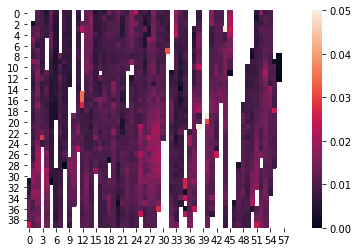

In [20]:
ax = sns.heatmap(m3.lane_qkv[1][1], vmin=0, vmax=0.05)
plt.show()

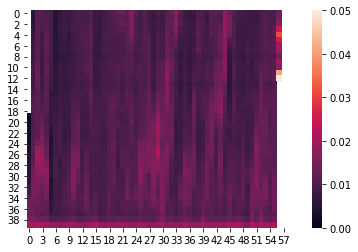

In [19]:
ax = sns.heatmap(m.lane_qkv[1][1], vmin=0, vmax=0.05)
plt.show()

In [13]:
ks = vk_sensing('SoftImpute')

1
1


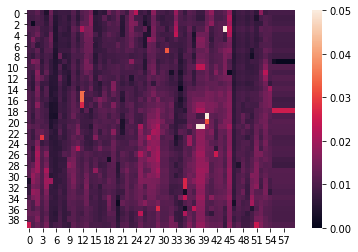

0.38981369607140126
1.3801421598349246e-05
1.724847451496038e-05
0.4533581341150918
-1.767747800532458
2
1


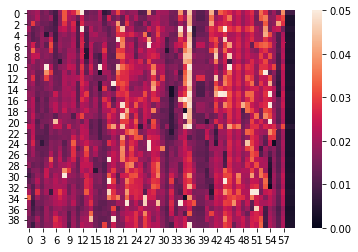

0.5246525811438105
0.00014925155994233342
0.00013440778021650383
0.48832637212005836
-0.7369651154076695
3
1


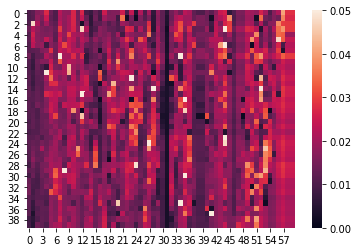

0.5996931907021743
0.0001621728867505167
0.000142166262420491
0.4721549029864986
-0.5430003373826953
4
1


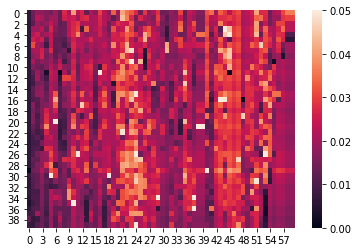

0.4056569819768208
0.0001064405453125393
9.236112229422996e-05
0.4690685728668903
-0.7676763232836787
5
1


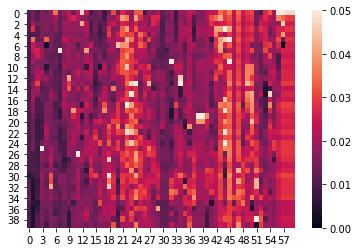

0.3652998698506318
4.467914572496281e-05
5.985895435889398e-05
1.0707830030827965
0.04264515103191069
6
1


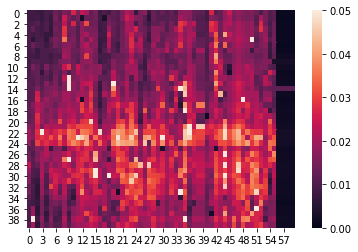

0.3680945092361169
6.91695461507973e-05
6.376152427409414e-05
0.3769079921106851
-0.0979675169750942


In [32]:
item = 1
for i in range(1, 7):
    print (i)
    ks = vk_sensing('SoftImpute')
    ks.CVfit(m3.lane_qkv[i][item])
    m3_est = ks.fit_transform(m3.lane_qkv[i][item])
    ax = sns.heatmap(m3_est, vmin=0, vmax=0.05)
    plt.show()
#     ax = sns.heatmap(m.lane_qkv[i][2], vmin=0, vmax=0.05)
#     plt.show()
    print (RMSN(m3_est, m.lane_qkv[i][item]))
    print (MAE(m.lane_qkv[i][item], m3.lane_qkv[i][item]))
    print (MAE(m3_est, m.lane_qkv[i][item]))
    print (RMSPE(m3_est, m.lane_qkv[i][item]))
    print (R2(m3_est, m.lane_qkv[i][item]))

1
1
coef [-0.9312064 -0.3856556 -0.        -0.       ]


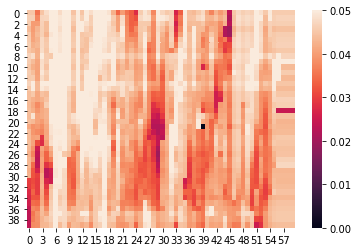

0.12029614665238066
0.1215947048170239
0.5764883553806283
2
1
coef [-0.36252841 -0.07438518 -0.         -0.        ]


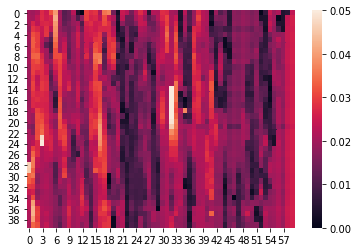

0.31984600689767867
0.7335793058045006
0.5998753973122335
3
1
coef [-0.26404852 -0.17319702 -0.         -0.        ]


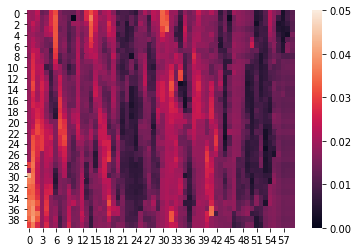

0.2575966953545957
0.5517905072517751
0.6510977476073534
4
1
coef [-0.33495999 -0.13406547 -0.         -0.        ]


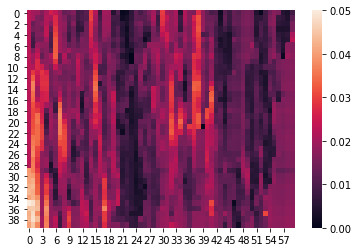

0.3260021054044701
0.4942961943082223
0.618816394615572
5
1
coef [-0.53738493 -0.26316219 -0.         -0.        ]


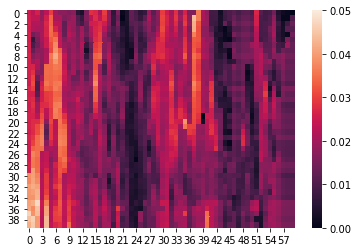

0.2594895547931683
0.8809997363003192
0.7469409544438731
6
1
coef [-4.94913123e-01 -2.76512145e-01 -9.25842249e-16 -0.00000000e+00]


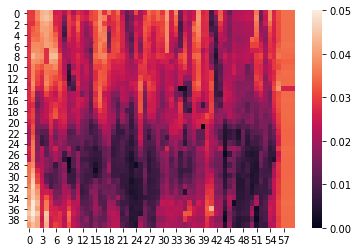

0.25140662529650604
0.484616246072912
0.731371059542899


In [26]:
for i in range(1, 7):
    print (i)
    ks = vk_sensing('SoftImpute')
    ks.CVfit(m3.lane_qkv[i][1])
    k3_est = ks.fit_transform(m3.lane_qkv[i][1])
    sf = speed_fitting()
    sf.CVfit(k3_est, m3.lane_qkv[i][2])
    m3_est = sf.transform(k3_est, m3.lane_qkv[i][2])
    ax = sns.heatmap(m3_est, vmin=0, vmax=0.05)
    plt.show()
#     ax = sns.heatmap(m.lane_qkv[i][2], vmin=0, vmax=0.05)
#     plt.show()
    print (RMSN(m3_est, m.lane_qkv[i][2]))
    print (RMSPE(m3_est, m.lane_qkv[i][2]))
    print (R2(m3_est, m.lane_qkv[i][2]))

0.2391083472662871
0.2440995741634961
-0.6002898535218772


In [26]:
m3_est

array([[-2.42523258e-17, -1.92241851e-17,  3.64357905e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.52821650e-17, -1.94383030e-17,  3.60085053e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.48344319e-17, -1.87045919e-17,  3.47929215e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-3.14987373e-17, -1.60224295e-17,  4.41143590e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.67940971e-17, -1.54742782e-17,  4.27045535e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.31052899e-17, -1.47453972e-17,  3.83093096e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [17]:
RMSN(m.lane_qkv[1][2], m3.lane_qkv[1][2])

0.07215651044000249

In [18]:
RMSPE(m.lane_qkv[1][2], m3.lane_qkv[1][2])

0.07644613667393806

In [19]:
R2(m.lane_qkv[1][2], m3.lane_qkv[1][2])

0.8624468850950803

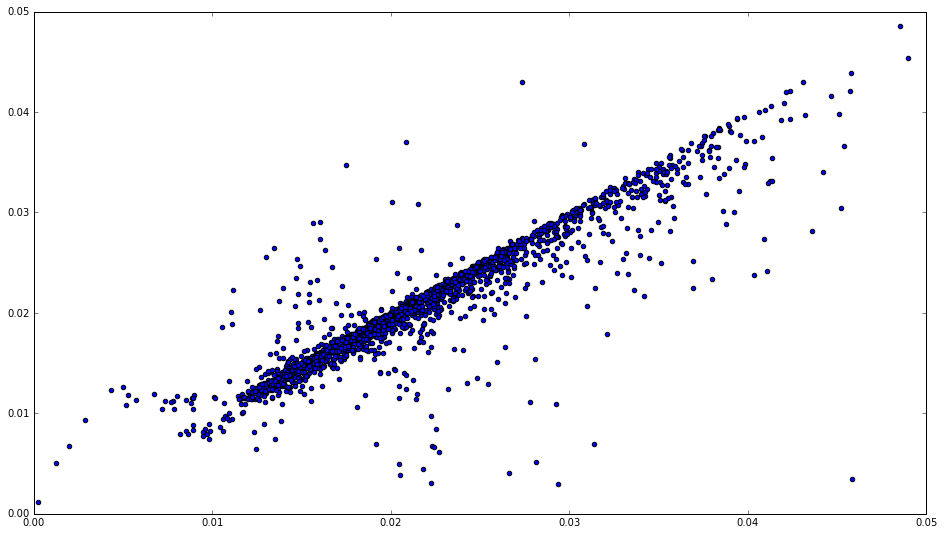

In [69]:
plt.figure(figsize = (16,9))
plt.scatter(m.lane_qkv[2][1].flatten(), m3.lane_qkv[2][1].flatten())
plt.xlim([0, 0.05])
plt.ylim([0, 0.05])
plt.show()

In [13]:
~np.isnan(np.zeros_like(np.array([[1,2],[3,5]])))

array([[ True,  True],
       [ True,  True]])